# Description

# Modules loading

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

from clustering.methods import ClusterInterpreter
from data.recount2 import LVAnalysis
from data.cache import read_data
import conf

# Settings

In [3]:
PARTITION_K = None
PARTITION_CLUSTER_ID = None

In [4]:
# Parameters
PARTITION_K = 22
PARTITION_CLUSTER_ID = 19

# Load MultiPLIER summary

In [5]:
multiplier_model_summary = read_data(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [6]:
multiplier_model_summary.shape

(2157, 5)

In [7]:
multiplier_model_summary.head()

pathway LV index       AUC   p-value  \
1                  KEGG_LYSINE_DEGRADATION        1  0.388059  0.866078   
2                   REACTOME_MRNA_SPLICING        1  0.733057  0.000048   
3  MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX        1  0.680555  0.001628   
4                     KEGG_DNA_REPLICATION        1  0.549473  0.312155   
5                     PID_MYC_ACTIVPATHWAY        1  0.639303  0.021702   

        FDR  
1  0.956005  
2  0.000582  
3  0.011366  
4  0.539951  
5  0.083739

# Load data

## Original data

In [8]:
INPUT_SUBSET = "z_score_std"

In [9]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [10]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [11]:
data = pd.read_pickle(input_filepath)

In [12]:
data.shape

(3752, 987)

In [13]:
data.head()

LV1       LV2       LV3       LV4       LV5  \
100001_raw-Food_weight  -0.695006  1.962565  0.057683  0.878731 -0.539977   
100002_raw-Energy       -1.528127 -0.345309 -0.148953 -0.242060  0.373427   
100003_raw-Protein      -0.704572 -1.011299  0.671420  0.143991  0.615212   
100004_raw-Fat          -0.989832 -1.875490  0.261555 -1.420719  0.366238   
100005_raw-Carbohydrate -0.580143  0.243335  0.158966 -0.036558  0.068176   

                              LV6       LV7       LV8       LV9      LV10  \
100001_raw-Food_weight   1.481272 -0.396422  1.090180  0.759223  0.931395   
100002_raw-Energy        0.791092  0.263477  0.987702  0.354391  1.416059   
100003_raw-Protein       0.874212 -0.040998  0.915170  0.254369 -0.084237   
100004_raw-Fat           1.167049  0.257387  0.717674 -0.997664  0.969825   
100005_raw-Carbohydrate -0.202639  1.101281  0.675227  1.463432  1.010078   

                         ...     LV978     LV979     LV980     LV981  \
100001_raw-Food_weight   ...  1.129784  1.752343 -1.411403  2.823863   
100002_raw-Energy        ...  0.224604  0.769882 -0.509482  0.091153   
100003_raw-Protein       ...  1.003019  1.044314 -2.376108  0.004778   
100004_raw-Fat           ...  0.585913  0.638314  0.119139 -0.140204   
100005_raw-Carbohydrate  ... -0.249108 -0.026814  0.232713  0.323682   

                            LV982     LV983     LV984     LV985     LV986  \
100001_raw-Food_weight   0.931116 -1.054519  0.432982 -0.633597  0.554279   
100002_raw-Energy        2.286789 -1.008256 -0.029764  1.737229 -0.272107   
100003_raw-Protein       0.053714 -0.892447 -0.183800  1.377991 -0.278794   
100004_raw-Fat           1.394326 -1.173402  0.555058  1.013982 -0.544506   
100005_raw-Carbohydrate  1.168642 -0.282935  0.653105  1.909526  0.199997   

                            LV987  
100001_raw-Food_weight  -0.642479  
100002_raw-Energy       -0.526125  
100003_raw-Protein      -0.419733  
100004_raw-Fat          -0.064061  
100005_raw-Carbohydrate -1.656894  

[5 rows x 987 columns]

## Clustering partitions

In [14]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering')

In [15]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [16]:
best_partitions = pd.read_pickle(input_file)

In [17]:
best_partitions.shape

(59, 4)

In [18]:
best_partitions.head()

method                                          partition  ari_median  \
k                                                                            
11  scc_025  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    0.090231   
13  scc_025  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...    0.090222   
14  scc_025  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    0.090138   
22  scc_020  [1, 19, 19, 19, 19, 19, 19, 19, 19, 1, 19, 19,...    0.090117   
12  scc_025  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...    0.089742   

    selected  
k             
11      True  
13      True  
14      True  
22      True  
12      True

# Functions

In [19]:
def show_cluster_stats(data, partition, cluster):
    cluster_traits = data[partition == cluster].index
    display(f"Cluster '{cluster}' has {len(cluster_traits)} traits")
    display(cluster_traits)

# LV analysis
<a id="lv_analysis"></a>

## Associated traits

In [20]:
display(best_partitions.loc[PARTITION_K])
part = best_partitions.loc[PARTITION_K, "partition"]

method                                                  scc_020
partition     [1, 19, 19, 19, 19, 19, 19, 19, 19, 1, 19, 19,...
ari_median                                            0.0901165
selected                                                   True
Name: 22, dtype: object

In [21]:
show_cluster_stats(data, part, PARTITION_CLUSTER_ID)

"Cluster '19' has 15 traits"

Index(['100002_raw-Energy', '100003_raw-Protein', '100004_raw-Fat',
       '100005_raw-Carbohydrate', '100006_raw-Saturated_fat',
       '100007_raw-Polyunsaturated_fat', '100008_raw-Total_sugars',
       '100009_raw-Englyst_dietary_fibre', '100011_raw-Iron',
       '100012_raw-Vitamin_B6', '100014_raw-Folate', '100016_raw-Potassium',
       '100017_raw-Magnesium', '100024_raw-Calcium', '100025_raw-Vitamin_E'],
      dtype='object')

## Top attributes

Here we go through the list of associated latent variables and, for each, we show associated pathways (prior knowledge), top traits, top genes and the top tissues/cell types where those genes are expressed.

In [22]:
# lv_obj = LVAnalysis("LV678", data)

In [23]:
# lv_data = lv_obj.get_experiments_data()

In [24]:
# _tmp = lv_data[["tissue", "LV678"]].dropna()

In [25]:
# _tmp[_tmp["tissue"].str.contains("Muscle")]

In [26]:
important_lvs = [
    "LV707",
    "LV905",
    "LV915",
    "LV750",
    "LV341",
    "LV310",
    "LV48",
    "LV509",
    "LV467",
    "LV64",
    "LV490",
    "LV550",
    "LV621",
    "LV775",
    "LV415",
    "LV504",
    "LV507",
    "LV494",
    "LV399",
    "LV246",
    "LV120",
    "LV122",
    "LV489",
    "LV515",
    "LV783",
    "LV768",
    "LV577",
]

pathway LV index       AUC  \
1672                  REACTOME_PEPTIDE_CHAIN_ELONGATION      707  0.999766   
1673                                      KEGG_RIBOSOME      707  0.956636   
1674             MIPS_40S_RIBOSOMAL_SUBUNIT_CYTOPLASMIC      707  0.997768   
1675                          MIPS_RIBOSOME_CYTOPLASMIC      707  0.999530   
1676  REACTOME_ACTIVATION_OF_THE_MRNA_UPON_BINDING_O...      707  0.864580   

           p-value           FDR  
1672  1.032655e-15  1.012472e-13  
1673  2.047765e-13  1.472343e-11  
1674  6.831719e-07  1.351928e-05  
1675  7.948872e-15  7.144049e-13  
1676  8.299737e-07  1.612841e-05

SRP036821, SRP006575, SRP050499, SRP056049, SRP003227, SRP051102, SRP055569, SRP014428, SRP023262, SRP055675, SRP042161, SRP006475, SRP005279, SRP042616, SRP007359, SRP018525, SRP051765, SRP050215, SRP036053, SRP011546, SRP068523, SRP033369, SRP059057, SRP049063, SRP048971, SRP019994, SRP045898, SRP034543, SRP018838, SRP014867, SRP005177, SRP055390, SRP037735, SRP009067, SRP042218, SRP028594, SRP012461, SRP029452, SRP014146, SRP058977, SRP033135, SRP014739, SRP008976, SRP062025, SRP001563, SRP046233, SRP035599, SRP056295, SRP058840, SRP057250, SRP058120, SRP034712, SRP060715, SRP057745, SRP057244, SRP053046, SRP029739, SRP022920, SRP009266, SRP057852, SRP001540, SRP045869, SRP058046, SRP065988, SRP067214, SRP059775, SRP042043, SRP058841, SRP049648, SRP019222, SRP067661, SRP004847, SRP044206, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (72 != 73)
  warnings.warn(


''

20003_1140861806-Treatmentmedication_code_aspirin_75mg_tablet                                                               3.508411
22601_24213281-Job_coding_charteredcertified_accountant_auditor_company_accountant_articledaudit_clerk_official_receiver    3.402996
22617_2421-Job_SOC_coding_Chartered_and_certified_accountants                                                               3.319470
anal neoplasm                                                                                                               3.162123
DM_RETINOPAT_NOS-Unclassified_diabetic_retinopathy                                                                          3.031774
2654_5-Nonbutter_spread_type_details_Hard_block_margarine                                                                   2.965024
20003_1140922714-Treatmentmedication_code_dorzolamide                                                                       2.944282
20552_2-Behavioural_and_miscellaneous_addictions_A_behaviour         

''

gene_name     LV707 gene_band
0     RPL26  4.806982   17p13.1
1     RPS4X  4.751073       NaN
2     RPS18  4.703236   6p21.32
3     RPS10  4.641886   6p21.31
4    RPL27A  4.599172   11p15.4
5     RPL24  4.574992    3q12.3
6     RPS14  4.521517    5q33.1
7     RPL31  4.513816    2q11.2
8     RPS19  4.489249   19q13.2
9      RPS5  4.444449  19q13.43

tissue subtype    0.057628
tissue            0.016806
cell type         0.015001
cell line/type    0.014849
cell phenotype    0.008755
dtype: float64

array(['SRP036821'], dtype=object)

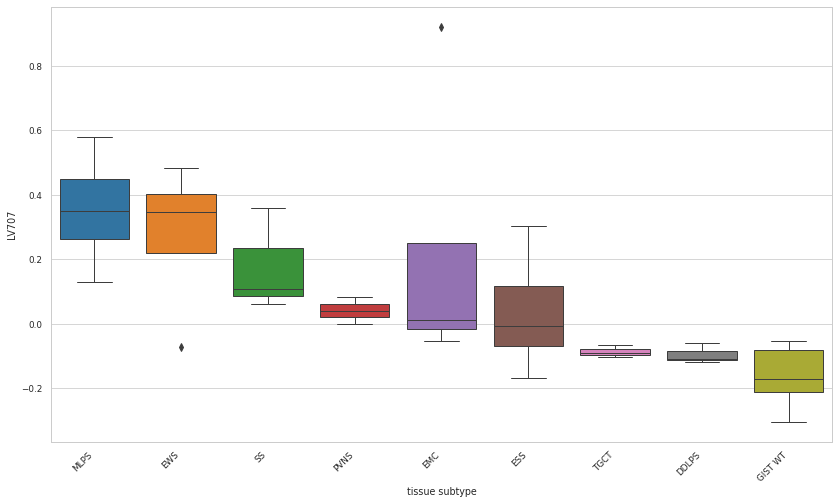

array(['SRP036821', 'SRP006575', 'SRP014428', 'SRP023262', 'SRP005279',
       'SRP007359', 'SRP036053', 'SRP011546', 'SRP049063', 'SRP019994',
       'SRP045898', 'SRP055390', 'SRP042218', 'SRP028594', 'SRP029452',
       'SRP014146', 'SRP014739', 'SRP062025', 'SRP056295', 'SRP045869',
       'SRP067661', 'SRP004847'], dtype=object)

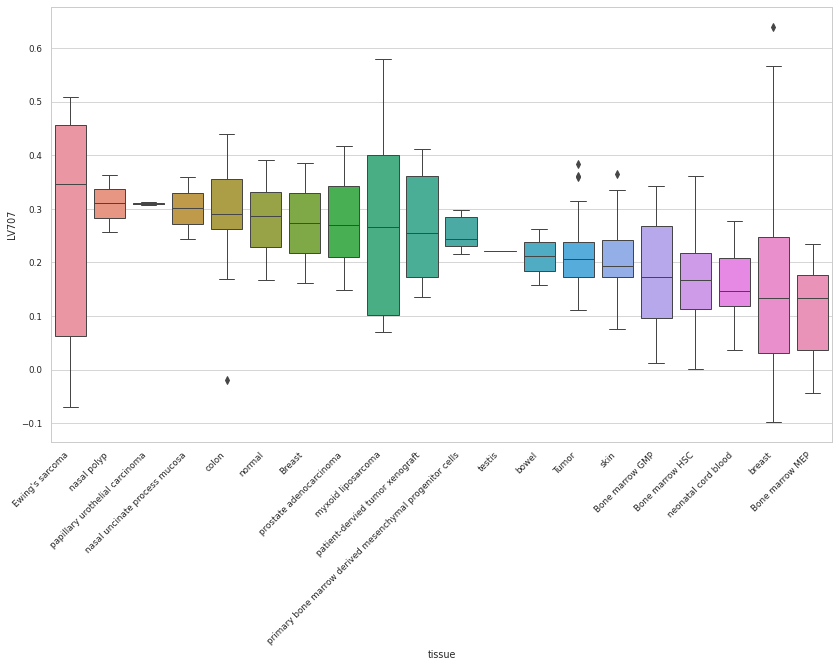

array(['SRP006575', 'SRP003227', 'SRP051102', 'SRP055569', 'SRP014428',
       'SRP055675', 'SRP042161', 'SRP005279', 'SRP018525', 'SRP051765',
       'SRP011546', 'SRP068523', 'SRP049063', 'SRP048971', 'SRP034543',
       'SRP055390', 'SRP037735', 'SRP009067', 'SRP042218', 'SRP012461',
       'SRP033135', 'SRP008976', 'SRP046233', 'SRP035599', 'SRP056295',
       'SRP060715', 'SRP053046', 'SRP022920', 'SRP057852', 'SRP058046',
       'SRP065988', 'SRP067661', 'SRP004847', 'SRP044206'], dtype=object)

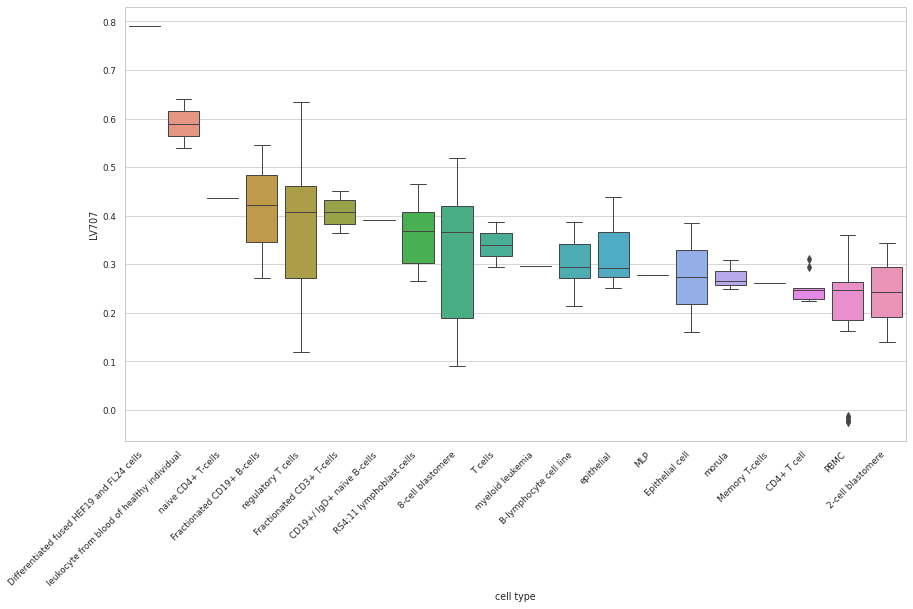

array(['SRP058120'], dtype=object)

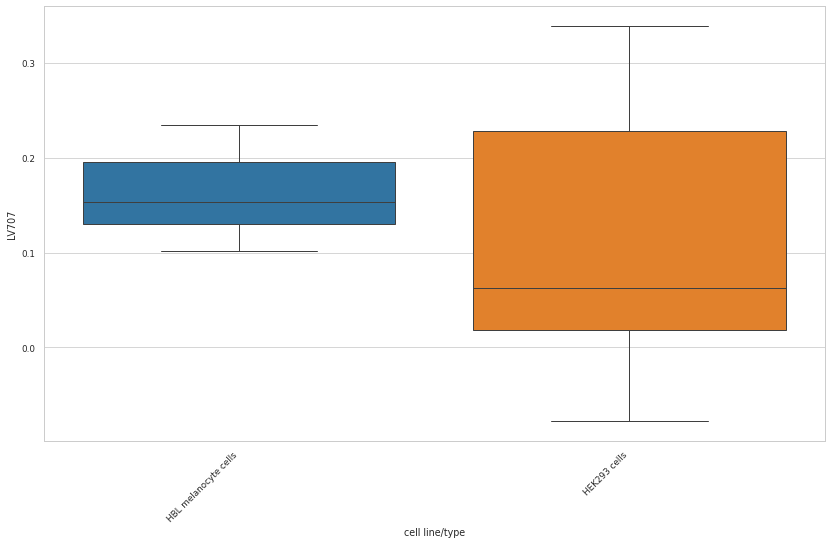

array(['SRP062025'], dtype=object)

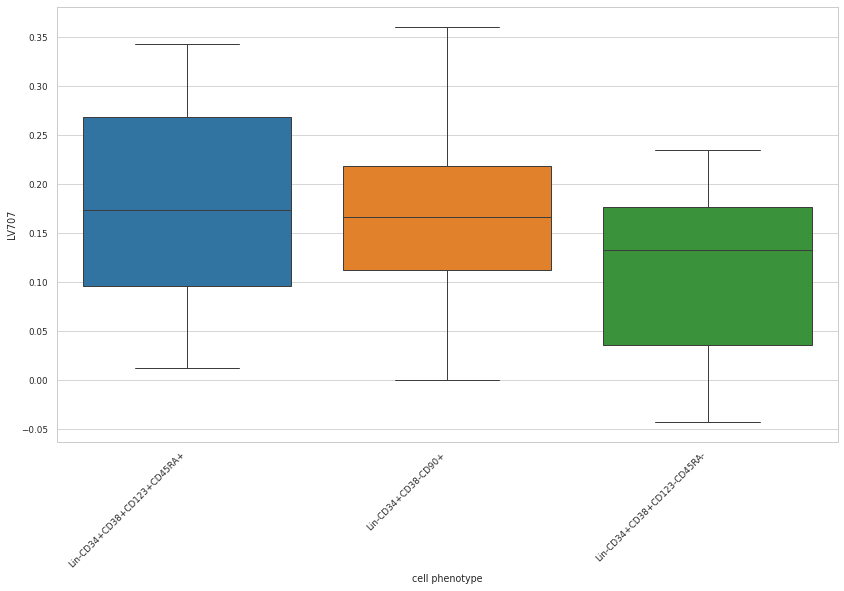

pathway LV index       AUC  \
2006  REACTOME_FORMATION_OF_THE_TERNARY_COMPLEX_AND_...      905  0.903435   
2007            MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX      905  0.825748   
2008                               REACTOME_TRANSLATION      905  0.776626   

           p-value           FDR  
2006  1.326407e-06  2.345131e-05  
2007  1.686986e-08  4.331938e-07  
2008  6.146072e-09  1.657135e-07

SRP027358, SRP055569, SRP067661, SRP041885, SRP062025, SRP033135, SRP042616, SRP050499, SRP051102, SRP015138, SRP056295, SRP050146, SRP051765, SRP046233, SRP028594, SRP055390, SRP055103, SRP048759, SRP056074, SRP033266, SRP058719, SRP042161, SRP049063, SRP056197, SRP042043, SRP047323, 

''

20003_1141168684-Treatmentmedication_code_xenical_120mg_capsule                 3.418248
22617_9223-Job_SOC_coding_Kitchen_and_catering_assistants                       3.307585
20003_1140875392-Treatmentmedication_code_plaquenil_200mg_tablet                3.270236
20532-Did_your_sleep_change                                                     3.261277
mumps virus infectious disease                                                  3.200741
M13_MEDIALEPICOND-Medial_epicondylitis                                          3.189440
20003_1140862148-Treatmentmedication_code_serevent_25mcg_inhaler                2.982263
5855_3-Which_eyes_affected_by_astigmatism_Both_eyes                             2.957668
periodontitis                                                                   2.954612
salivary gland neoplasm                                                         2.935215
22617_2122-Job_SOC_coding_Mechanical_engineers                                  2.934610
L12_DERM_NAS-Other_an

''

gene_name     LV905 gene_band
0    EEF1A1  3.320744      6q13
1    SH3D19  2.601119    4q31.3
2     CRHBP  2.472517    5q13.3
3     EEF1G  2.459130   11q12.3
4     EIF4B  2.435901  12q13.13
5     RPL7A  2.364714    9q34.2
6     EIF3E  2.323376    8q23.1
7      RPS6  2.257026    9p22.1
8   HNRNPA1  2.234257  12q13.13
9    RPL10A  2.212582   6p21.31

tissue            0.023775
cell type         0.015259
cell phenotype    0.009122
dtype: float64

array(['SRP027358', 'SRP067661', 'SRP062025', 'SRP056295', 'SRP028594',
       'SRP055390', 'SRP048759', 'SRP033266', 'SRP058719', 'SRP049063',
       'SRP056197', 'SRP047323'], dtype=object)

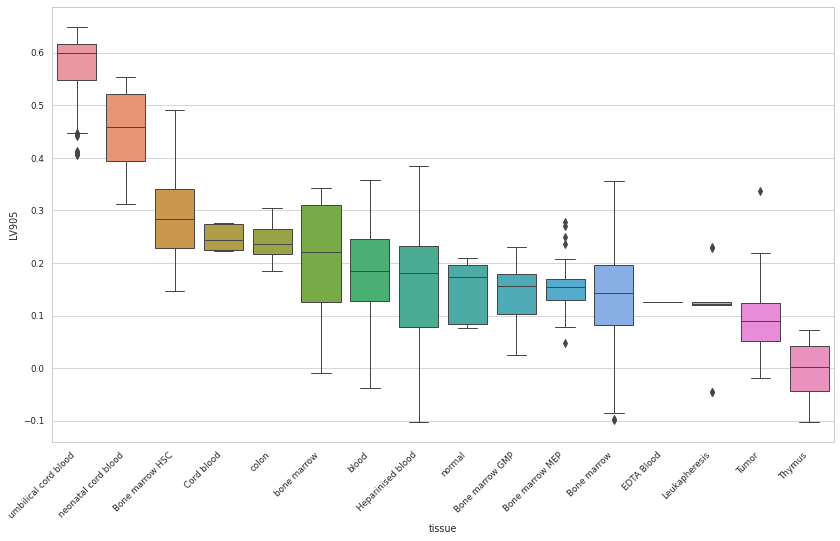

array(['SRP055569', 'SRP067661', 'SRP041885', 'SRP033135', 'SRP051102',
       'SRP015138', 'SRP056295', 'SRP050146', 'SRP051765', 'SRP046233',
       'SRP055390', 'SRP055103', 'SRP048759', 'SRP033266', 'SRP042161',
       'SRP049063', 'SRP056197', 'SRP047323'], dtype=object)

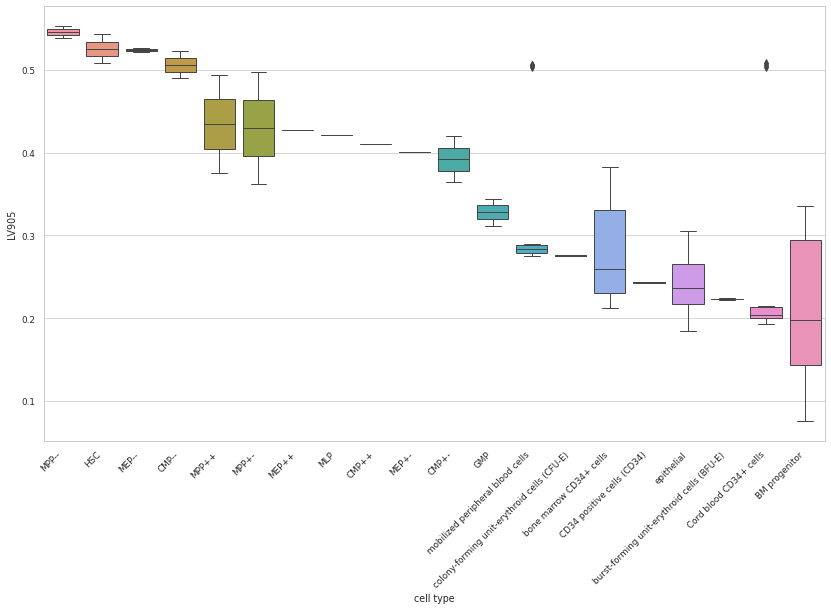

array(['SRP062025'], dtype=object)

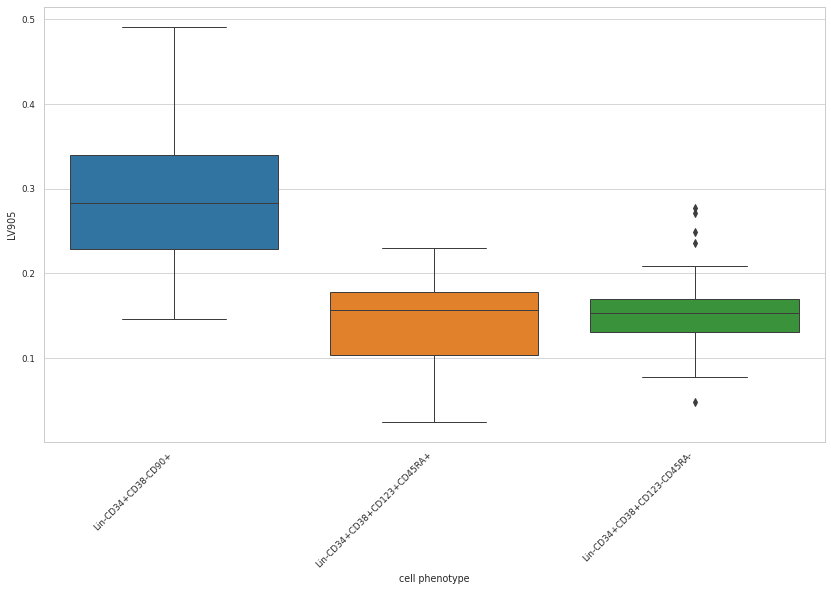

pathway LV index       AUC  \
2023  REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAININ...      915  0.903178   
2025                                   MIPS_CEN_COMPLEX      915  0.823508   
2027                                   MIPS_SPLICEOSOME      915  0.895046   

           p-value           FDR  
2023  2.530812e-13  1.705925e-11  
2025  2.660466e-03  1.639607e-02  
2027  7.318703e-13  4.643072e-11

SRP018719, SRP011185, SRP034666, SRP014670, SRP050892, SRP041788, SRP014320, SRP013450, SRP015678, SRP051102, SRP038695, SRP044608, SRP061639, SRP043273, SRP015138, SRP017959, SRP030617, SRP059775, SRP044917, SRP002543, SRP019810, SRP017644, SRP007351, SRP026454, SRP055569, SRP053195, SRP039397, SRP063493, SRP045870, SRP033119, SRP011378, SRP018718, SRP048603, SRP040442, SRP055863, SRP022925, SRP041102, SRP006474, SRP005129, SRP010430, SRP019939, SRP049391, SRP049775, SRP058435, SRP036790, SRP019989, SRP051170, SRP013724, SRP057196, SRP066834, SRP007596, SRP011546, SRP058722, SRP064410, SRP004837, SRP046271, SRP041675, SRP038969, SRP055009, SRP032754, SRP009862, SRP060416, SRP033466, SRP041255, SRP005174, SRP048604, SRP045052, SRP049648, SRP050215, SRP021509, SRP053186, SRP029739, SRP056369, SRP033569, SRP047082, SRP008681, SRP058571, SRP040764, SRP013224, SRP018777, SRP056000, SRP012540, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (79 != 82)
  warnings.warn(


''

20003_1140865786-Treatmentmedication_code_bisacodyl                                                                                                                                                                 4.061402
3581_raw-Age_at_menopause_last_menstrual_period                                                                                                                                                                     3.652632
pilonidal abscess                                                                                                                                                                                                   3.345631
20090_383-Type_of_fatoil_used_in_cooking_Soya_margarine                                                                                                                                                             3.233861
20003_1140870488-Treatmentmedication_code_forceval_capsule                                                          

''

gene_name     LV915 gene_band
0       NCL  3.319892    2q37.1
1      TOP1  2.579789     20q12
2    HNRNPD  2.577029   4q21.22
3     ACIN1  2.473921   14q11.2
4      SRRT  2.355482    7q22.1
5     DDX46  2.341588    5q31.1
6     SRRM1  2.324251   1p36.11
7      SAFB  2.298204   19p13.3
8     DDX23  2.269641  12q13.12
9    ZC3H13  2.222037  13q14.13

cell type    0.014962
tissue       0.010093
dtype: float64

array(['SRP014670', 'SRP013450', 'SRP051102', 'SRP044608', 'SRP015138',
       'SRP044917', 'SRP019810', 'SRP017644', 'SRP026454', 'SRP055569',
       'SRP045870', 'SRP022925', 'SRP041102', 'SRP005129', 'SRP010430',
       'SRP049775', 'SRP058435', 'SRP036790', 'SRP057196', 'SRP007596',
       'SRP011546', 'SRP004837', 'SRP055009', 'SRP060416', 'SRP021509',
       'SRP033569', 'SRP047082', 'SRP008681', 'SRP058571', 'SRP018777',
       'SRP056000'], dtype=object)

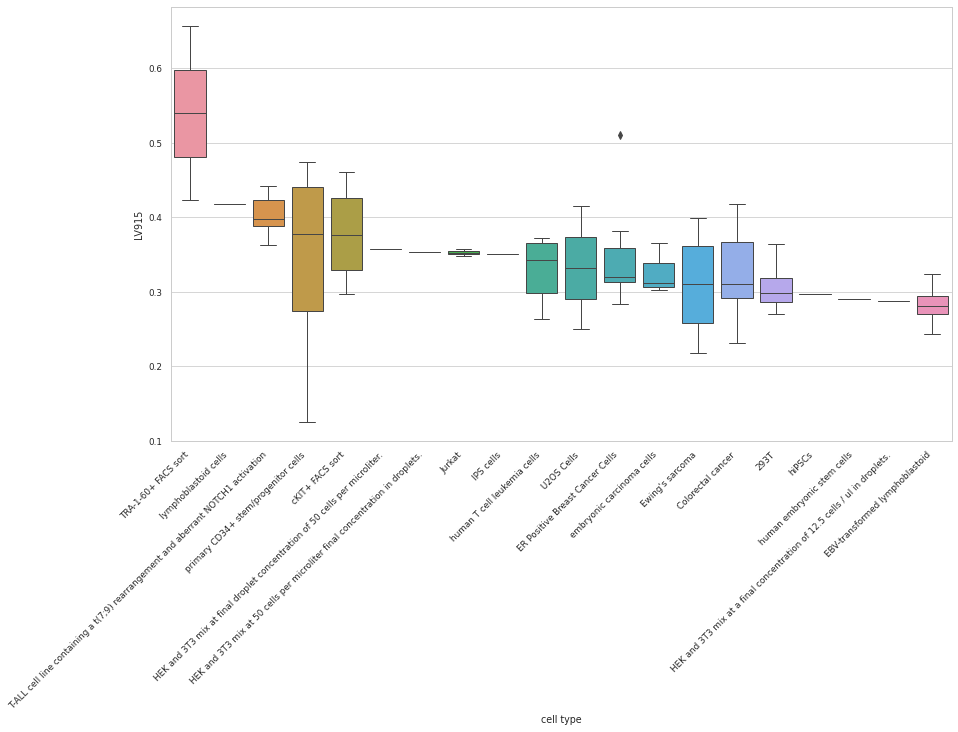

array(['SRP014670', 'SRP015678', 'SRP040442', 'SRP055863', 'SRP057196',
       'SRP066834', 'SRP011546', 'SRP058722', 'SRP004837'], dtype=object)

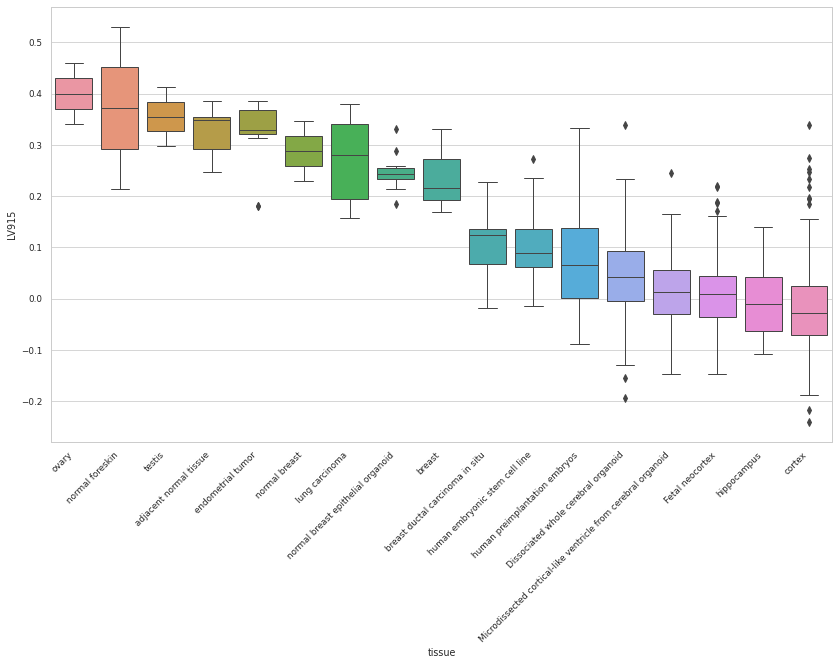

pathway LV index       AUC  \
1739                     KEGG_OXIDATIVE_PHOSPHORYLATION      750  0.714140   
1741                                      KEGG_RIBOSOME      750  0.888351   
1742  REACTOME_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TR...      750  0.627497   

           p-value           FDR  
1739  9.944383e-05  1.094389e-03  
1741  7.908484e-10  2.624400e-08  
1742  1.016375e-02  4.797201e-02

SRP058840, SRP033135, SRP011185, SRP017933, SRP057852, SRP009266, SRP033369, SRP014428, SRP055569, SRP034712, SRP014867, SRP057745, SRP018838, SRP018525, SRP065202, SRP059775, SRP042161, SRP052057, SRP011924, SRP028301, SRP012461, SRP062025, SRP044206, SRP026315, SRP007359, SRP055810, SRP014739, SRP056000, SRP062177, SRP037735, SRP030617, SRP056049, SRP068523, SRP041788, SRP045898, SRP003227, SRP009067, SRP063840, SRP035391, SRP058841, SRP009862, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (39 != 41)
  warnings.warn(


''

I9_K_CARDIAC-Death_due_to_cardiac_causes                                                   4.009518
20079_2-Dayofweek_questionnaire_completion_requested_Tuesday                               3.610226
41248_6000-Destinations_on_discharge_from_hospital_recoded_Transfer_within_NHS_provider    3.536253
20111_101-Illnesses_of_siblings_None_of_the_above_group_2                                  3.266077
100024_raw-Calcium                                                                         3.224789
41219_2-Anaesthetics_administered_during_delivery_Epidural_or_caudal_anaesthetic           3.165126
H7_MACULADEGEN-Degeneration_of_macula_and_posterior_pole                                   3.125974
20003_1140925800-Treatmentmedication_code_movicol_oral_powder                              3.010074
6157_4-Why_stopped_smoking_Financial_reasons                                               2.932118
20084_473-Vitamin_andor_mineral_supplement_use_Glucosaminechondroitin_                     2.832539


''

gene_name     LV750 gene_band
0     RPL34  5.130341      4q25
1    RPS27L  4.535644   15q22.2
2     ATP5J  4.347449   21q21.3
3    RPS4Y1  4.213055       NaN
4    RPL35A  3.954465      3q29
5    NDUFB1  3.931084  14q32.12
6     RPL39  3.148644       NaN
7     RPL31  3.148030    2q11.2
8      LSM5  3.133068    7p14.3
9      LSM3  3.130659    3p25.1

tissue            0.016377
cell type         0.010923
cell phenotype    0.007461
dtype: float64

array(['SRP017933', 'SRP014428', 'SRP011924', 'SRP062025', 'SRP007359',
       'SRP014739', 'SRP045898'], dtype=object)

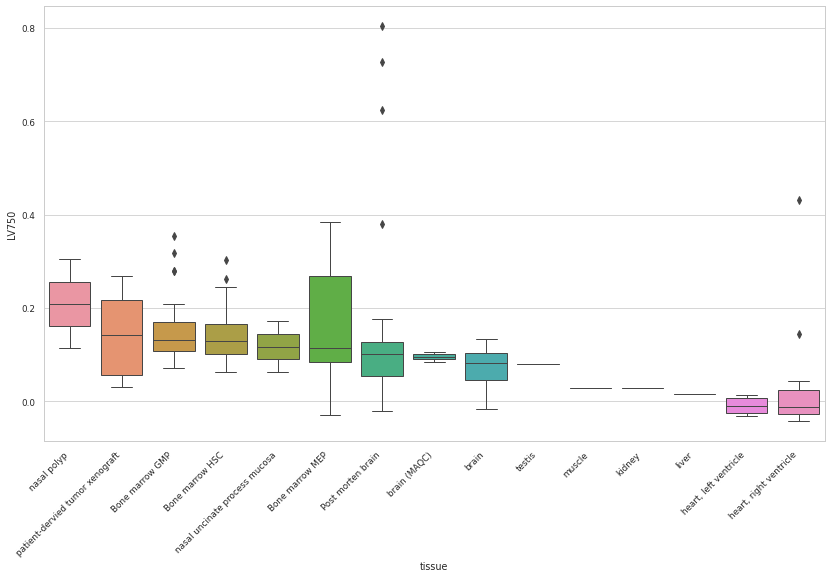

array(['SRP033135', 'SRP057852', 'SRP014428', 'SRP055569', 'SRP018525',
       'SRP065202', 'SRP042161', 'SRP012461', 'SRP044206', 'SRP026315',
       'SRP056000', 'SRP062177', 'SRP037735', 'SRP068523', 'SRP003227',
       'SRP009067', 'SRP063840'], dtype=object)

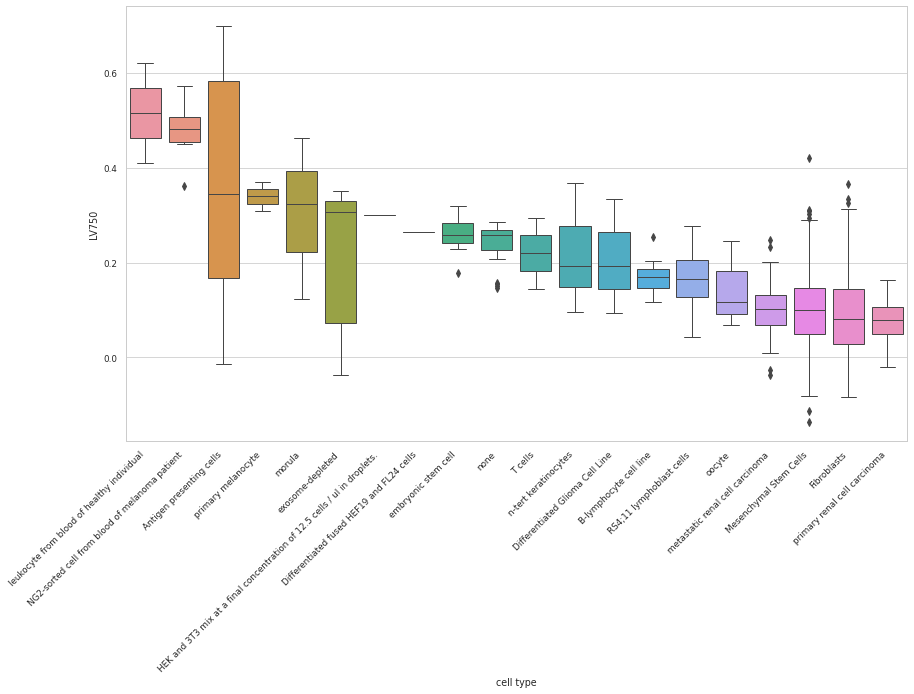

array(['SRP062025'], dtype=object)

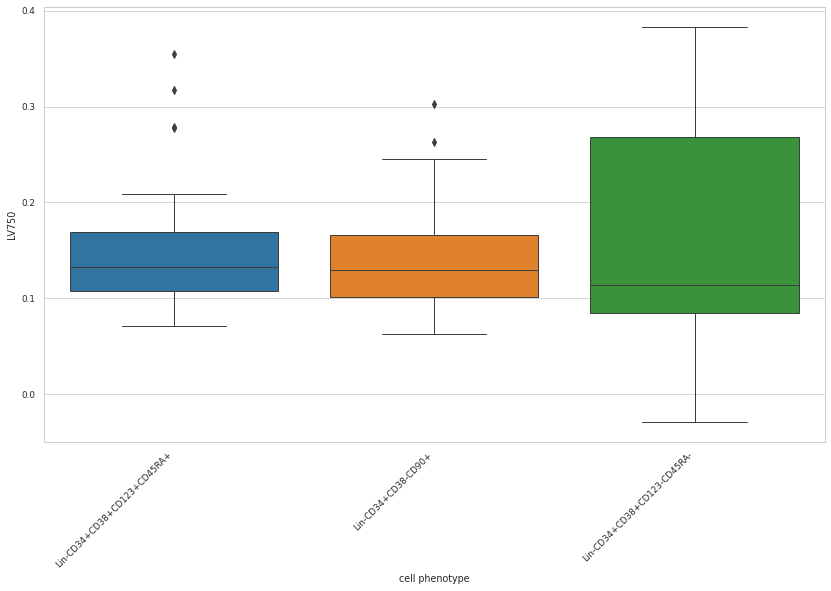

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP033135, SRP049097, SRP012461, SRP042161, SRP055569, SRP064131, SRP027383, SRP066834, SRP063070, SRP057196, SRP055153, SRP063840, SRP050992, SRP059775, SRP034626, SRP044668, SRP018838, SRP041846, SRP015668, SRP022892, SRP012463, SRP060416, SRP009862, SRP055411, SRP024244, SRP014635, SRP052740, SRP058667, SRP002487, SRP055810, SRP056295, SRP014591, SRP049068, SRP010279, SRP050499, SRP033117, SRP022871, SRP013363, SRP056220, SRP018853, SRP030617, SRP029656, SRP002184, SRP026052, SRP045565, SRP047192, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (45 != 46)
  warnings.warn(


''

30050_raw-Mean_corpuscular_haemoglobin                                                                                                    5.240468
1468_4-Cereal_type_Muesli                                                                                                                 3.982812
30040_raw-Mean_corpuscular_volume                                                                                                         3.944934
20021_raw-Speechreceptionthreshold_SRT_estimate_right                                                                                     3.773505
M13_BAKERCYST-Synovial_cyst_of_popliteal_space_Baker                                                                                      3.684575
30010_raw-Red_blood_cell_erythrocyte_count                                                                                                3.371519
738-Average_total_household_income_before_tax                                                                         

''

gene_name     LV341 gene_band
0      ZNF3  8.609824    7q22.1
1     PANK3  8.518960      5q34
2    MAN1A2  8.450062      1p12
3      MDM2  4.660457     12q15
4    EIF1AX  1.862586       NaN
5      DFFA  1.080518   1p36.22
6     ATG12  0.938242    5q22.3
7     SF3B1  0.773407    2q33.1
8      EHD2  0.741392  19q13.33
9     DDX3X  0.737626       NaN

cell type         0.024986
tissue type       0.002702
tissue            0.000581
tissue subtype    0.000209
dtype: float64

array(['SRP033135', 'SRP012461', 'SRP042161', 'SRP055569', 'SRP057196',
       'SRP055153', 'SRP063840', 'SRP050992', 'SRP041846', 'SRP060416',
       'SRP055411', 'SRP024244', 'SRP052740', 'SRP056295', 'SRP049068',
       'SRP033117', 'SRP022871', 'SRP056220', 'SRP002184', 'SRP047192'],
      dtype=object)

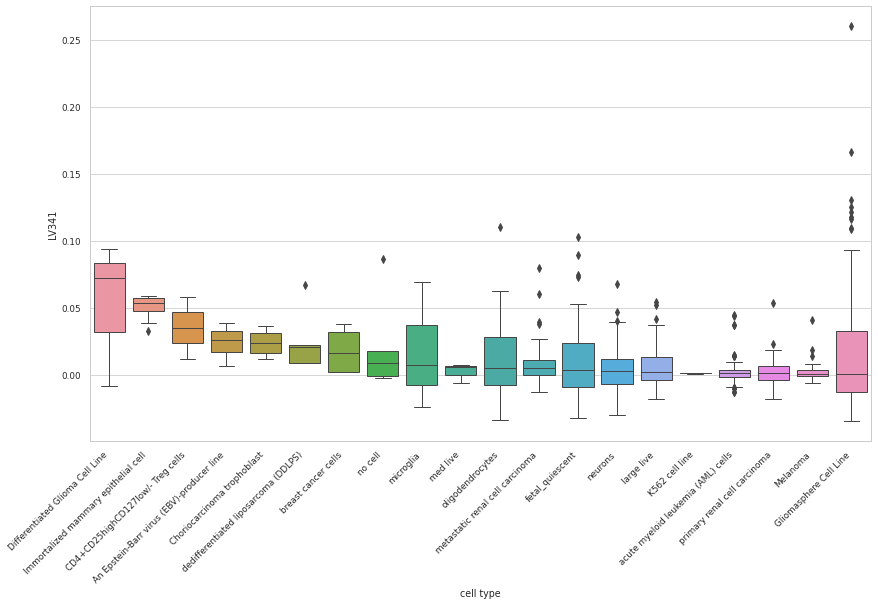

array(['SRP049097', 'SRP044668', 'SRP058667'], dtype=object)

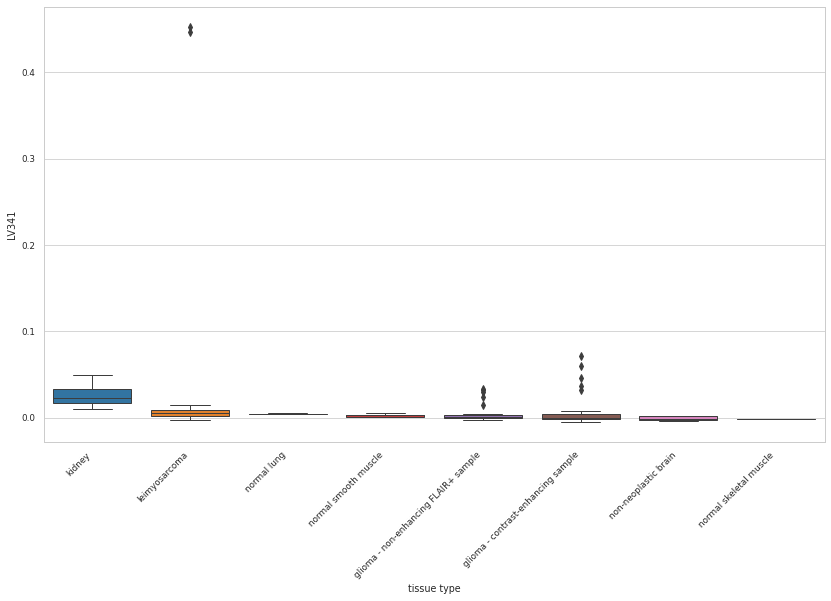

array(['SRP049097', 'SRP066834', 'SRP063070', 'SRP057196', 'SRP015668',
       'SRP014635', 'SRP056295', 'SRP047192'], dtype=object)

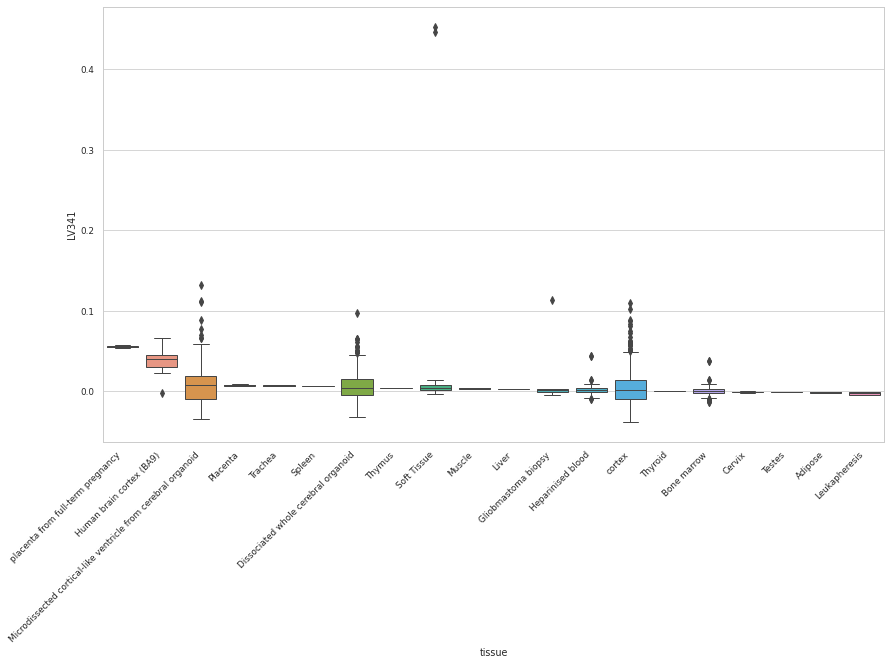

array(['SRP058667'], dtype=object)

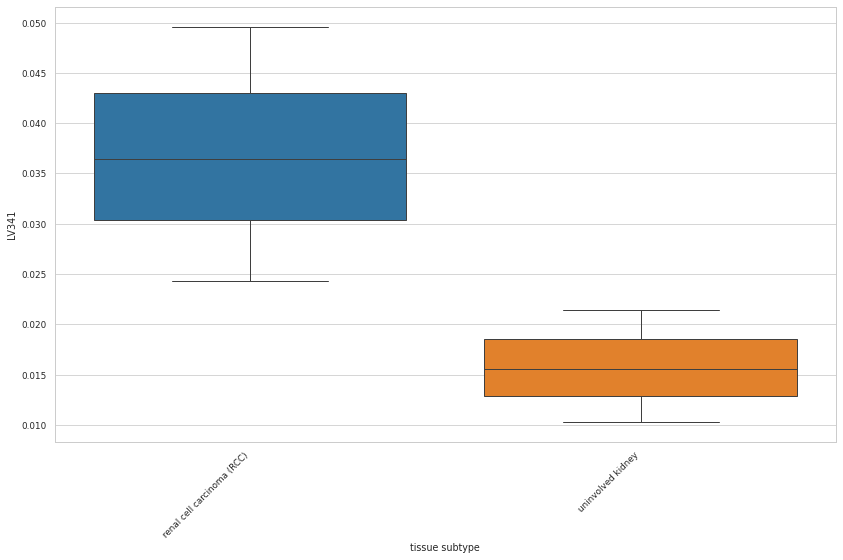

pathway LV index       AUC  \
1049  REACTOME_FORMATION_OF_THE_TERNARY_COMPLEX_AND_...      310  0.751678   

       p-value       FDR  
1049  0.001039  0.007901

SRP012461, SRP034712, SRP008218, SRP045364, SRP057196, SRP060416, SRP055569, SRP049946, SRP064464, SRP040998, SRP004965, SRP056696, SRP045500, SRP045352, SRP050954, SRP029889, SRP021478, SRP029899, SRP012557, SRP050499, SRP050551, SRP037982, SRP063889, SRP009123, SRP015439, SRP042161, SRP058626, SRP049714, SRP049409, SRP060355, SRP066834, SRP029207, SRP007481, SRP021912, SRP050374, SRP033351, SRP041538, SRP007947, SRP033135, SRP063834, SRP007338, SRP055810, SRP032833, SRP063059, SRP004847, SRP043162, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (44 != 46)
  warnings.warn(


''

20096_1-Size_of_red_wine_glass_drunk_small_125ml                                                                                  5.712932
H7_RETINALDETACHBREAK-Retinal_detachment_with_retinal_break                                                                       4.100877
CHRONLARGE-Crohns_disease_of_large_intestine                                                                                      4.015726
6158_100-Why_reduced_smoking_None_of_the_above                                                                                    3.514033
22601_35633274-Job_coding_vocational_or_industrial_trainerinstructor                                                              3.444020
100022-Alcohol                                                                                                                    3.437105
22601_24523188-Job_coding_archivist_curator_conservator_inspector_of_ancient_monuments_museum_officer                             3.414240
E4_DM1KETO-Type_1_diabetes_

''

gene_name     LV310 gene_band
0     PLIN2  5.013210    9p22.1
1    IL1RL1  4.035252    2q12.1
2     MGST1  3.386012   12p12.3
3      G0S2  3.363437    1q32.2
4    AKR1C2  3.193474   10p15.1
5      FTH1  3.090251   11q12.3
6   HSD11B1  2.795826    1q32.2
7      HAS1  2.415312  19q13.41
8       FTL  2.353454  19q13.33
9    AKR1C1  2.247871   10p15.1

cell type      0.024915
tissue         0.003860
tissue type    0.002130
dtype: float64

array(['SRP012461', 'SRP008218', 'SRP045364', 'SRP057196', 'SRP060416',
       'SRP055569', 'SRP004965', 'SRP045352', 'SRP050954', 'SRP015439',
       'SRP042161', 'SRP058626', 'SRP049714', 'SRP049409', 'SRP021912',
       'SRP050374', 'SRP033351', 'SRP007947', 'SRP033135', 'SRP063834',
       'SRP063059', 'SRP004847'], dtype=object)

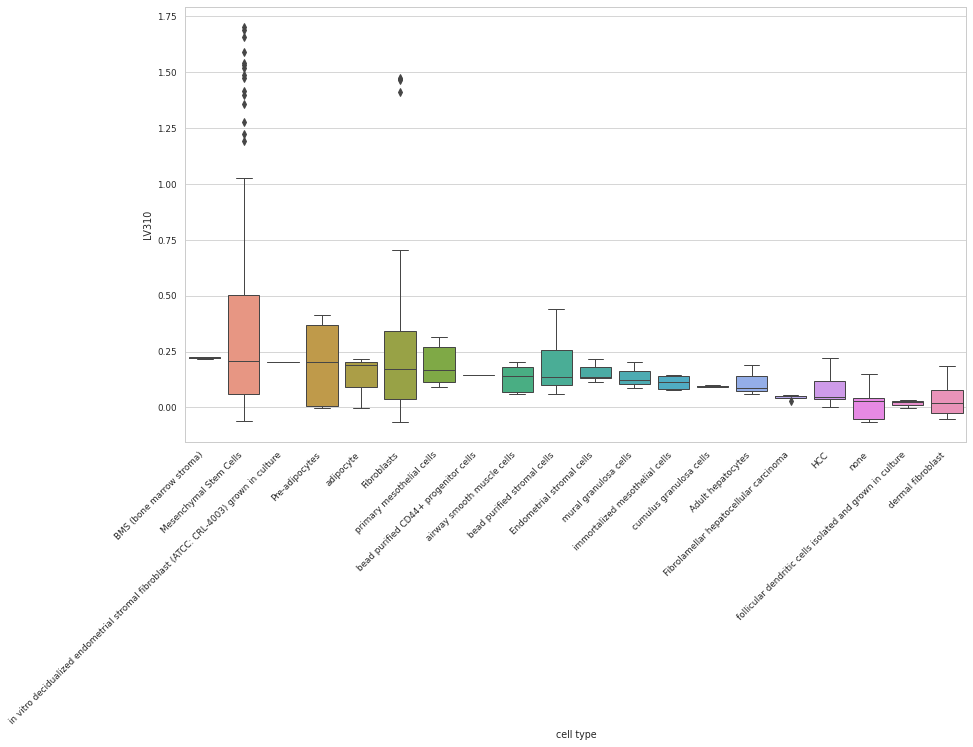

array(['SRP008218', 'SRP057196', 'SRP004965', 'SRP056696', 'SRP029889',
       'SRP021478', 'SRP029899', 'SRP050551', 'SRP037982', 'SRP009123',
       'SRP058626', 'SRP060355', 'SRP066834', 'SRP029207', 'SRP007481',
       'SRP033351', 'SRP041538', 'SRP004847', 'SRP043162'], dtype=object)

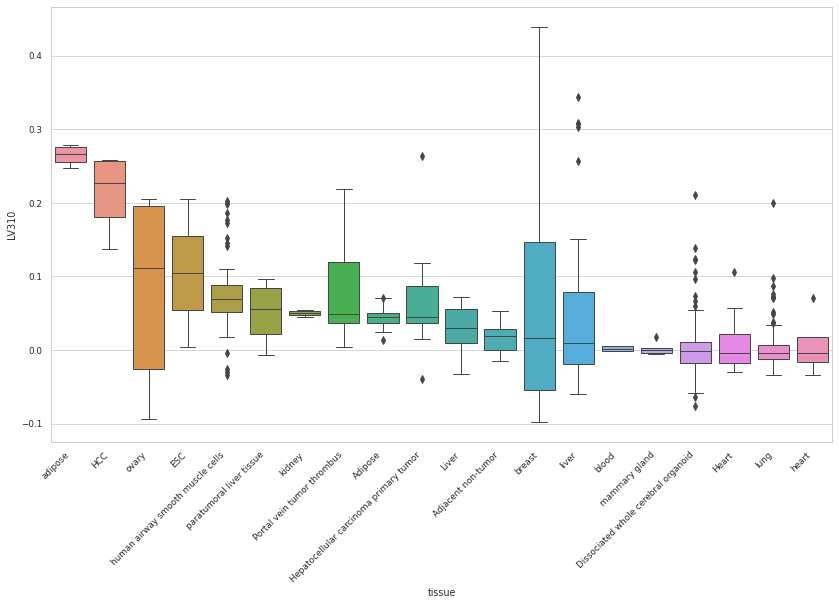

array(['SRP032833'], dtype=object)

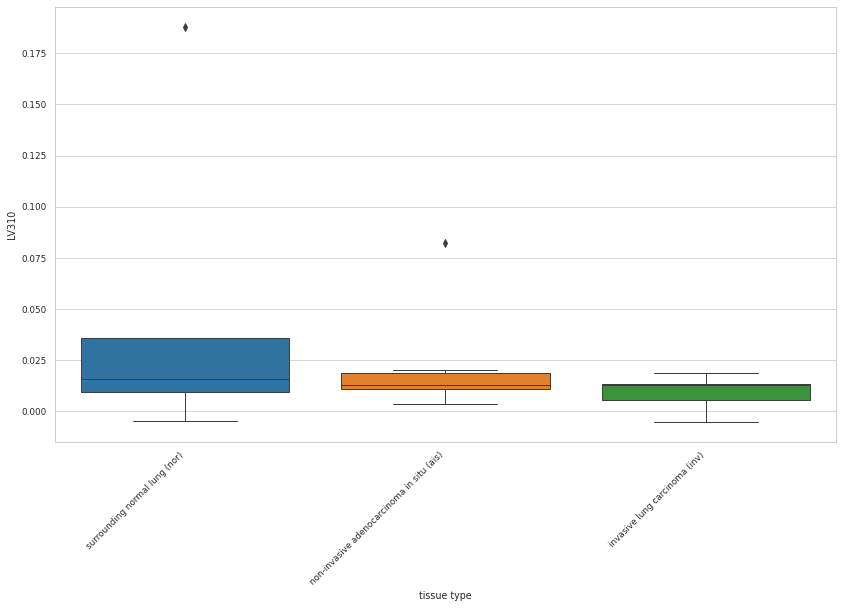

pathway LV index       AUC  \
229                                      KEGG_RIBOSOME       48  0.862596   
231                          MIPS_RIBOSOME_CYTOPLASMIC       48  0.910278   
235  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN...       48  0.779877   

          p-value           FDR  
229  2.393587e-09  7.072557e-08  
231  7.202828e-11  3.100921e-09  
235  1.096404e-07  2.438086e-06

SRP012461, SRP033135, SRP042161, SRP055153, SRP009862, SRP055569, SRP039348, SRP009266, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (6 != 8)
  warnings.warn(


''

30100_raw-Mean_platelet_thrombocyte_volume                                                                   4.517124
cholelithiasis                                                                                               3.582184
gallstones AND cholelithiasis                                                                                3.354210
hiatus hernia                                                                                                3.334329
30110_raw-Platelet_distribution_width                                                                        3.331156
5292-3mm_index_of_best_keratometry_results_left                                                              3.213773
22617_8122-Job_SOC_coding_Coal_mine_operatives                                                               3.034700
4294_0-Final_attempt_correct_no                                                                              2.919579
endocarditis                                            

''

gene_name      LV48 gene_band
0      PPIB  5.314175  15q22.31
1    KDELR3  4.007940   22q13.1
2       ID3  3.818475   1p36.12
3     RPL10  3.677641       NaN
4    LGALS1  3.625866   22q13.1
5   LAPTM4A  3.491205    2p24.1
6      RPS9  3.406294  19q13.42
7      ARF4  3.334101    3p14.3
8      LEPR  3.221243    1p31.3
9     RPS25  3.192688   11q23.3

cell type    0.106552
tissue       0.006590
dtype: float64

array(['SRP012461', 'SRP033135', 'SRP042161', 'SRP055153', 'SRP055569'],
      dtype=object)

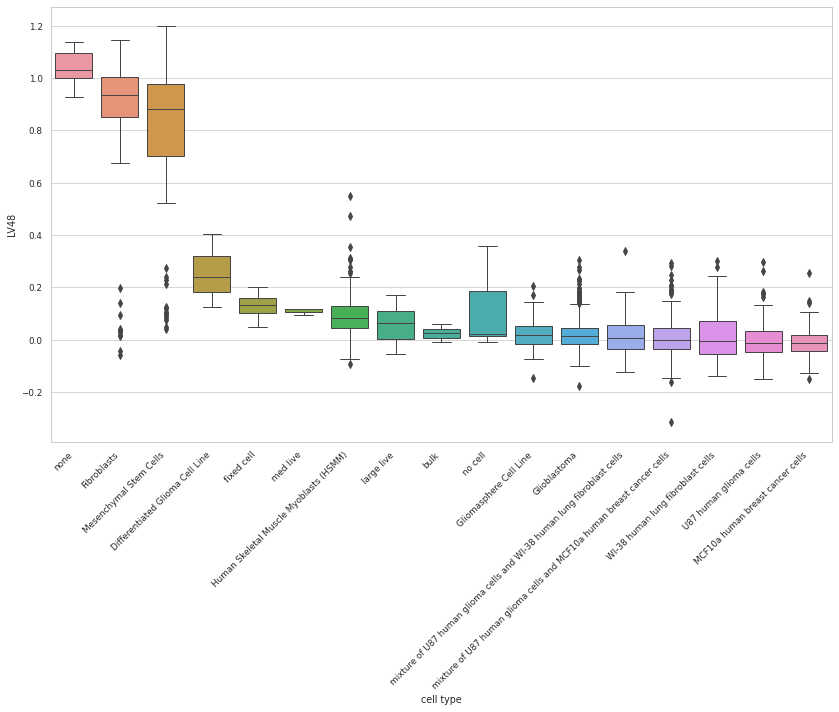

array(['SRP039348'], dtype=object)

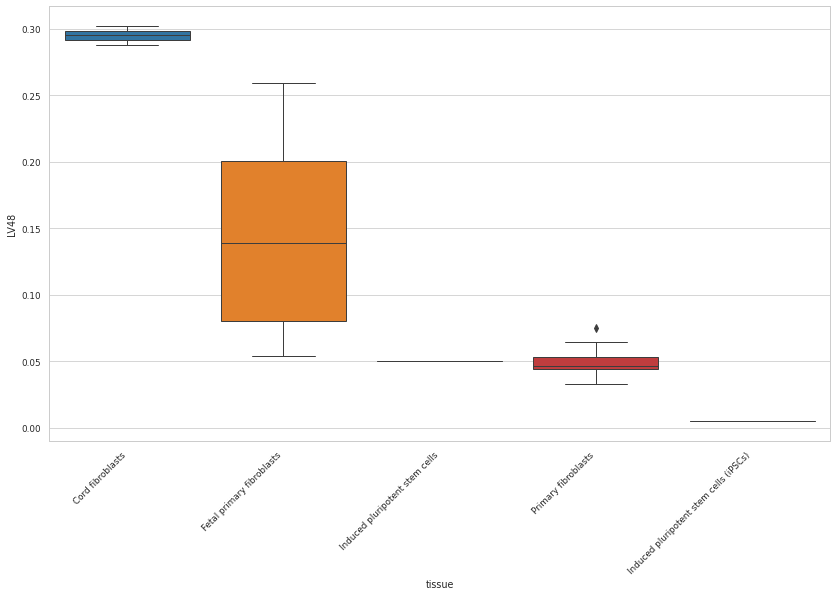

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP009266, SRP013725, SRP006575, SRP023262, SRP009862, SRP065202, SRP055569, SRP035391, SRP043962, SRP061241, SRP002487, SRP007596, SRP042579, SRP050365, SRP045869, SRP033119, SRP002915, SRP028815, SRP026315, SRP005177, SRP012056, SRP044611, SRP067214, SRP026537, SRP033369, SRP012461, SRP019936, SRP019994, SRP046749, SRP033135, SRP014739, SRP049500, SRP007461, SRP057196, SRP010350, SRP007359, SRP039348, SRP017644, SRP024268, SRP052950, SRP005279, SRP051102, SRP065559, SRP004637, SRP040136, SRP048536, SRP006475, SRP009276, SRP058120, SRP004847, SRP033276, SRP060416, SRP042161, SRP014320, SRP041210, SRP020493, SRP051599, SRP045905, SRP055153, SRP049988, SRP003611, SRP036821, SRP042616, SRP043378, SRP051765, SRP014790, SRP017789, SRP032510, SRP050036, SRP017411, SRP064464, SRP056696, SRP060661, SRP003726, SRP022920, SRP013984, SRP055810, SRP063620, SRP045898, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (75 != 79)
  warnings.warn(


''

20003_1140922174-Treatmentmedication_code_alendronate_sodium                                 4.498028
5265_raw-Corneal_resistance_factor_left                                                      3.876761
2492-Taking_other_prescription_medications                                                   3.497550
20003_1140910640-Treatmentmedication_code_luteine                                            3.092832
6160_100-Leisuresocial_activities_None_of_the_above                                          3.010461
5257_raw-Corneal_resistance_factor_right                                                     2.875965
1289-Cooked_vegetable_intake                                                                 2.873682
2634-Duration_of_heavy_DIY                                                                   2.872426
H8_BPV-Benign_paroxysmal_vertigo                                                             2.836932
100003_raw-Protein                                                                

''

gene_name     LV509 gene_band
0     ESRRA  3.674877   11q13.1
1     ADRM1  3.380042  20q13.33
2     KRT18  2.974728  12q13.13
3     HSPB1  2.921798   7q11.23
4     COX17  2.580933   3q13.33
5     H2AFJ  2.521385   12p12.3
6    PTGES2  2.513135   9q34.11
7      MXD4  2.376260    4p16.3
8   RPL36AL  2.301853   14q21.3
9    PPP1CA  2.269525   11q13.2

tissue            0.007826
cell type         0.004208
tissue type       0.003955
tissue subtype    0.003260
cell line/type    0.002409
dtype: float64

array(['SRP006575', 'SRP023262', 'SRP061241', 'SRP042579', 'SRP045869',
       'SRP019994', 'SRP014739', 'SRP057196', 'SRP007359', 'SRP039348',
       'SRP024268', 'SRP052950', 'SRP005279', 'SRP065559', 'SRP004637',
       'SRP004847', 'SRP033276', 'SRP036821', 'SRP056696', 'SRP003726',
       'SRP045898'], dtype=object)

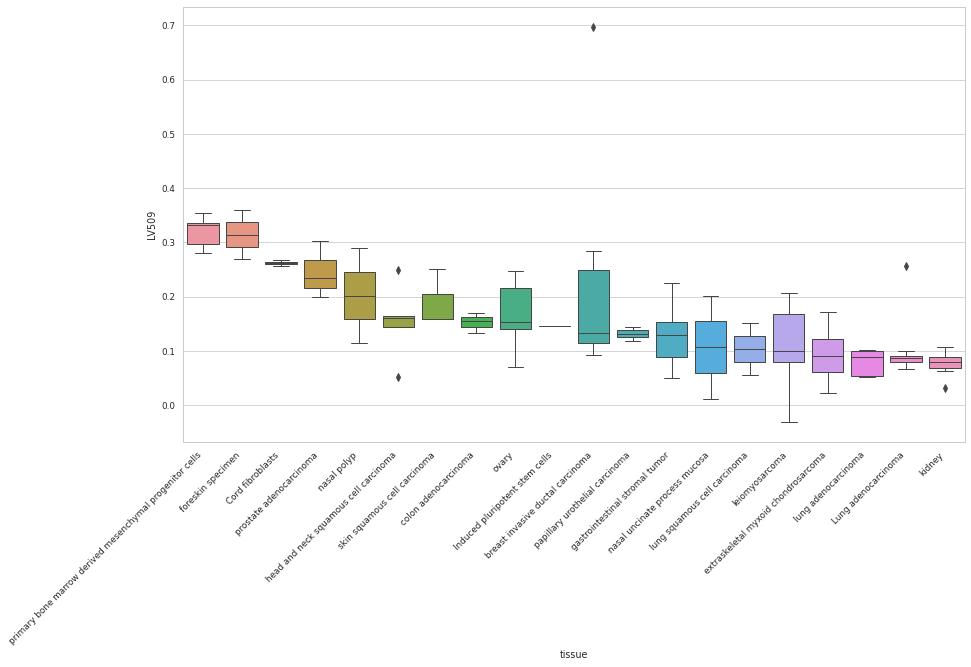

array(['SRP006575', 'SRP065202', 'SRP055569', 'SRP007596', 'SRP042579',
       'SRP026315', 'SRP044611', 'SRP026537', 'SRP012461', 'SRP046749',
       'SRP033135', 'SRP049500', 'SRP057196', 'SRP017644', 'SRP005279',
       'SRP051102', 'SRP040136', 'SRP009276', 'SRP004847', 'SRP060416',
       'SRP042161', 'SRP041210', 'SRP020493', 'SRP051599', 'SRP055153',
       'SRP049988', 'SRP051765', 'SRP017411', 'SRP003726', 'SRP022920',
       'SRP063620'], dtype=object)

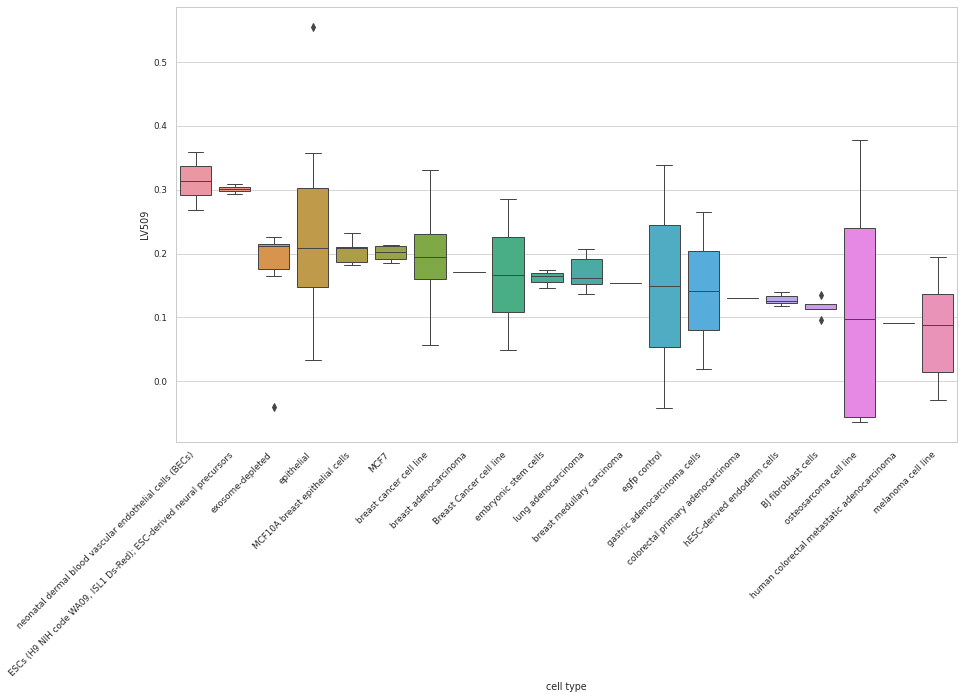

array(['SRP019936'], dtype=object)

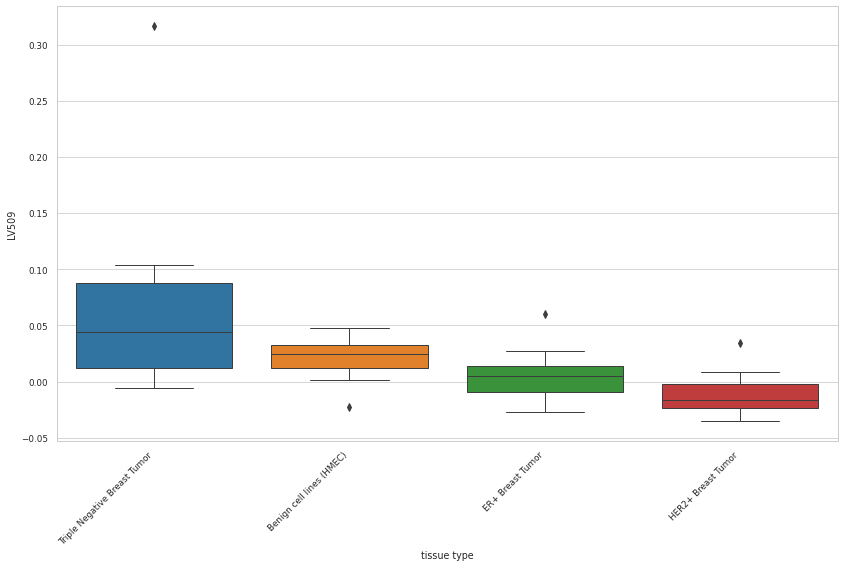

array(['SRP036821'], dtype=object)

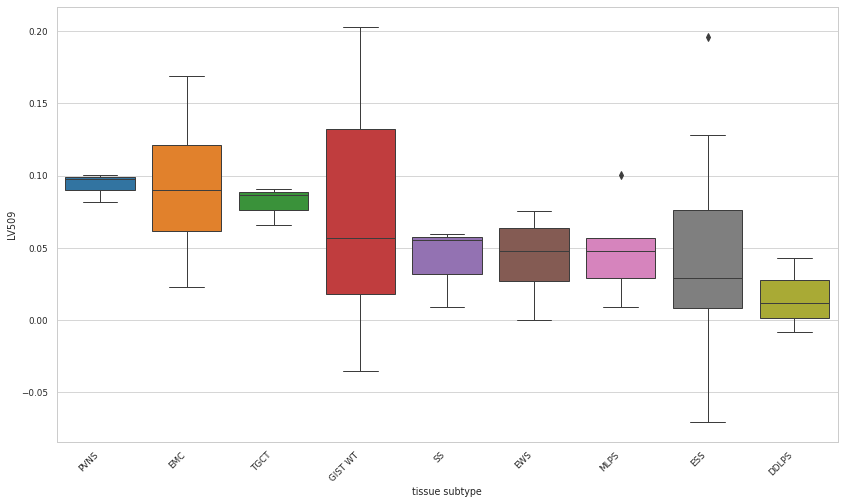

array(['SRP058120'], dtype=object)

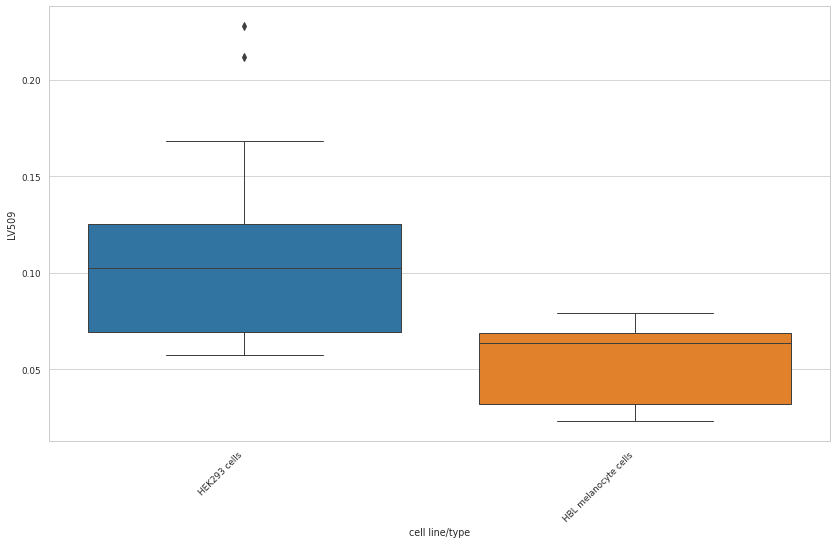

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP015013, SRP033135, SRP057196, SRP055569, SRP042161, SRP066834, SRP060416, SRP011185, SRP055153, SRP063840, SRP050499, SRP058773, SRP007947, SRP018718, SRP059775, SRP017777, SRP018717, SRP028180, SRP063493, SRP022892, SRP064259, SRP003901, SRP012461, SRP009247, SRP028291, SRP019994, SRP045659, SRP029656, SRP036821, SRP002487, SRP033116, SRP018719, SRP007498, SRP057745, SRP059035, SRP009862, SRP009266, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (35 != 37)
  warnings.warn(


''

testicular carcinoma                                                                                             3.519796
20003_1141180392-Treatmentmedication_code_cefalexin                                                              3.408116
3064_raw-Peak_expiratory_flow_PEF                                                                                3.207517
20003_1140872694-Treatmentmedication_code_flucloxacillin                                                         3.207487
20089_461-Type_of_meals_eaten_Takeaway_meals                                                                     3.186465
20536_2-Weight_change_during_worst_episode_of_depression_Lost_weight                                             3.178692
20003_1141151288-Treatmentmedication_code_naramig_25mg_tablet                                                    3.160685
C_BREAST_3-Malignant_neoplasm_of_breast                                                                          3.144259
22601_35333259-Job_codin

''

gene_name     LV467 gene_band
0    SNRPD1  6.554490   18q11.2
1    ZNF528  5.807230  19q13.41
2      TAB2  5.519590    6q25.1
3      DHPS  3.692136  19p13.13
4    NDUFB7  3.540023  19p13.12
5    MRPL34  2.827193  19p13.11
6     LIN54  2.671333   4q21.22
7   ABHD14A  2.556434    3p21.2
8     DRAP1  1.828024   11q13.1
9     ECHS1  1.733909   10q26.3

tissue            0.003626
cell type         0.003372
tissue subtype    0.000485
dtype: float64

array(['SRP057196', 'SRP066834', 'SRP017777', 'SRP028180', 'SRP003901',
       'SRP019994', 'SRP036821'], dtype=object)

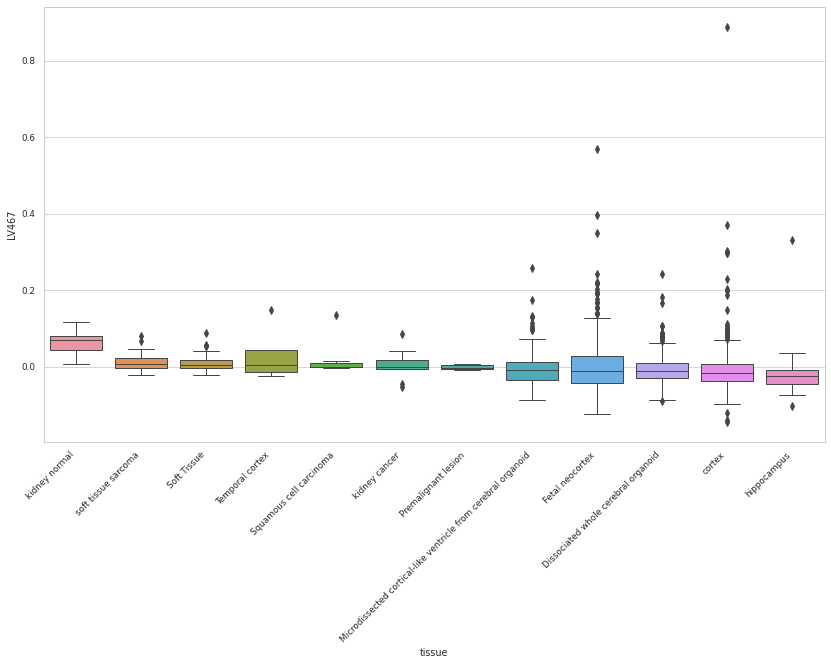

array(['SRP033135', 'SRP057196', 'SRP055569', 'SRP042161', 'SRP060416',
       'SRP055153', 'SRP063840', 'SRP007947', 'SRP028180', 'SRP064259',
       'SRP012461', 'SRP028291', 'SRP059035'], dtype=object)

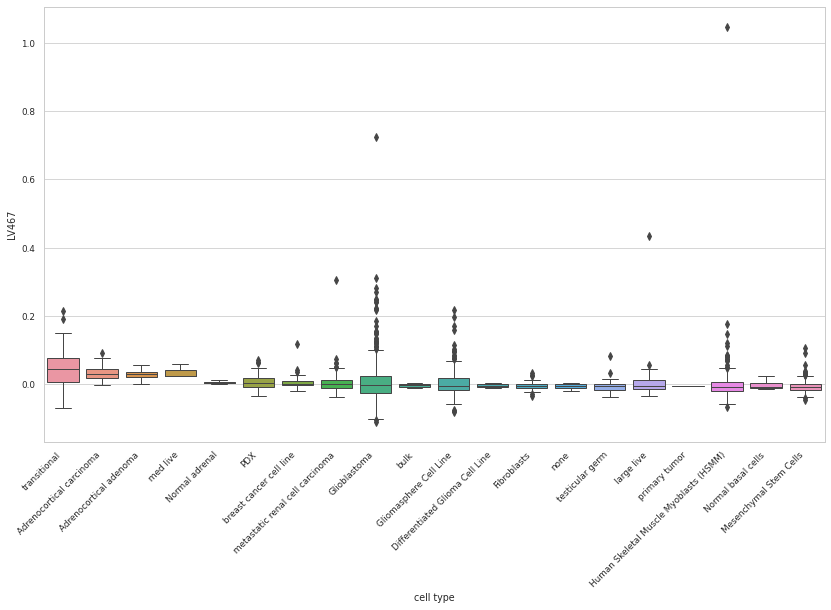

array(['SRP036821'], dtype=object)

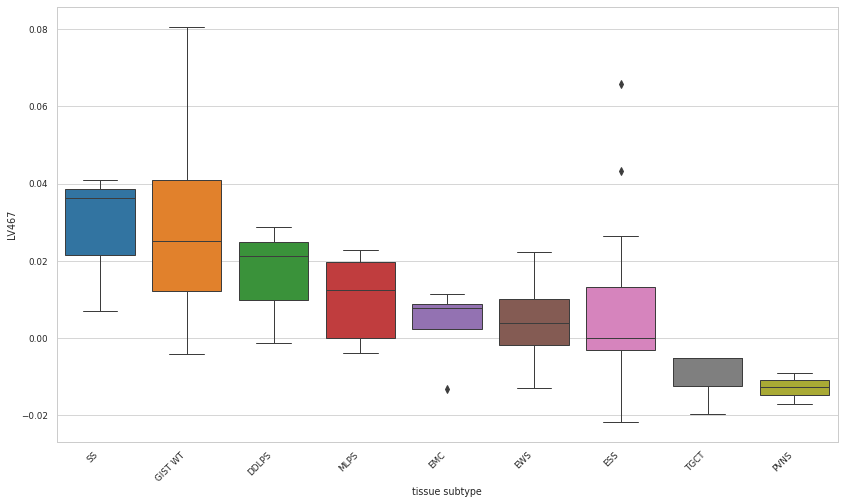

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP009862, SRP041788, SRP035391, SRP009266, SRP043962, SRP046749, SRP017933, SRP042161, SRP026315, SRP028815, SRP013725, SRP011185, SRP055569, SRP033135, SRP060416, SRP012461, SRP058773, SRP014620, SRP018838, SRP066834, SRP002487, SRP053052, SRP007461, SRP055810, SRP011924, SRP057196, SRP009374, SRP001563, SRP059775, SRP028301, SRP005177, SRP047476, SRP035599, SRP058840, SRP012056, SRP009247, SRP050365, SRP006475, SRP022920, SRP001540, SRP014428, SRP010350, SRP065559, SRP005174, SRP050147, SRP043417, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (43 != 46)
  warnings.warn(


''

30090_raw-Platelet_crit                                                                                                                          3.605779
22601_21213038-Job_coding_civil_engineer_transport_engineer_structural_engineer_borough_surveyor                                                 3.148857
platelet count                                                                                                                                   3.148512
3647-Duration_of_other_exercises                                                                                                                 3.062410
6146_2-Attendancedisabilitymobility_allowance_Disability_living_allowance                                                                        2.899172
L12_DERM_NAS-Other_and_unspecified_dermatitis                                                                                                    2.853533
20003_1140923346-Treatmentmedication_code_cocodamol                         

''

gene_name      LV64 gene_band
0    MRPS36  4.778725    5q13.2
1      MYL5  3.133090    4p16.3
2     PEX14  3.022315   1p36.22
3    COX6B1  2.707511  19q13.12
4     PFDN6  2.643474   6p21.32
5    COX7A2  2.407404    6q14.1
6      LSM7  2.368165   19p13.3
7     COX17  2.266831   3q13.33
8    NDUFS3  2.253541   11p11.2
9     ATP5O  2.174722  21q22.11

tissue       0.006402
cell type    0.004805
dtype: float64

array(['SRP017933', 'SRP066834', 'SRP011924', 'SRP057196', 'SRP014428',
       'SRP065559'], dtype=object)

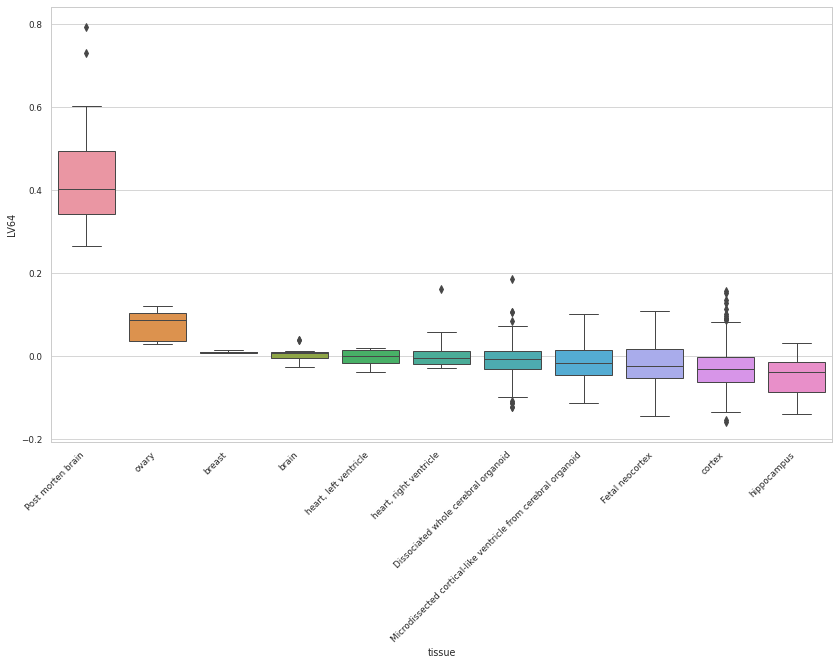

array(['SRP046749', 'SRP042161', 'SRP026315', 'SRP055569', 'SRP033135',
       'SRP060416', 'SRP012461', 'SRP014620', 'SRP053052', 'SRP057196',
       'SRP009374', 'SRP047476', 'SRP035599', 'SRP022920', 'SRP014428',
       'SRP050147'], dtype=object)

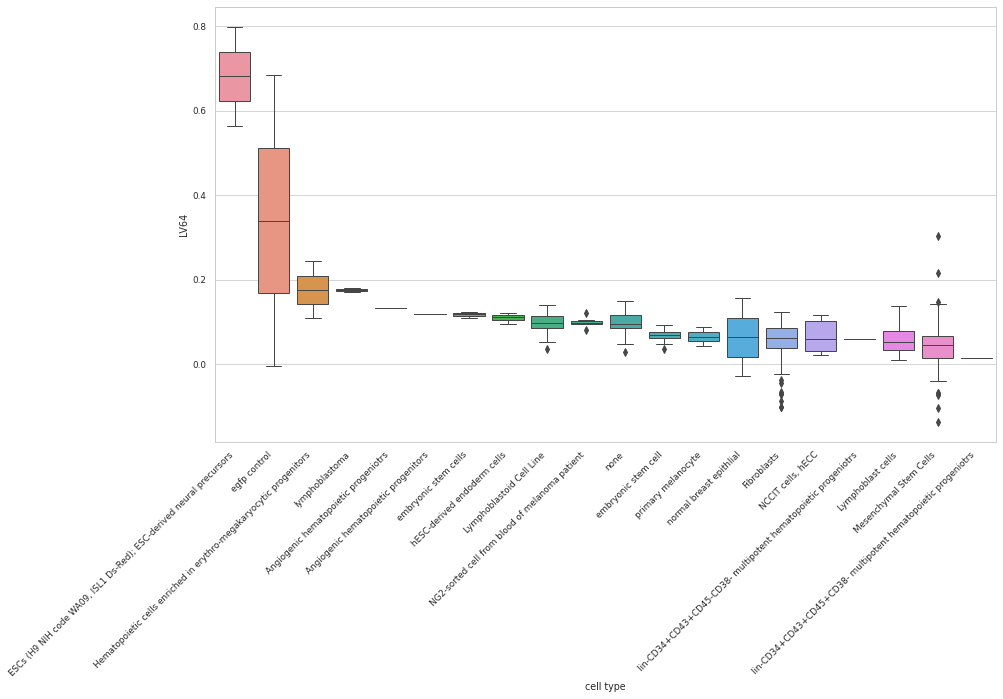

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP060416, SRP038963, SRP030617, SRP057196, SRP042161, SRP066834, SRP002487, SRP007947, SRP058120, SRP024268, SRP050499, SRP017777, SRP027383, SRP064464, SRP012461, SRP003901, SRP002640, SRP033135, SRP019994, SRP059379, SRP059035, SRP040966, SRP029334, SRP013725, SRP009247, SRP039552, SRP055153, SRP041751, SRP009266, SRP045659, SRP007946, SRP036821, SRP056330, SRP044668, SRP031501, SRP057205, SRP014428, SRP063840, SRP017933, SRP039077, SRP064259, SRP051102, SRP013239, SRP039348, SRP017789, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (44 != 46)
  warnings.warn(


''

1747_2-Hair_colour_natural_before_greying_Red                                                             6.452818
pernicious anemia                                                                                         3.657428
20003_1140858452-Treatmentmedication_code_hepacon_b12_1mg1ml_injection                                    3.589015
4119_raw-Ankle_spacing_width_right                                                                        3.488224
20003_1203-Treatmentmedication_code_aloe_vera_product                                                     3.362611
20003_1140863302-Treatmentmedication_code_lorazepam                                                       3.298350
6140_1-Heating_types_in_home_Gas_central_heating                                                          3.197975
4100_raw-Ankle_spacing_width_left                                                                         3.165577
22617_5422-Job_SOC_coding_Printers                                              

''

gene_name     LV490 gene_band
0     CXXC1  3.874728   18q21.1
1      EPN2  3.744455   17p11.2
2     VAMP5  3.712260    2p11.2
3      UBL5  3.644279   19p13.2
4  PPP1R14B  3.027101   11q13.1
5    GOLGA2  3.001414   9q34.11
6    RAB22A  2.987273  20q13.32
7     GALNS  2.952807   16q24.3
8   ST3GAL6  2.609216    3q12.1
9     DUSP5  2.514194   10q25.2

cell type         0.022597
cell line/type    0.003714
tissue            0.002501
tissue subtype    0.001125
tissue type       0.000412
dtype: float64

array(['SRP055569', 'SRP060416', 'SRP038963', 'SRP057196', 'SRP042161',
       'SRP007947', 'SRP012461', 'SRP033135', 'SRP059379', 'SRP059035',
       'SRP040966', 'SRP039552', 'SRP055153', 'SRP041751', 'SRP007946',
       'SRP056330', 'SRP014428', 'SRP063840', 'SRP039077', 'SRP064259',
       'SRP051102'], dtype=object)

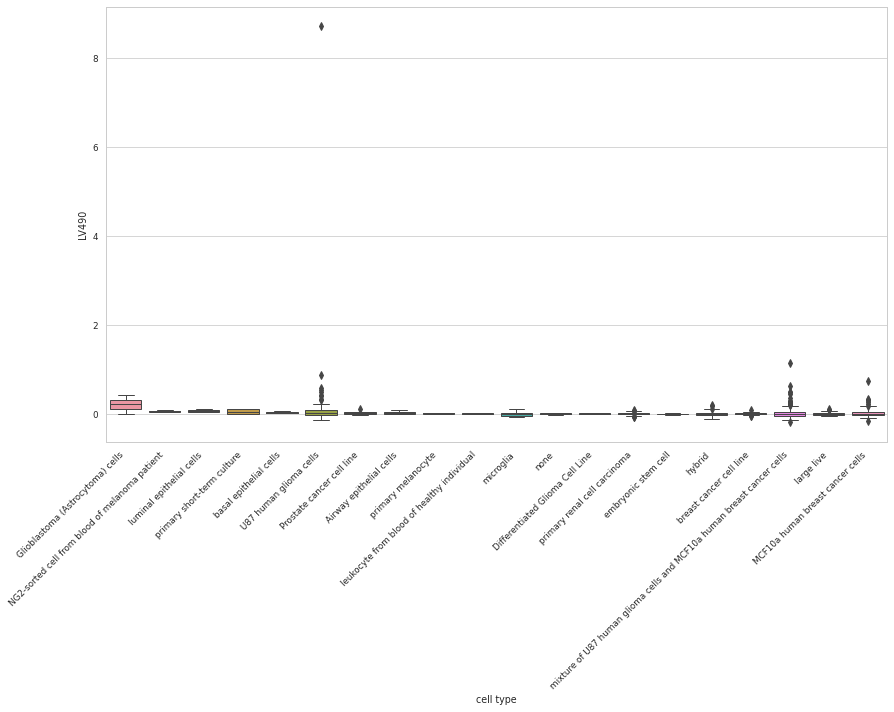

array(['SRP058120'], dtype=object)

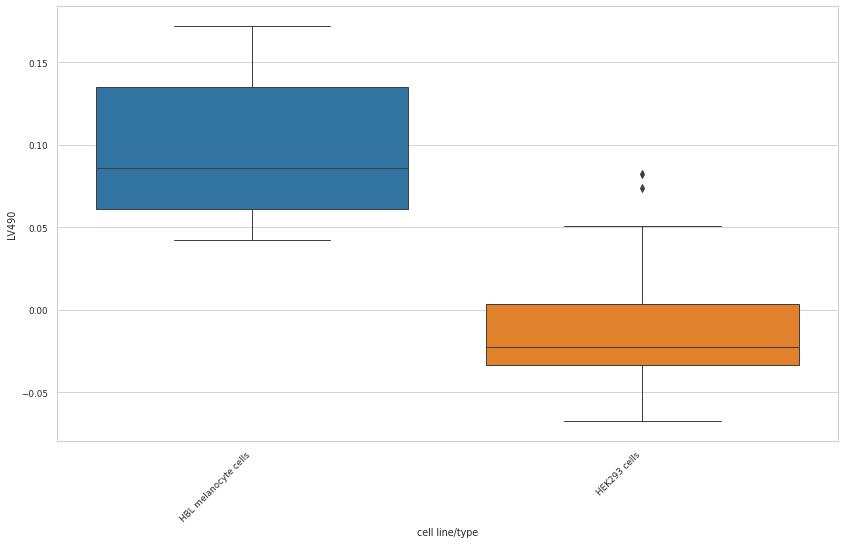

array(['SRP057196', 'SRP066834', 'SRP024268', 'SRP017777', 'SRP003901',
       'SRP002640', 'SRP019994', 'SRP036821', 'SRP056330', 'SRP014428',
       'SRP017933', 'SRP039348'], dtype=object)

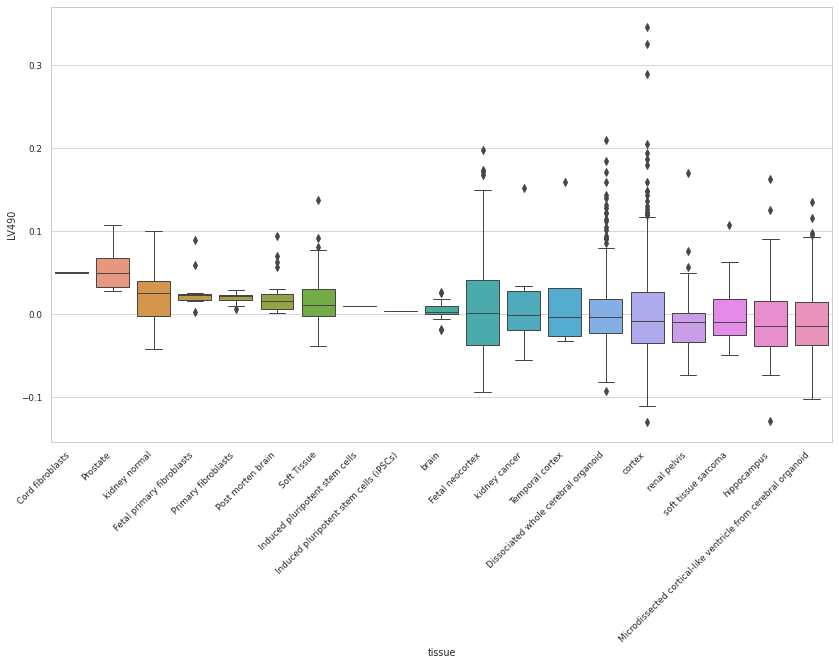

array(['SRP036821'], dtype=object)

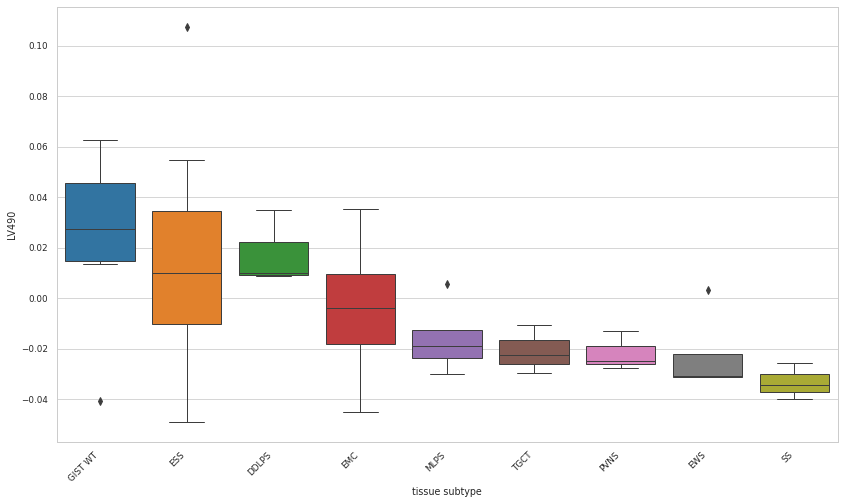

array(['SRP044668'], dtype=object)

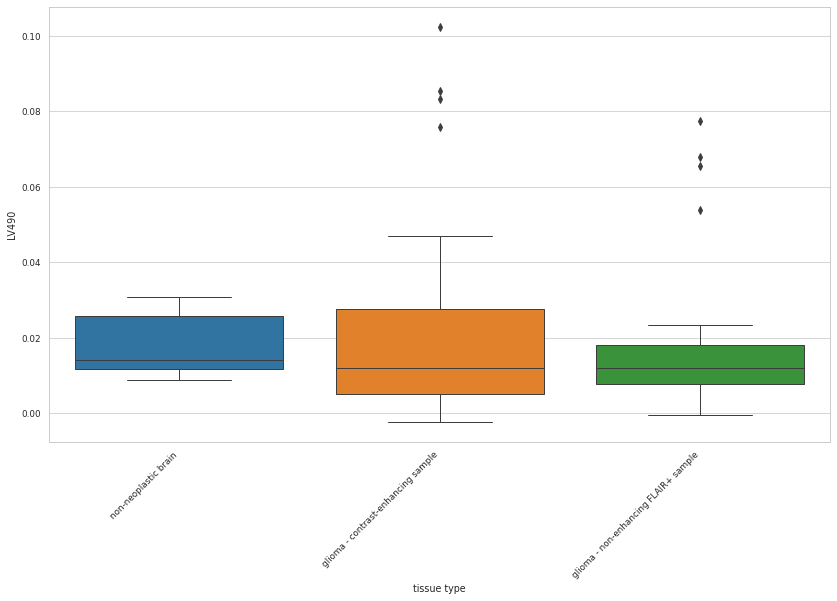

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP033135, SRP051606, SRP009247, SRP057196, SRP066834, SRP060416, SRP012557, SRP049097, SRP019994, SRP042161, SRP017933, SRP065559, SRP058773, SRP007498, SRP012461, SRP050497, SRP019807, SRP041396, SRP019936, SRP030617, SRP055438, SRP050499, SRP045352, SRP042620, SRP055153, SRP055810, SRP051825, SRP064464, SRP018853, SRP055392, SRP002184, SRP009266, SRP063840, SRP006474, SRP015845, SRP026315, SRP059733, SRP048820, SRP036848, SRP059035, SRP034007, SRP015013, SRP011578, SRP058667, SRP009862, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (43 != 46)
  warnings.warn(


''

41248_8002-Destinations_on_discharge_from_hospital_recoded_Other_hospital_NonNHS                                                      3.978492
20107_10-Illnesses_of_father_Alzheimers_diseasedementia                                                                               3.532805
22601_91392832-Job_coding_other_work_in_this_industry_factory_hand_mate_assistant_handler_loader                                      3.509538
20003_1140868170-Treatmentmedication_code_prochlorperazine                                                                            3.421248
6152_9-Blood_clot_DVT_bronchitis_emphysema_asthma_rhinitis_eczema_allergy_diagnosed_by_doctor_Hayfever_allergic_rhinitis_or_eczema    3.343142
22601_61223105-Job_coding_childminder_au_pair_childrens_nanny                                                                         3.264615
20433_raw-Age_at_first_episode_of_depression                                                                                          3.256141

''

gene_name     LV550 gene_band
0    SEC23A  7.336220   14q21.1
1       LPP  6.631632    3q27.3
2    SUPT5H  5.822339   19q13.2
3     NCBP2  3.312370      3q29
4   SLC7A11  3.187730    4q28.3
5     ATP5I  1.198183    4p16.3
6     VAMP2  1.054193   17p13.1
7    GRIN3B  1.037896   19p13.3
8     PRDX4  1.018353       NaN
9      MYL6  0.999869   12q13.2

cell type         0.020755
tissue type       0.005532
tissue subtype    0.001955
tissue            0.001612
dtype: float64

array(['SRP055569', 'SRP033135', 'SRP051606', 'SRP057196', 'SRP060416',
       'SRP042161', 'SRP012461', 'SRP045352', 'SRP055153', 'SRP002184',
       'SRP063840', 'SRP026315', 'SRP048820', 'SRP059035', 'SRP034007',
       'SRP011578'], dtype=object)

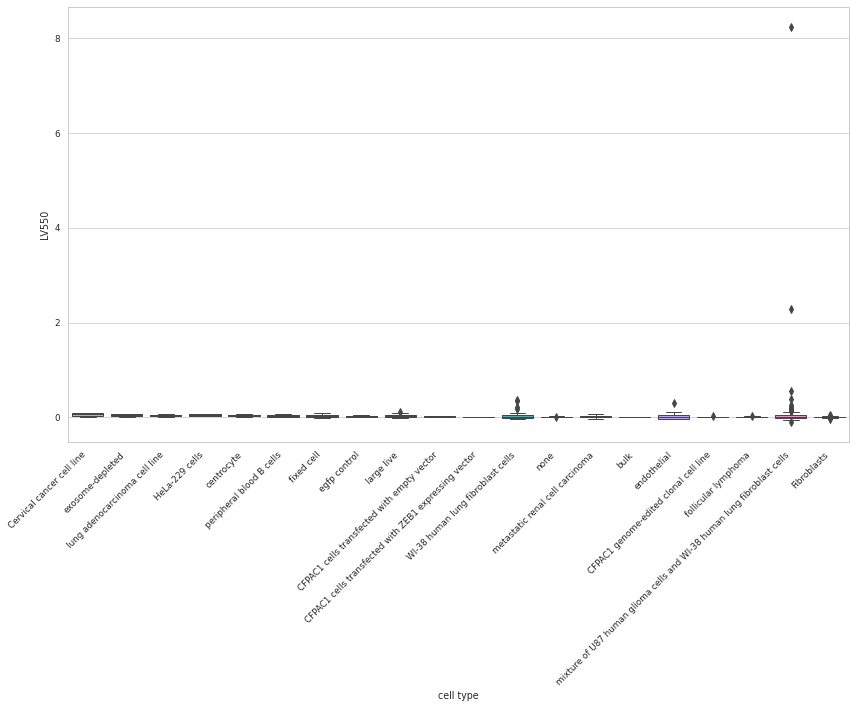

array(['SRP049097', 'SRP019936', 'SRP058667'], dtype=object)

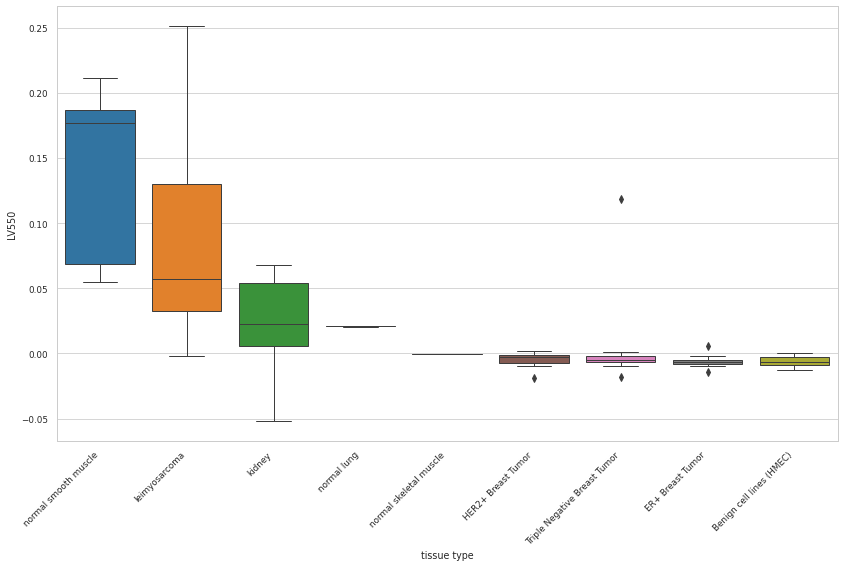

array(['SRP058667'], dtype=object)

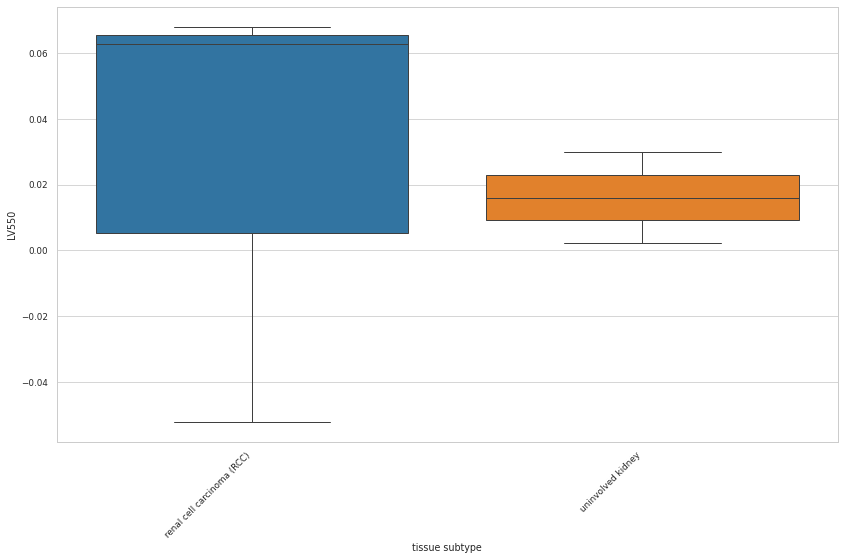

array(['SRP057196', 'SRP066834', 'SRP049097', 'SRP019994', 'SRP017933',
       'SRP065559', 'SRP019807', 'SRP042620', 'SRP051825', 'SRP048820',
       'SRP036848'], dtype=object)

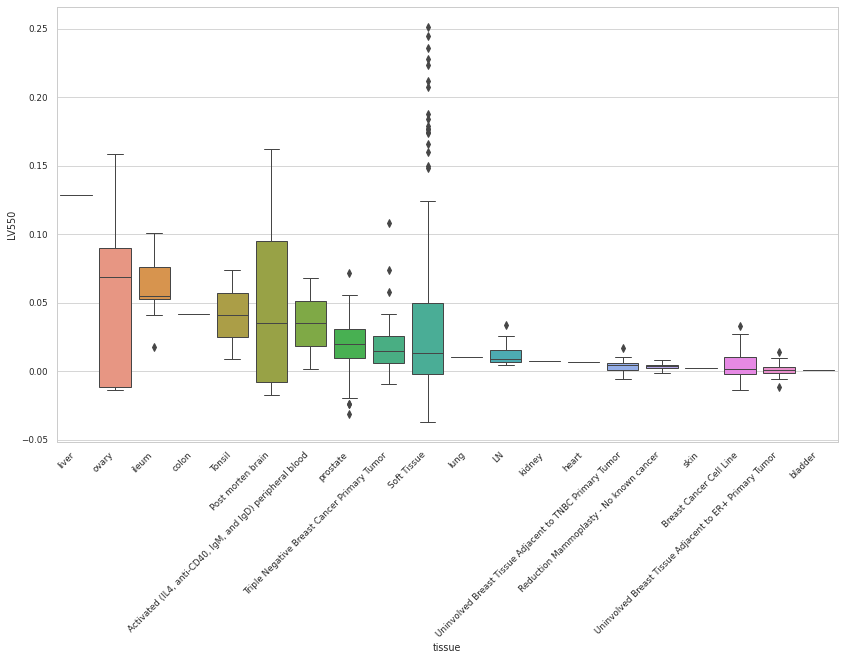

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP057196, SRP042161, SRP066834, SRP059775, SRP060416, SRP055810, SRP014320, SRP033135, SRP012461, SRP055153, SRP058773, SRP033116, SRP047192, SRP064464, SRP059379, SRP048577, SRP055513, SRP033248, SRP043166, SRP059035, SRP017959, SRP058977, SRP008145, SRP047082, SRP049068, SRP058120, SRP063840, SRP014428, SRP025982, SRP028301, SRP047299, SRP058841, SRP030617, SRP050499, SRP049500, SRP018838, SRP006970, SRP048536, SRP022892, SRP034543, SRP019810, SRP057205, SRP041825, SRP059925, SRP009862, SRP002184, SRP017435, SRP009266, SRP007569, SRP042184, SRP018853, SRP046271, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (50 != 53)
  warnings.warn(


''

20003_1140877826-Treatmentmedication_code_sodium_bicarbonate                              4.461457
intestinal disease AND viral disease                                                      3.667026
22608_2-Workplace_very_hot_Often                                                          3.491025
22617_2433-Job_SOC_coding_Quantity_surveyors                                              3.465750
20003_1141146188-Treatmentmedication_code_latanoprost                                     3.448302
22601_32223079-Job_coding_occupational_therapist                                          3.375206
1488_raw-Tea_intake                                                                       3.353243
3089-Caffeine_drink_within_last_hour                                                      3.081025
22601_91212536-Job_coding_builders_labourer_building_worker_hod_carrier                   3.009507
22617_3222-Job_SOC_coding_Occupational_therapists                                         2.991427
6147_7-Rea

''

gene_name     LV621 gene_band
0      MYOF  7.623231  10q23.33
1    SNRPD3  6.821658  22q11.23
2     DGUOK  3.455496    2p13.1
3     SCN8A  2.416695  12q13.13
4     ROCK2  2.047815    2p25.1
5    KIF13A  1.944276    6p22.3
6     PDIA4  1.818648    7q36.1
7     UCHL1  1.777697      4p13
8     XRCC3  1.616942  14q32.33
9    POU2F2  1.579425   19q13.2

cell type         0.019766
tissue            0.001419
cell line/type    0.001141
dtype: float64

array(['SRP055569', 'SRP057196', 'SRP042161', 'SRP060416', 'SRP033135',
       'SRP012461', 'SRP055153', 'SRP047192', 'SRP059379', 'SRP048577',
       'SRP059035', 'SRP047082', 'SRP049068', 'SRP063840', 'SRP014428',
       'SRP047299', 'SRP049500', 'SRP006970', 'SRP034543', 'SRP019810',
       'SRP041825', 'SRP059925', 'SRP002184', 'SRP007569'], dtype=object)

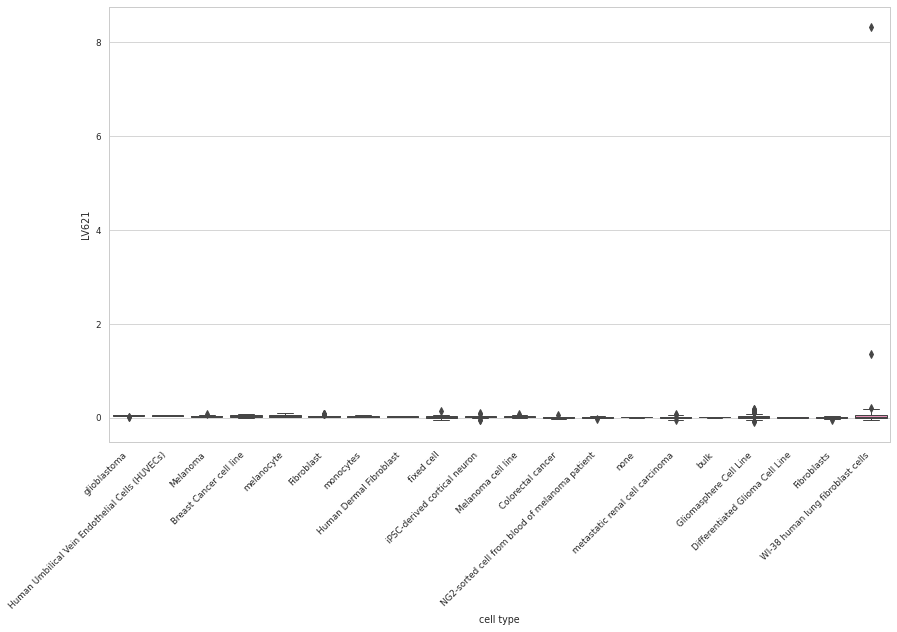

array(['SRP057196', 'SRP066834', 'SRP047192', 'SRP055513', 'SRP033248',
       'SRP043166', 'SRP014428'], dtype=object)

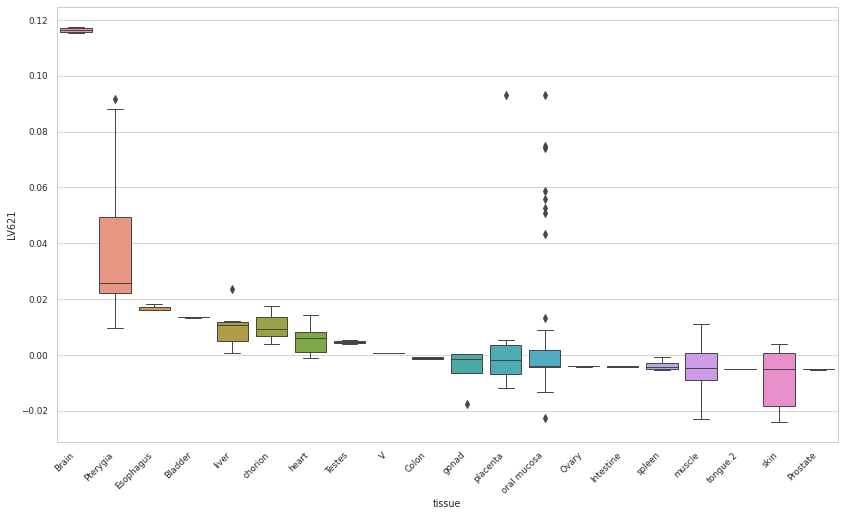

array(['SRP058120'], dtype=object)

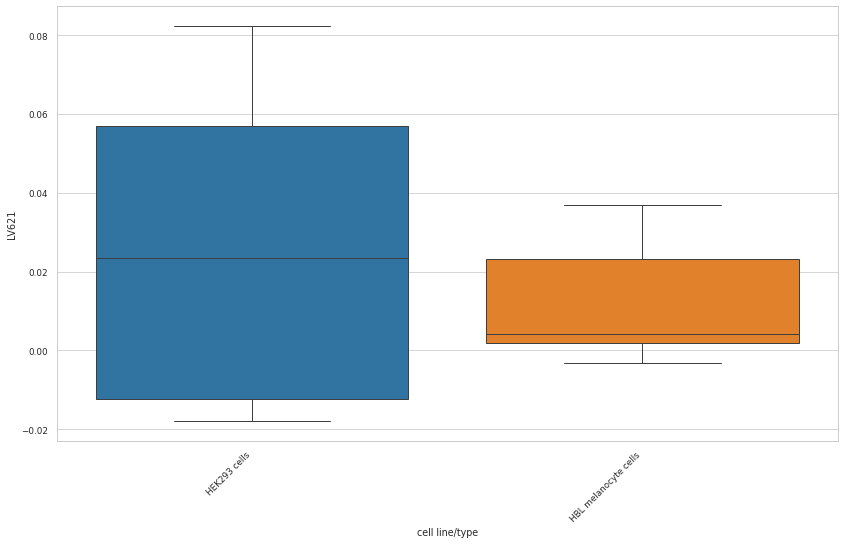

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP066834, SRP007338, SRP057196, SRP042161, SRP033135, SRP059379, SRP060416, SRP058773, SRP050499, SRP045659, SRP002326, SRP057205, SRP059732, SRP007508, SRP009862, SRP033248, SRP063840, SRP011422, SRP009266, SRP012461, SRP047519, SRP045869, SRP049409, SRP064464, SRP008218, SRP034953, SRP042218, SRP057244, SRP007359, SRP015013, SRP055153, SRP050992, SRP010279, SRP049500, SRP007947, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (34 != 36)
  warnings.warn(


''

celiac disease                                                                                                          4.347747
22601_23293031-Job_coding_other_researchers_including_in_broadcasting_journalism_photography_printing_and_publishing    4.341198
20490-Sexually_molested_as_a_child                                                                                      3.851316
100005_raw-Carbohydrate                                                                                                 3.649675
20084_484-Vitamin_andor_mineral_supplement_use_Selenium_                                                                3.585173
psoriasis                                                                                                               3.342155
4803_0-Tinnitus_No_never                                                                                                3.298614
alzheimer's disease                                                                              

''

gene_name     LV775 gene_band
0    POLR3A  6.700381   10q22.3
1    MRPL53  4.833926    2p13.1
2    GRPEL1  3.220496    4p16.1
3      PKIG  3.183743  20q13.12
4  ATP6V0E1  2.414161    5q35.1
5      TNIK  2.325139   3q26.31
6    NDUFS3  2.321125   11p11.2
7      IER3  2.168138   6p21.33
8       ELL  1.966898  19p13.11
9     IMPA2  1.755961  18p11.21

cell type    0.018859
tissue       0.002026
dtype: float64

array(['SRP055569', 'SRP057196', 'SRP042161', 'SRP033135', 'SRP059379',
       'SRP060416', 'SRP007508', 'SRP063840', 'SRP012461', 'SRP047519',
       'SRP049409', 'SRP008218', 'SRP042218', 'SRP055153', 'SRP050992',
       'SRP049500', 'SRP007947'], dtype=object)

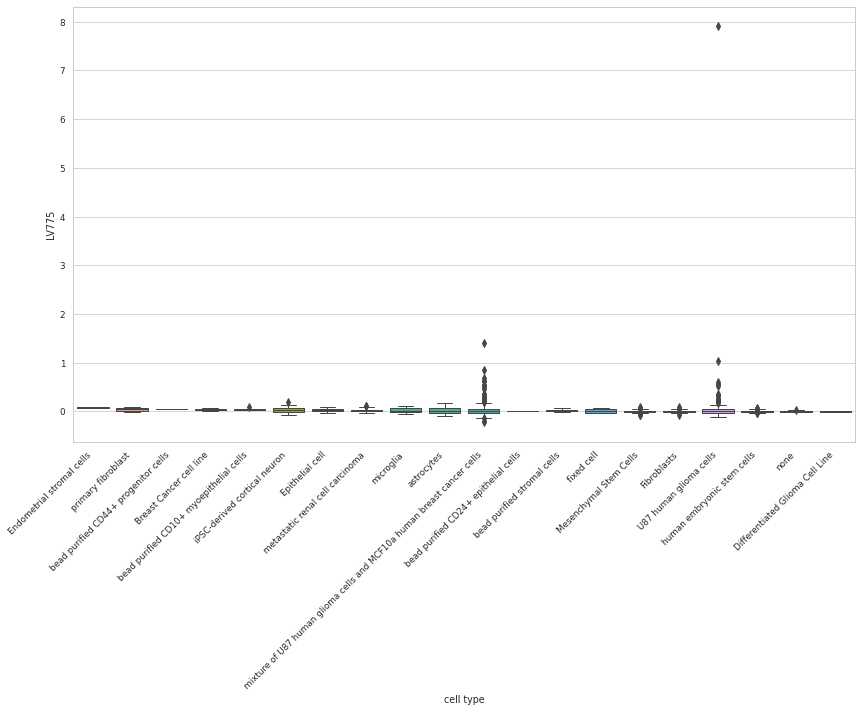

array(['SRP066834', 'SRP057196', 'SRP002326', 'SRP033248', 'SRP011422',
       'SRP047519', 'SRP045869', 'SRP008218', 'SRP034953', 'SRP042218',
       'SRP007359'], dtype=object)

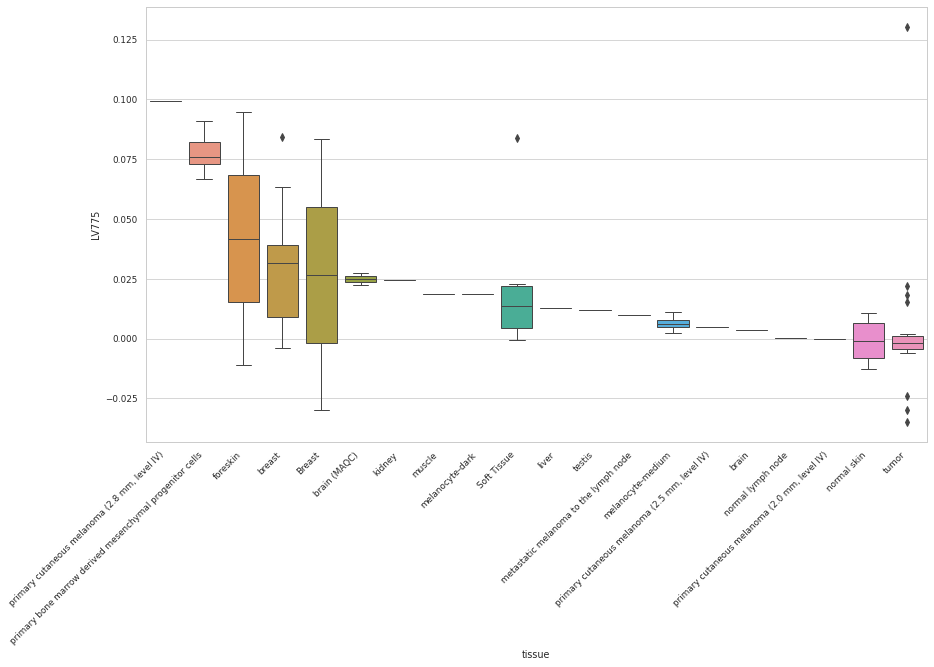

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP042161, SRP055153, SRP066834, SRP015449, SRP009247, SRP060416, SRP057196, SRP002184, SRP058773, SRP012461, SRP018719, SRP004042, SRP050499, SRP011578, SRP043960, SRP033135, SRP052740, SRP014670, SRP015715, SRP014591, SRP009862, SRP056912, SRP021912, SRP033267, SRP008218, SRP032833, SRP058351, SRP041036, SRP048536, SRP057205, SRP025982, SRP064967, SRP013450, SRP063620, SRP019994, SRP058435, SRP064464, SRP015013, SRP042620, SRP059379, SRP051102, SRP015336, SRP050992, SRP019810, SRP002487, SRP001540, SRP050440, SRP055810, SRP064454, SRP045859, SRP014671, SRP010350, SRP061033, SRP067836, SRP033466, SRP045294, SRP024268, SRP064259, SRP048674, SRP027514, SRP005129, SRP041255, SRP043417, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (63 != 64)
  warnings.warn(


''

3144_raw-Heel_Broadband_ultrasound_attenuation_direct_entry                                           4.103467
H7_PTOSIS-Ptosis_of_eyelid                                                                            4.091504
41215_1-Detention_categories_Formally_detained_under_Part_II_Mental_Health_Act_1983                   3.865909
30130_raw-Monocyte_count                                                                              3.859653
20111_1-Illnesses_of_siblings_Heart_disease                                                           3.787988
20090_383-Type_of_fatoil_used_in_cooking_Soya_margarine                                               3.716689
22601_12253173-Job_coding_manager_of_theatre_cinema_museum                                            3.575197
5254_raw-Intraocular_pressure_cornealcompensated_right                                                3.560536
22601_34213150-Job_coding_graphic_designer_commercial_artist_desktop_publishing_artist_illuminator    3.458545
2

''

gene_name     LV415 gene_band
0       MCM3  6.787468    6p12.2
1    EPB41L2  5.235813    6q23.2
2       SV2A  4.786875    1q21.2
3    MYBBP1A  4.120657   17p13.2
4  HNRNPA1L2  3.200855   13q14.3
5       CROT  2.882331   7q21.12
6    GATAD2A  2.416395  19p13.11
7      CHERP  2.373250  19p13.11
8       ATF4  2.351050   22q13.1
9       PDP2  2.260702   16q22.1

cell type       0.021132
tissue          0.001301
tissue type     0.001032
cell subtype    0.000237
dtype: float64

array(['SRP055569', 'SRP042161', 'SRP055153', 'SRP060416', 'SRP057196',
       'SRP002184', 'SRP012461', 'SRP004042', 'SRP011578', 'SRP033135',
       'SRP052740', 'SRP014670', 'SRP015715', 'SRP021912', 'SRP033267',
       'SRP008218', 'SRP013450', 'SRP063620', 'SRP058435', 'SRP059379',
       'SRP051102', 'SRP050992', 'SRP019810', 'SRP064454', 'SRP045859',
       'SRP061033', 'SRP067836', 'SRP045294', 'SRP064259', 'SRP048674',
       'SRP027514', 'SRP005129'], dtype=object)

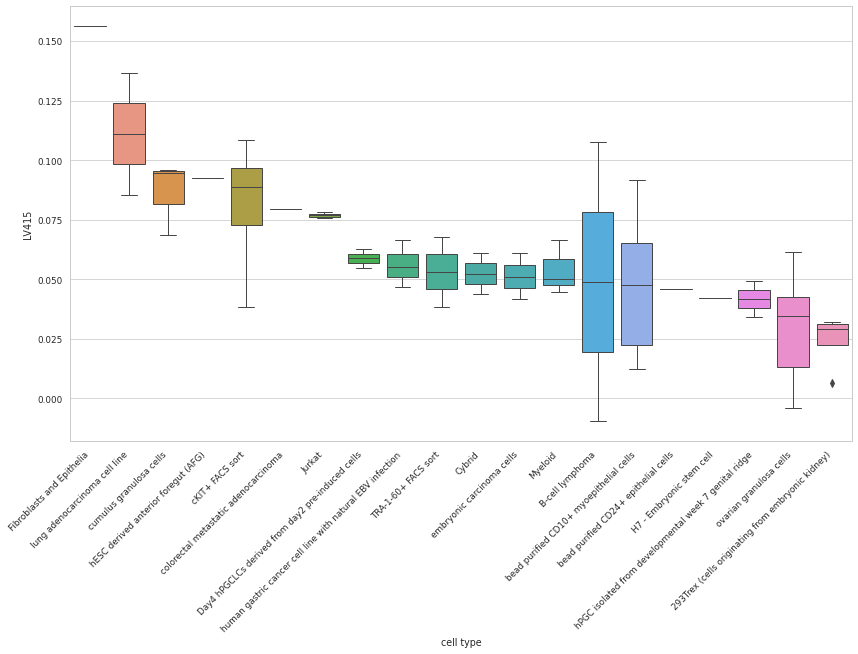

array(['SRP066834', 'SRP057196', 'SRP004042', 'SRP014670', 'SRP008218',
       'SRP058351', 'SRP019994', 'SRP042620', 'SRP015336', 'SRP024268'],
      dtype=object)

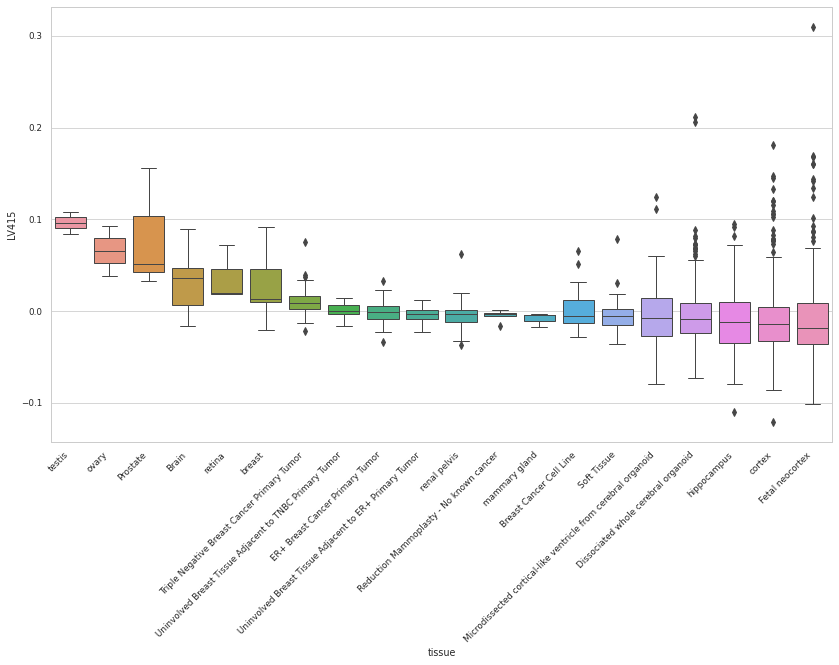

array(['SRP032833'], dtype=object)

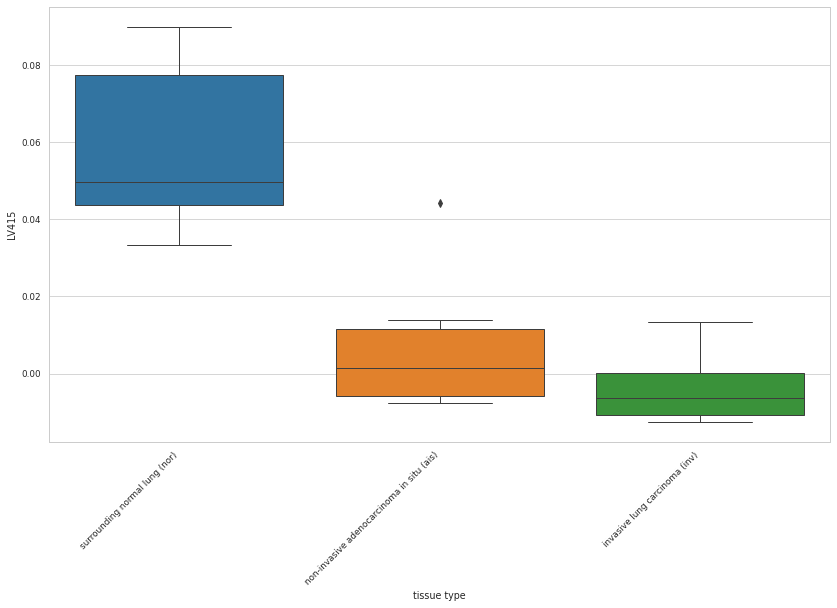

array(['SRP064454'], dtype=object)

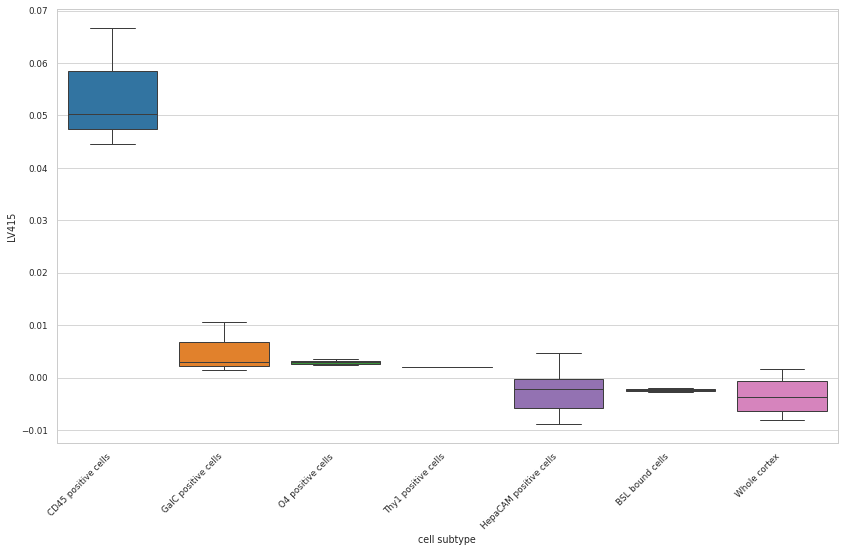

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP059039, SRP060416, SRP032789, SRP028336, SRP006474, SRP057196, SRP033135, SRP050892, SRP059643, SRP058181, SRP056477, SRP015013, SRP039397, SRP042161, SRP066834, SRP013239, SRP007412, SRP027258, SRP007338, SRP007359, SRP027015, SRP005279, SRP045639, SRP051606, SRP050499, SRP002326, SRP064464, SRP041538, SRP034634, SRP056295, SRP013363, SRP037982, SRP048759, SRP065559, SRP011546, SRP056696, SRP057721, SRP007461, SRP003227, SRP041094, SRP058237, SRP032989, SRP009266, SRP042620, SRP012557, SRP058773, SRP043962, SRP002487, SRP017575, SRP025982, SRP049061, SRP058722, SRP033276, SRP063889, SRP029367, SRP052491, SRP030628, SRP006575, SRP017942, SRP056604, SRP045441, SRP019994, SRP040998, SRP057205, SRP014428, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (62 != 66)
  warnings.warn(


''

celiac disease                                                                                                              6.598045
rheumatoid arthritis                                                                                                        6.560756
30140_raw-Neutrophill_count                                                                                                 4.604985
30000_raw-White_blood_cell_leukocyte_count                                                                                  4.476773
4119_raw-Ankle_spacing_width_right                                                                                          4.332012
4100_raw-Ankle_spacing_width_left                                                                                           4.313820
22601_71293332-Job_coding_advertising_or_sales_representative_demonstrator_estate_agent_negotiator_landproperty_salesman    4.193378
malabsorption syndrome                                               

''

gene_name     LV504 gene_band
0   TXNDC15  7.969476    5q31.1
1    HSPA1B  6.329783   6p21.33
2     RPS16  5.197029   19q13.2
3     VDAC2  3.045726   10q22.2
4     USP39  2.822147    2p11.2
5  TMEM176A  2.746703    7q36.1
6    COL6A3  2.650986    2q37.3
7     PEX10  2.121800   1p36.32
8      GIT2  1.931653  12q24.11
9      PXDN  1.827393    2p25.3

cell type    0.021147
tissue       0.000753
dtype: float64

array(['SRP055569', 'SRP060416', 'SRP057196', 'SRP033135', 'SRP042161',
       'SRP027258', 'SRP005279', 'SRP045639', 'SRP051606', 'SRP034634',
       'SRP056295', 'SRP048759', 'SRP011546', 'SRP057721', 'SRP003227',
       'SRP041094', 'SRP058237', 'SRP049061', 'SRP029367', 'SRP052491',
       'SRP006575', 'SRP045441', 'SRP014428'], dtype=object)

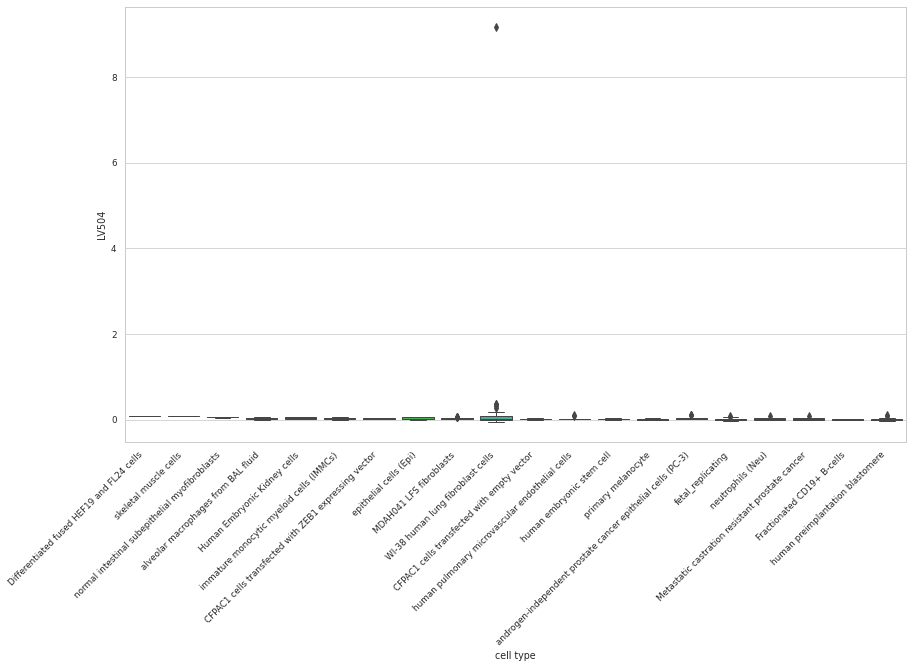

array(['SRP059039', 'SRP028336', 'SRP057196', 'SRP058181', 'SRP056477',
       'SRP066834', 'SRP007359', 'SRP005279', 'SRP002326', 'SRP041538',
       'SRP056295', 'SRP037982', 'SRP048759', 'SRP065559', 'SRP011546',
       'SRP056696', 'SRP058237', 'SRP042620', 'SRP017575', 'SRP058722',
       'SRP033276', 'SRP006575', 'SRP056604', 'SRP019994', 'SRP014428'],
      dtype=object)

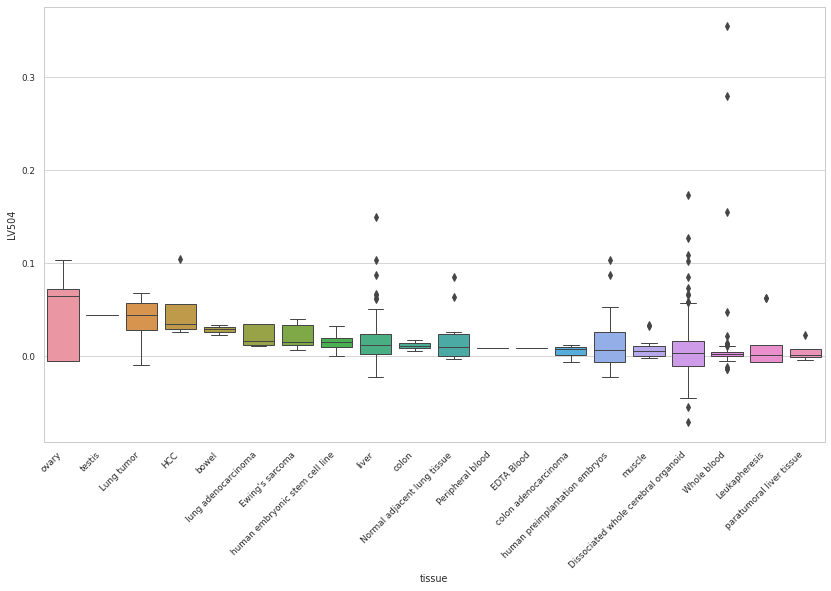

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP059170, SRP055569, SRP057196, SRP018838, SRP045565, SRP029513, SRP033135, SRP006474, SRP042161, SRP003227, SRP057244, SRP066834, SRP060416, SRP064464, SRP062025, SRP057248, SRP056049, SRP014320, SRP055810, SRP063840, SRP050992, SRP014428, SRP045052, SRP037735, SRP059035, SRP014620, SRP067661, SRP038963, SRP043033, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (28 != 29)
  warnings.warn(


''

M13_ENTESOPATHYNAS-Otherunspecified_enthesopathies_not_elsewhere_classified                                                            3.664653
22601_52232929-Job_coding_metal_working_production_or_maintenance_fitter_machine_fitter_fitter_and_turner_bench_fitter_plant_fitter    3.637035
22617_3314-Job_SOC_coding_Prison_service_officers_below_principal_officer                                                              3.394561
chronic fatigue syndrome                                                                                                               3.394343
XII_SKIN_SUBCUTAN-Diseases_of_the_skin_and_subcutaneous_tissue                                                                         3.359925
5257_raw-Corneal_resistance_factor_right                                                                                               3.323973
3436_raw-Age_started_smoking_in_current_smokers                                                                                        3

''

gene_name     LV507 gene_band
0   HNRNPH1  7.000735    5q35.3
1      WTAP  5.979387    6q25.3
2     TRA2A  5.110758    7p15.3
3     SRSF3  3.311172   6p21.31
4     PRDM1  3.058156      6q21
5    CTNNB1  2.953837    3p22.1
6    PPP1CB  2.804495    2p23.2
7    CAPZA1  2.652077    1p13.2
8      CD55  2.520109    1q32.2
9      CD3G  2.448798   11q23.3

tissue            0.069435
cell type         0.028320
cell phenotype    0.005842
dtype: float64

array(['SRP059170', 'SRP057196', 'SRP029513', 'SRP066834', 'SRP062025',
       'SRP014428', 'SRP067661'], dtype=object)

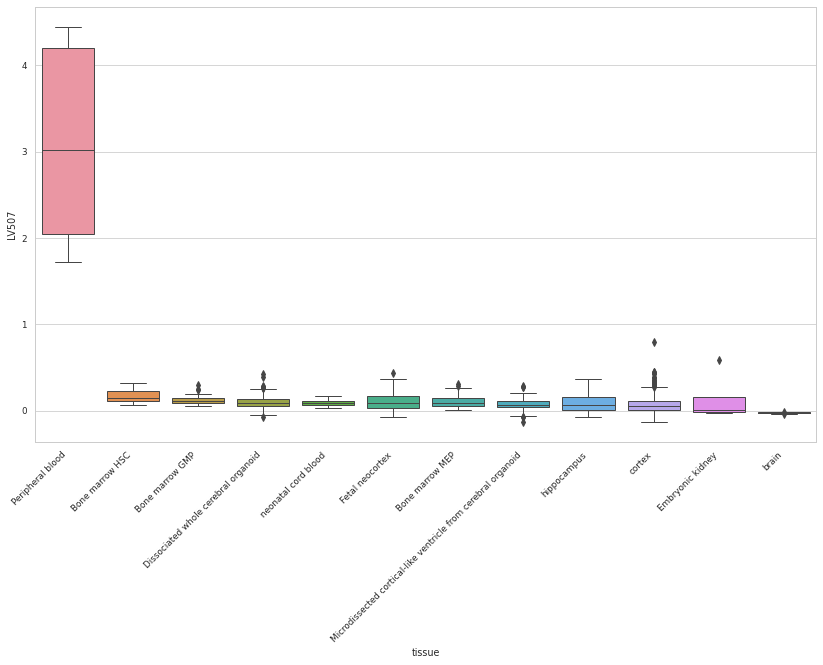

array(['SRP059170', 'SRP055569', 'SRP057196', 'SRP033135', 'SRP042161',
       'SRP003227', 'SRP060416', 'SRP063840', 'SRP050992', 'SRP014428',
       'SRP037735', 'SRP059035', 'SRP014620', 'SRP067661', 'SRP038963',
       'SRP043033'], dtype=object)

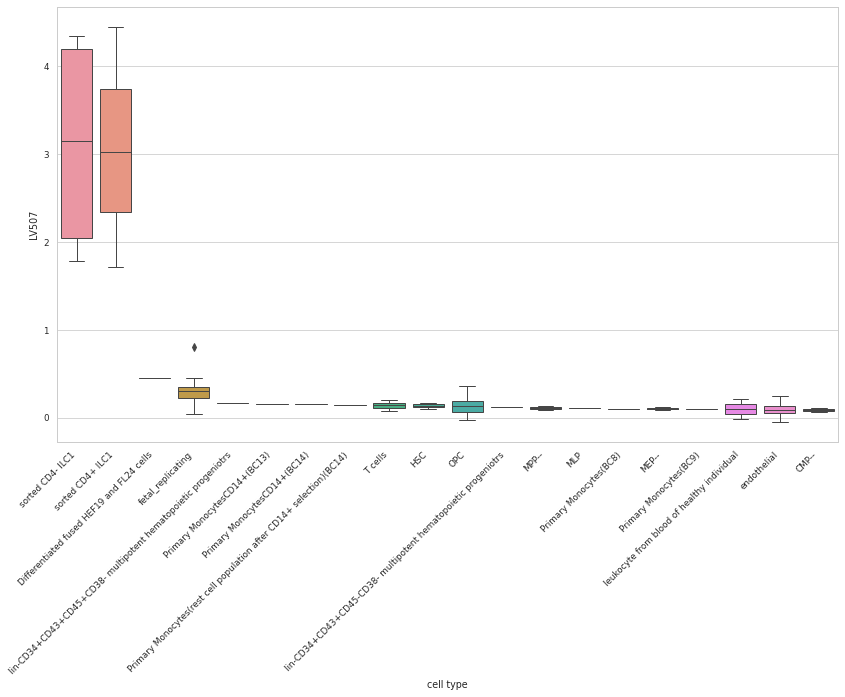

array(['SRP062025'], dtype=object)

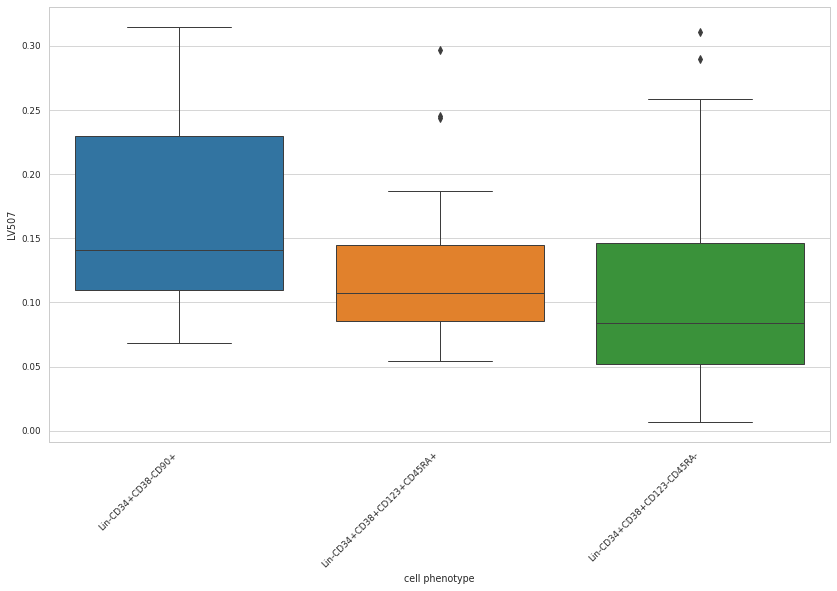

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP055153, SRP057196, SRP066834, SRP042161, SRP060416, SRP006474, SRP015976, SRP025989, SRP033135, SRP018853, SRP063840, SRP012461, SRP050499, SRP058773, SRP049238, SRP014856, SRP059775, SRP011546, SRP064464, SRP030617, SRP024268, SRP045352, SRP011422, SRP009862, SRP042218, SRP043960, SRP002326, SRP026537, SRP057205, SRP049097, SRP011578, SRP047519, SRP003901, SRP014809, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (34 != 35)
  warnings.warn(


''

agranulocytosis                                                                                                                                                   3.743474
gout                                                                                                                                                              3.574648
12338_raw-P_duration                                                                                                                                              3.464069
20003_1140875408-Treatmentmedication_code_allopurinol                                                                                                             3.370587
1747_6-Hair_colour_natural_before_greying_Other                                                                                                                   3.368116
G6_DISBROTHUNS-Disorders_of_brain_other_and_unspecified                                                                                          

''

gene_name     LV494 gene_band
0     STX16  3.995306  20q13.32
1      ISY1  3.691448    3q21.3
2    EIF2B4  2.377516    2p23.3
3     GRB10  2.038737    7p12.1
4       RFK  1.743197   9q21.13
5   ST3GAL1  1.671827   8q24.22
6       HK2  1.626201      2p12
7    TNRC6A  1.600690   16p12.1
8    NDUFS6  1.566492   5p15.33
9     SPCS3  1.550122    4q34.2

cell type      0.013507
tissue         0.004268
tissue type    0.000595
dtype: float64

array(['SRP055569', 'SRP055153', 'SRP057196', 'SRP042161', 'SRP060416',
       'SRP015976', 'SRP033135', 'SRP063840', 'SRP012461', 'SRP049238',
       'SRP014856', 'SRP011546', 'SRP045352', 'SRP042218', 'SRP026537',
       'SRP011578', 'SRP047519'], dtype=object)

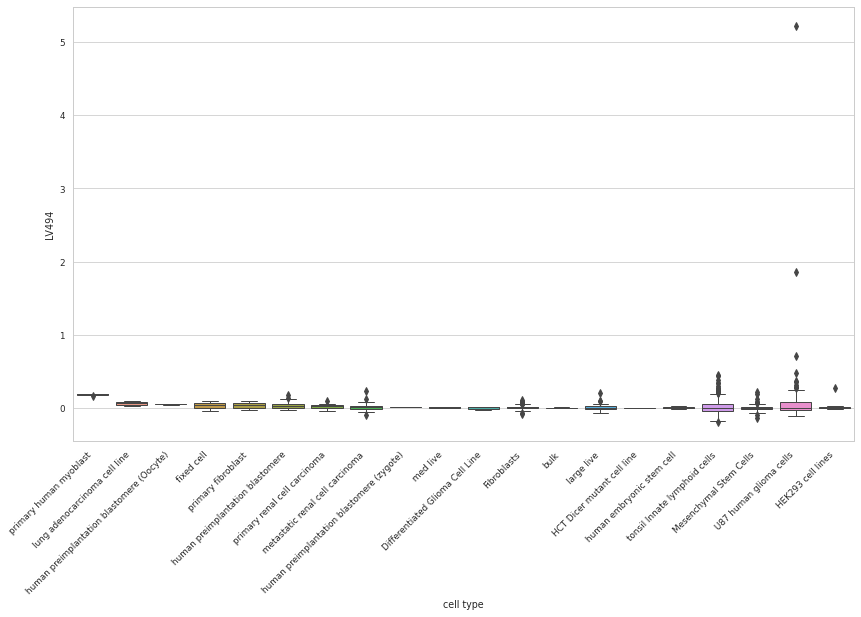

array(['SRP057196', 'SRP066834', 'SRP011546', 'SRP024268', 'SRP011422',
       'SRP042218', 'SRP002326', 'SRP049097', 'SRP047519', 'SRP003901'],
      dtype=object)

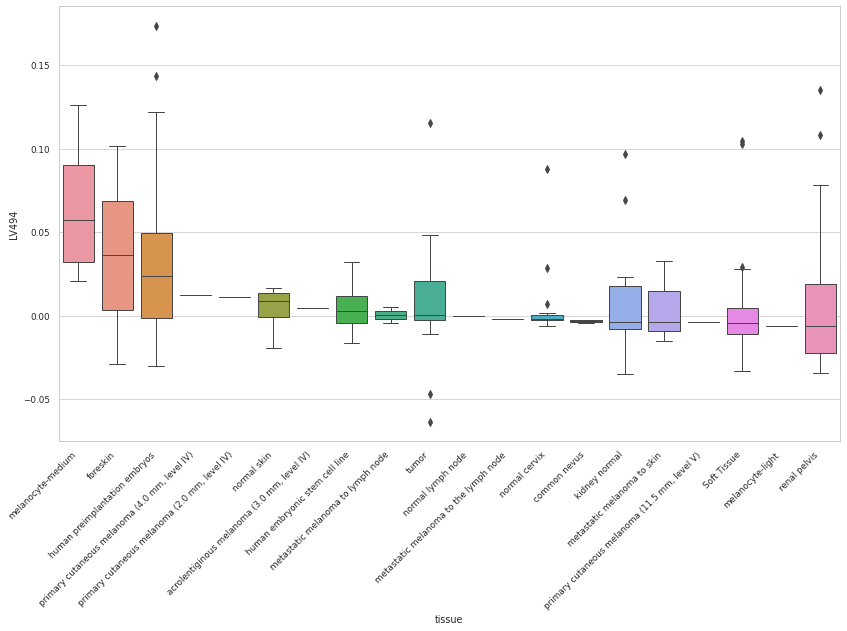

array(['SRP049097'], dtype=object)

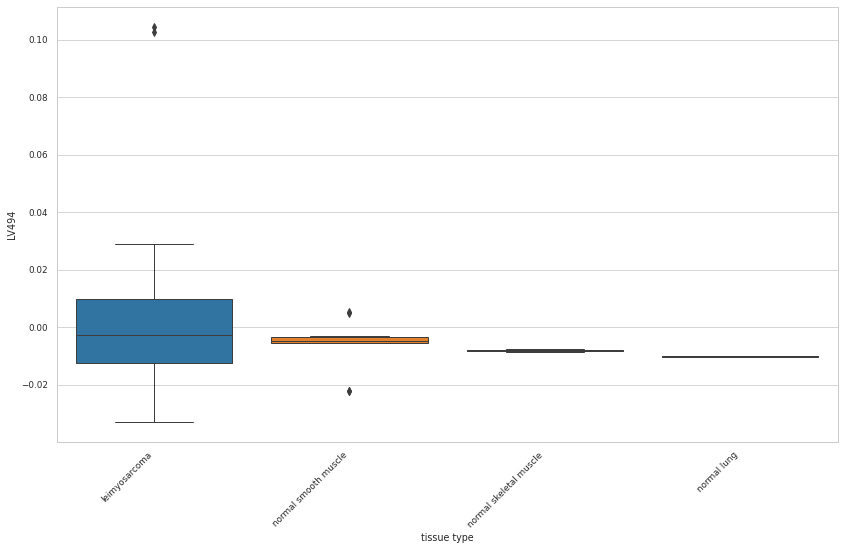

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP057196, SRP005279, SRP066834, SRP060416, SRP042161, SRP064464, SRP063840, SRP009247, SRP014213, SRP042218, SRP050499, SRP041751, SRP057205, SRP007338, SRP033135, SRP059035, SRP058773, SRP056696, SRP024268, SRP008145, SRP052057, SRP017411, SRP023111, SRP015976, SRP012461, SRP044610, SRP007461, SRP002184, SRP018525, SRP026537, SRP010279, SRP019994, SRP009266, SRP011974, SRP025982, SRP030617, SRP017575, SRP051102, SRP011546, SRP035417, SRP018837, SRP055153, SRP057248, SRP014428, SRP055513, SRP052491, SRP007947, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (46 != 48)
  warnings.warn(


''

22617_3532-Job_SOC_coding_Brokers                                                                                                    4.625622
22601_35323258-Job_coding_broker_financialinsurance_broker_foreign_exchange_dealer_shipmarine_broker_stockbroker_commodity_trader    4.404833
20003_1140888172-Treatmentmedication_code_mometasone                                                                                 4.066737
30110_raw-Platelet_distribution_width                                                                                                3.896723
20003_1140872112-Treatmentmedication_code_epanutin_25mg_capsule                                                                      3.764731
20111_13-Illnesses_of_siblings_Prostate_cancer                                                                                       3.665447
infectious mononucleosis AND epstein-barr virus infection                                                                            3.456891
20003_

''

gene_name     LV399 gene_band
0      SREBF2  7.375019   22q13.2
1       CDIPT  5.016911   16p11.2
2         DDO  4.565352      6q21
3        E2F6  4.442468    2p25.1
4      HDAC10  4.020094  22q13.33
5       SIN3B  3.394054  19p13.11
6  ST6GALNAC4  2.824486   9q34.11
7      ZNF317  2.500442   19p13.2
8      MRPL20  2.396211   1p36.33
9    SERPING1  1.910570   11q12.1

cell type    0.023879
tissue       0.002588
dtype: float64

array(['SRP055569', 'SRP057196', 'SRP005279', 'SRP060416', 'SRP042161',
       'SRP063840', 'SRP014213', 'SRP042218', 'SRP041751', 'SRP033135',
       'SRP059035', 'SRP017411', 'SRP015976', 'SRP012461', 'SRP044610',
       'SRP002184', 'SRP018525', 'SRP026537', 'SRP051102', 'SRP011546',
       'SRP035417', 'SRP055153', 'SRP014428', 'SRP052491', 'SRP007947'],
      dtype=object)

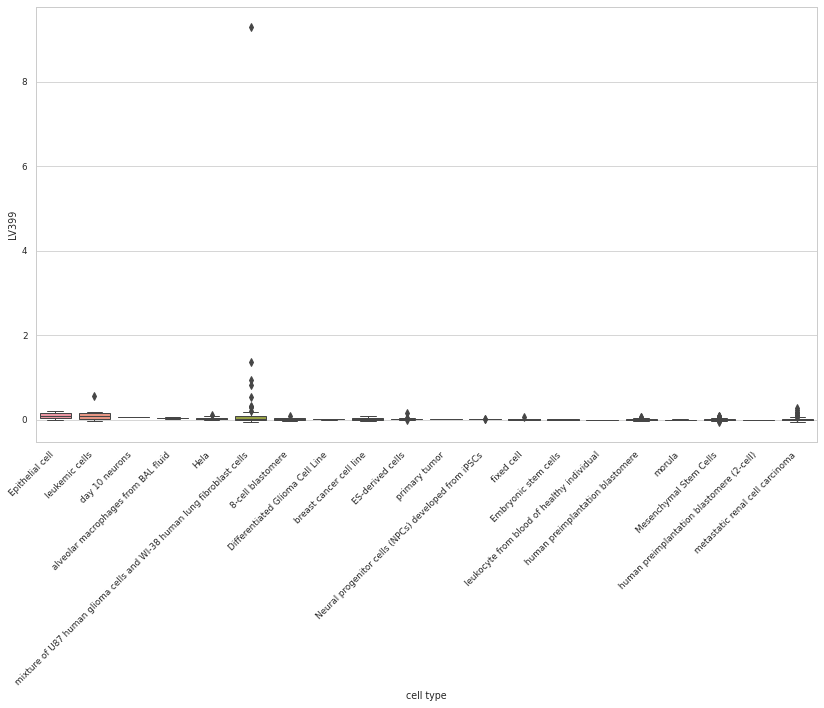

array(['SRP057196', 'SRP005279', 'SRP066834', 'SRP042218', 'SRP056696',
       'SRP024268', 'SRP019994', 'SRP017575', 'SRP011546', 'SRP014428',
       'SRP055513'], dtype=object)

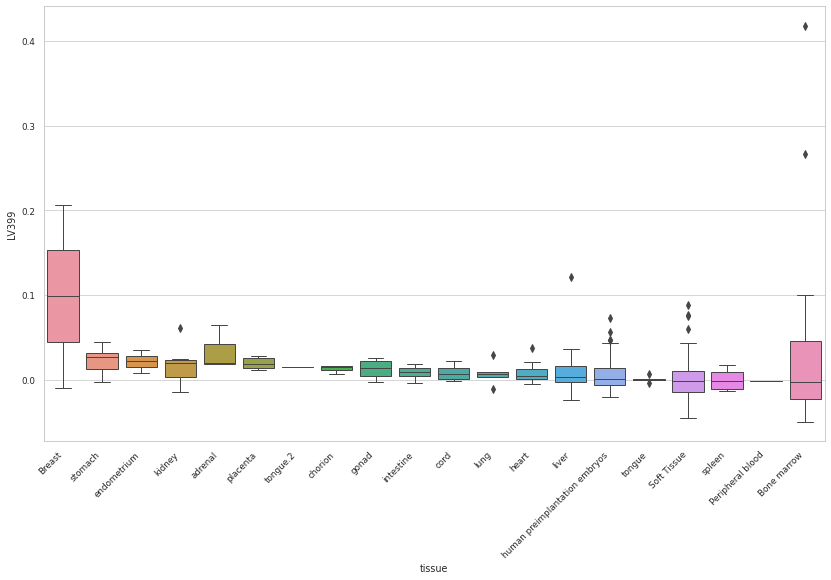

pathway LV index       AUC  \
887                 REACTOME_TRIGLYCERIDE_BIOSYNTHESIS      246  0.857366   
888                           KEGG_PYRUVATE_METABOLISM      246  0.817668   
889  REACTOME_FATTY_ACID_TRIACYLGLYCEROL_AND_KETONE...      246  0.890091   
890                         KEGG_PROPANOATE_METABOLISM      246  0.828621   
891     REACTOME_METABOLISM_OF_LIPIDS_AND_LIPOPROTEINS      246  0.671159   

          p-value           FDR  
887  5.437536e-05  6.515981e-04  
888  2.905798e-04  2.655850e-03  
889  2.762125e-18  3.971936e-16  
890  4.947481e-04  4.268686e-03  
891  3.216205e-10  1.137271e-08

SRP042186, SRP045545, SRP044756, SRP051211, SRP042620, SRP055749, SRP029899, SRP021478, SRP042086, SRP065812, SRP007412, SRP020470, SRP037778, SRP042161, SRP029889, SRP057196, SRP053101, SRP050499, SRP035988, SRP033135, SRP034712, SRP012461, SRP056041, SRP048674, SRP059643, SRP045364, SRP026042, SRP050971, SRP051705, SRP035387, SRP055512, SRP007461, SRP065451, SRP007338, SRP019936, SRP055569, SRP060355, SRP058571, SRP041377, SRP040998, SRP059379, SRP036133, SRP066834, SRP051772, SRP044056, SRP048669, SRP059066, SRP068078, SRP060359, SRP055475, SRP058771, SRP045639, SRP043085, SRP062177, SRP064464, SRP041597, SRP056696, SRP059035, SRP010678, SRP049593, SRP048536, SRP061566, SRP030617, SRP057804, SRP045156, SRP044171, SRP010644, SRP057448, SRP041751, SRP061701, SRP033131, SRP041387, SRP063834, SRP020493, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (72 != 74)
  warnings.warn(


''

30100_raw-Mean_platelet_thrombocyte_volume                                                                              6.632557
MAGNETIC_CH2.DB.ratio                                                                                                   6.584225
1747_2-Hair_colour_natural_before_greying_Red                                                                           6.287111
3143_raw-Ankle_spacing_width                                                                                            5.119107
hypercholesterolemia                                                                                                    4.991051
4119_raw-Ankle_spacing_width_right                                                                                      4.822150
20095_3-Size_of_white_wine_glass_drunk_large_250ml                                                                      4.490390
1727-Ease_of_skin_tanning                                                                        

''

gene_name     LV246 gene_band
0       SCD  6.672060  10q24.31
1     ACSS2  6.258514  20q11.22
2      GPAM  5.714077   10q25.2
3     DGAT2  4.738347   11q13.5
4      ACLY  3.708678   17q21.2
5      GPD1  3.346001  12q13.12
6       MVD  3.320598   16q24.2
7      FASN  2.915241   17q25.3
8       LPL  2.858278    8p21.3
9     ACSL1  2.682199    4q35.1

cell type      0.028771
tissue         0.013640
tissue type    0.008186
dtype: float64

array(['SRP042186', 'SRP045545', 'SRP044756', 'SRP051211', 'SRP042161',
       'SRP057196', 'SRP033135', 'SRP012461', 'SRP048674', 'SRP045364',
       'SRP035387', 'SRP055512', 'SRP065451', 'SRP055569', 'SRP058571',
       'SRP059379', 'SRP036133', 'SRP051772', 'SRP044056', 'SRP048669',
       'SRP059066', 'SRP045639', 'SRP043085', 'SRP062177', 'SRP059035',
       'SRP010678', 'SRP061566', 'SRP057804', 'SRP010644', 'SRP041751',
       'SRP063834', 'SRP020493'], dtype=object)

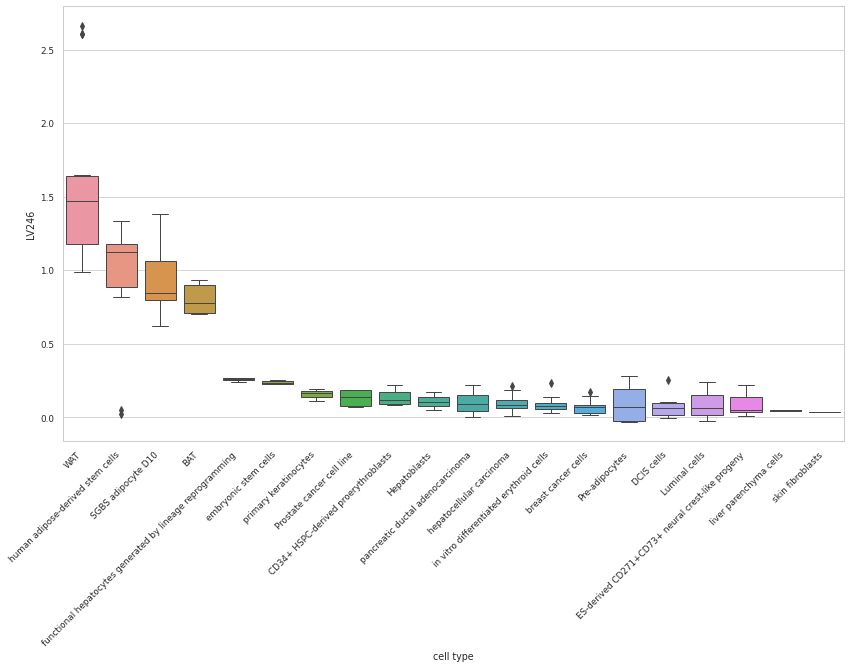

array(['SRP042620', 'SRP055749', 'SRP029899', 'SRP021478', 'SRP042086',
       'SRP029889', 'SRP057196', 'SRP056041', 'SRP026042', 'SRP060355',
       'SRP066834', 'SRP044056', 'SRP043085', 'SRP041597', 'SRP056696',
       'SRP041387'], dtype=object)

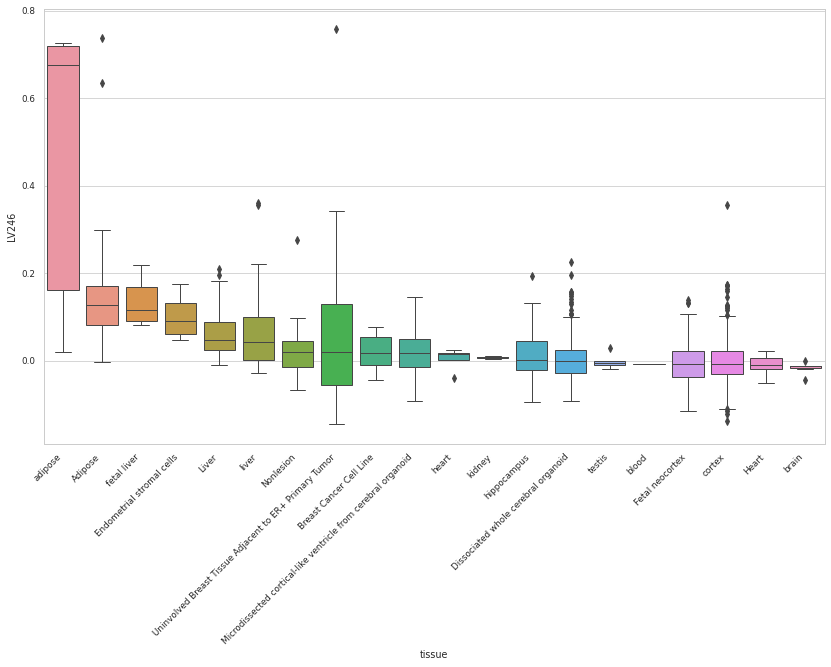

array(['SRP065812', 'SRP035988', 'SRP050971', 'SRP019936'], dtype=object)

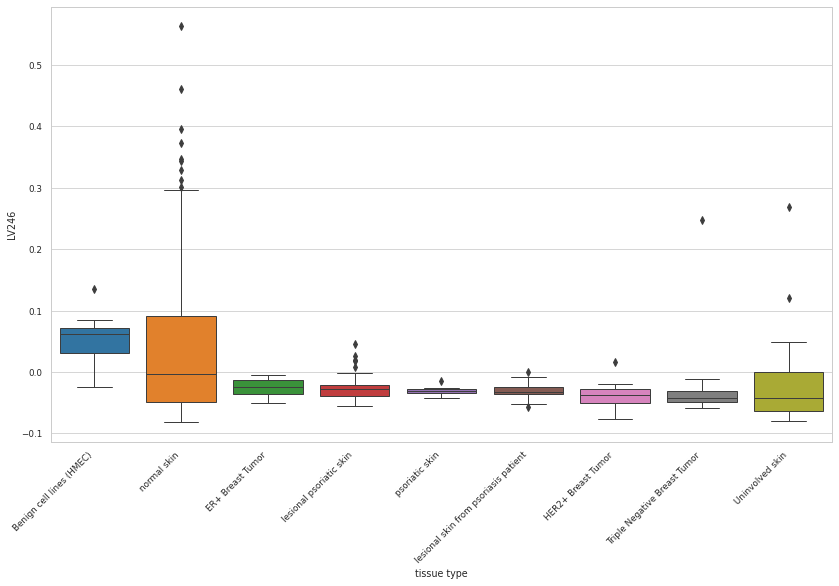

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP010350, SRP013402, SRP055569, SRP002326, SRP034953, SRP060416, SRP017575, SRP013363, SRP026315, SRP009247, SRP050892, SRP036821, SRP045869, SRP006575, SRP057196, SRP050499, SRP017777, SRP005279, SRP004637, SRP013473, SRP007596, SRP010054, SRP042161, SRP014809, SRP032165, SRP061241, SRP031507, SRP014670, SRP023262, SRP012056, SRP006719, SRP007508, SRP032775, SRP009266, SRP012461, SRP045573, SRP035387, SRP007947, SRP020646, SRP006769, SRP017411, SRP013725, SRP009862, SRP033135, SRP056296, SRP040966, SRP033276, SRP066834, SRP002184, SRP049591, SRP019994, SRP058773, SRP007359, SRP041130, SRP044956, SRP009276, SRP013456, SRP015449, SRP014790, SRP064464, SRP003611, SRP014867, SRP020493, SRP058351, SRP005177, SRP060715, SRP018719, SRP043960, SRP014146, SRP050331, SRP051102, SRP043962, SRP048536, SRP055513, SRP038963, SRP035641, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (74 != 76)
  warnings.warn(


''

30050_raw-Mean_corpuscular_haemoglobin                              4.618012
22601_53142539-Job_coding_plumber                                   4.430351
30060_raw-Mean_corpuscular_haemoglobin_concentration                4.299451
30040_raw-Mean_corpuscular_volume                                   3.799749
3143_raw-Ankle_spacing_width                                        3.751154
20003_1140865872-Treatmentmedication_code_magnesium_citrate         3.590400
20003_1140873476-Treatmentmedication_code_tetralysal_300_capsule    3.539827
erythrocyte count                                                   3.513683
celiac disease                                                      3.512347
1717-Skin_colour                                                    3.379336
30010_raw-Red_blood_cell_erythrocyte_count                          3.334159
1747_4-Hair_colour_natural_before_greying_Dark_brown                3.247769
1747_5-Hair_colour_natural_before_greying_Black                     3.148442

''

gene_name     LV120 gene_band
0  PPP1R13B  5.587106  14q32.33
1    VPS37C  5.562629   11q12.2
2     SMPD1  4.883180   11p15.4
3      NFIX  4.767822  19p13.13
4    DHRS13  4.190671   17q11.2
5     PFDN6  3.611752   6p21.32
6     NEDD8  3.058782     14q12
7      CBX4  3.037968   17q25.3
8    TM7SF2  2.648933   11q13.1
9   SUPT4H1  2.639966     17q22

tissue subtype    0.003973
cell type         0.003388
tissue            0.002163
tissue type       0.000734
dtype: float64

array(['SRP036821'], dtype=object)

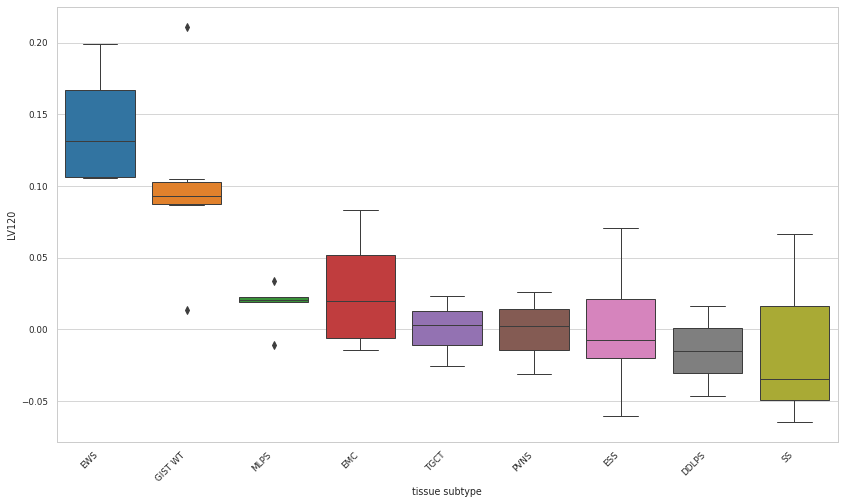

array(['SRP013402', 'SRP055569', 'SRP060416', 'SRP026315', 'SRP006575',
       'SRP057196', 'SRP005279', 'SRP013473', 'SRP007596', 'SRP042161',
       'SRP031507', 'SRP014670', 'SRP007508', 'SRP012461', 'SRP035387',
       'SRP007947', 'SRP017411', 'SRP033135', 'SRP040966', 'SRP002184',
       'SRP009276', 'SRP020493', 'SRP060715', 'SRP051102', 'SRP038963',
       'SRP035641'], dtype=object)

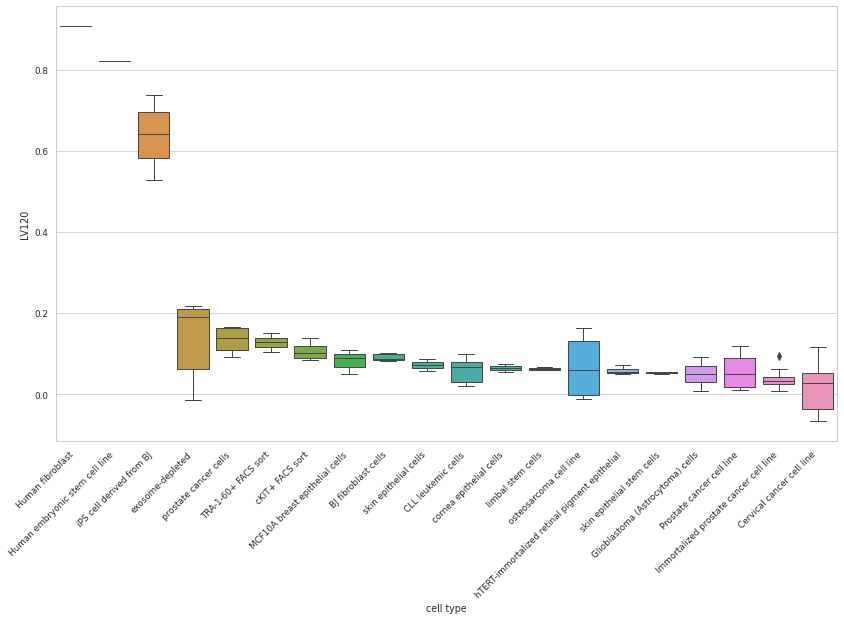

array(['SRP002326', 'SRP034953', 'SRP017575', 'SRP036821', 'SRP045869',
       'SRP006575', 'SRP057196', 'SRP017777', 'SRP005279', 'SRP004637',
       'SRP032165', 'SRP061241', 'SRP014670', 'SRP023262', 'SRP032775',
       'SRP045573', 'SRP006769', 'SRP033276', 'SRP066834', 'SRP019994',
       'SRP007359', 'SRP044956', 'SRP058351', 'SRP014146', 'SRP055513'],
      dtype=object)

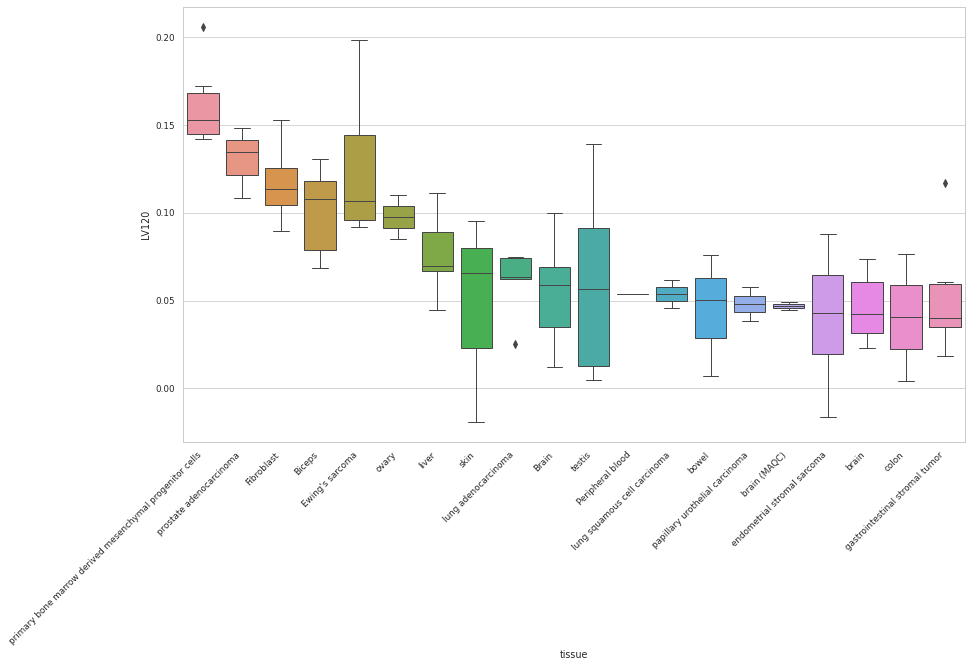

array(['SRP044956'], dtype=object)

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:430: UserWarning: Single value for tissue type: 0.04826198731768353
  warnings.warn(f"Single value for {imp_f}: {cat_order}")


Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP010350, SRP049591, SRP007596, SRP057196, SRP028282, SRP060416, SRP055569, SRP035387, SRP040679, SRP004637, SRP013473, SRP065202, SRP009276, SRP015449, SRP010054, SRP006719, SRP034953, SRP009266, SRP066834, SRP019936, SRP058120, SRP014809, SRP059775, SRP051102, SRP045869, SRP036821, SRP006575, SRP017631, SRP060708, SRP040966, SRP023262, SRP013725, SRP061241, SRP044956, SRP029334, SRP027258, SRP019994, SRP042620, SRP052950, SRP058300, SRP017411, SRP064481, SRP026315, SRP022920, SRP012461, SRP014146, SRP056696, SRP050365, SRP060359, SRP033276, SRP033119, SRP067214, SRP036053, SRP033135, SRP042161, SRP050499, SRP061566, SRP055153, SRP059948, SRP044608, SRP005177, SRP051583, SRP040998, SRP014428, SRP009862, SRP011546, SRP059950, SRP050061, SRP006731, SRP026537, SRP048536, SRP055810, SRP064317, SRP061329, SRP052978, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (71 != 75)
  warnings.warn(


''

1747_5-Hair_colour_natural_before_greying_Black                                                                                                                             7.192560
1747_3-Hair_colour_natural_before_greying_Light_brown                                                                                                                       5.494900
1747_4-Hair_colour_natural_before_greying_Dark_brown                                                                                                                        5.155332
2217_raw-Age_started_wearing_glasses_or_contact_lenses                                                                                                                      4.600855
30070_raw-Red_blood_cell_erythrocyte_distribution_width                                                                                                                     3.831634
20003_1140852976-Treatmentmedication_code_multivitamins                                        

''

gene_name     LV122 gene_band
0  SLC25A10  3.969911   17q25.3
1    TM7SF2  3.946746   11q13.1
2     PHGDH  3.404534      1p12
3  SELENBP1  2.645012    1q21.3
4     THOC2  2.325820       NaN
5    DHRS13  2.282921   17q11.2
6      HSF1  2.150138    8q24.3
7     AMACR  1.996637    5p13.2
8    MRPL12  1.739917   17q25.3
9     STUB1  1.666376   16p13.3

tissue subtype    0.010374
tissue type       0.006186
cell line/type    0.005616
tissue            0.004972
cell type         0.004771
dtype: float64

array(['SRP036821'], dtype=object)

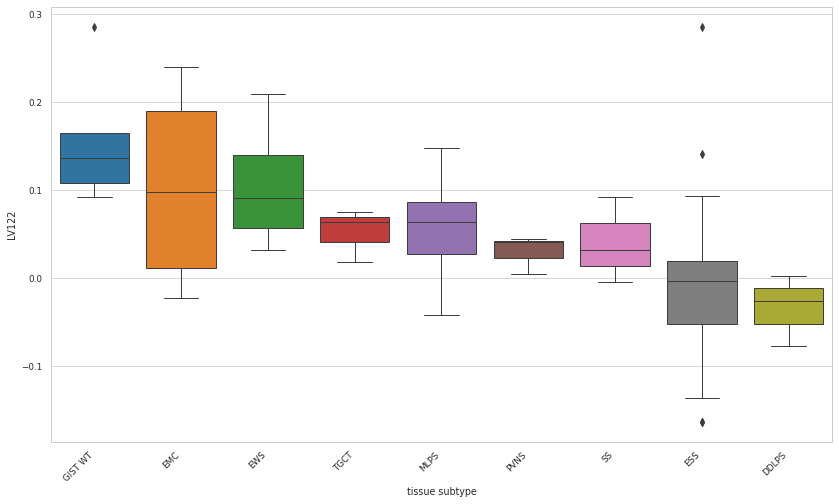

array(['SRP019936', 'SRP044956'], dtype=object)

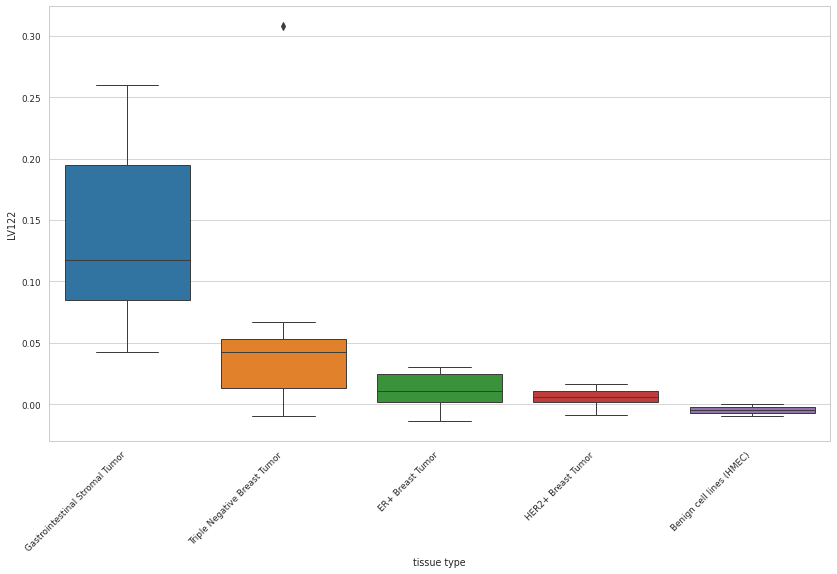

array(['SRP058120'], dtype=object)

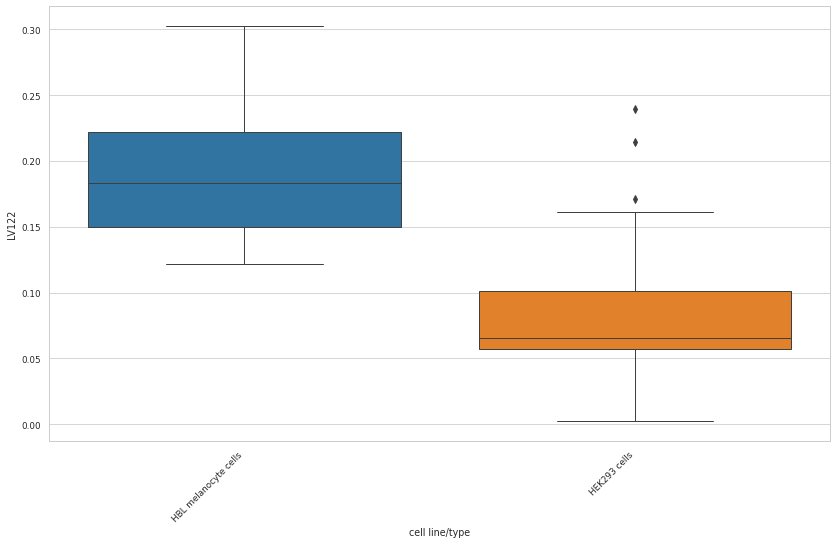

array(['SRP057196', 'SRP040679', 'SRP004637', 'SRP034953', 'SRP066834',
       'SRP045869', 'SRP036821', 'SRP006575', 'SRP023262', 'SRP061241',
       'SRP044956', 'SRP019994', 'SRP042620', 'SRP052950', 'SRP014146',
       'SRP056696', 'SRP033276', 'SRP036053', 'SRP014428', 'SRP011546',
       'SRP006731', 'SRP052978'], dtype=object)

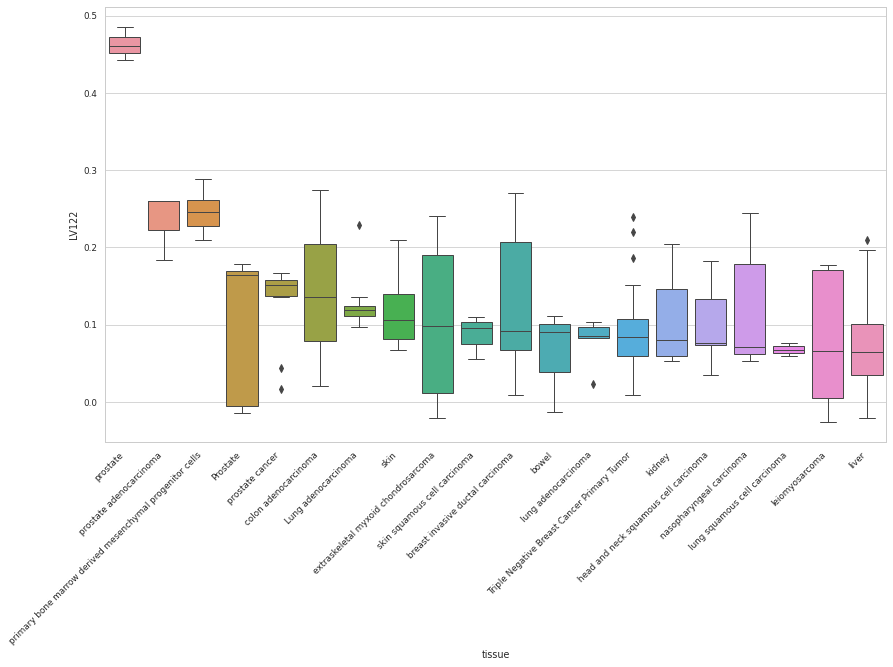

array(['SRP007596', 'SRP057196', 'SRP060416', 'SRP055569', 'SRP035387',
       'SRP040679', 'SRP013473', 'SRP065202', 'SRP009276', 'SRP051102',
       'SRP006575', 'SRP060708', 'SRP040966', 'SRP027258', 'SRP017411',
       'SRP026315', 'SRP022920', 'SRP012461', 'SRP033135', 'SRP042161',
       'SRP061566', 'SRP055153', 'SRP044608', 'SRP014428', 'SRP011546',
       'SRP006731', 'SRP026537'], dtype=object)

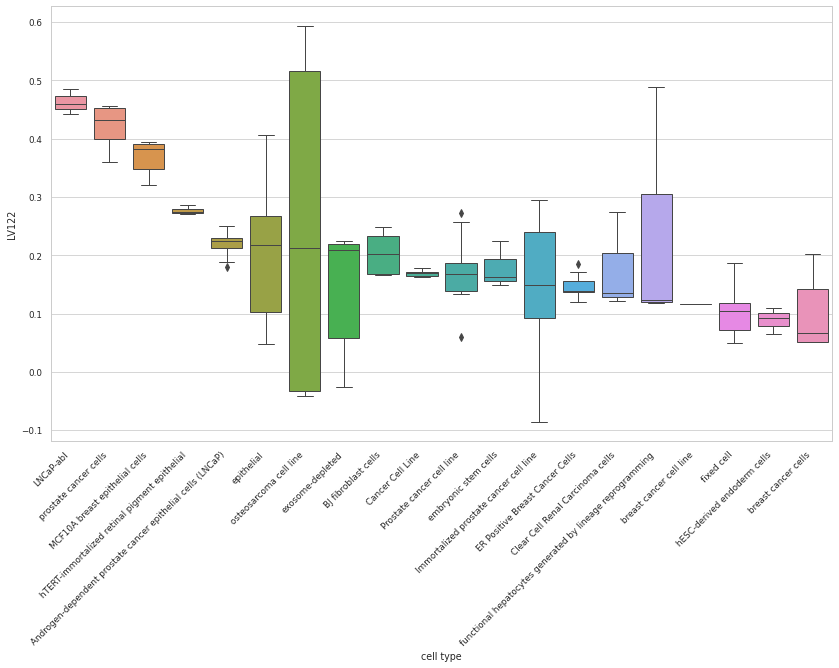

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP033135, SRP060416, SRP042161, SRP057196, SRP005279, SRP066834, SRP031507, SRP055153, SRP002326, SRP049500, SRP018853, SRP029334, SRP003726, SRP035391, SRP057500, SRP059379, SRP007947, SRP058773, SRP029889, SRP018403, SRP009266, SRP003754, SRP064464, SRP014867, SRP050992, SRP050499, SRP040966, SRP012461, SRP014591, SRP033466, SRP015670, SRP032279, SRP018719, SRP008145, SRP051000, SRP059170, SRP055513, SRP018525, SRP066729, SRP028301, SRP058667, SRP034543, SRP044206, SRP030617, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (42 != 45)
  warnings.warn(


''

22601_62142638-Job_coding_air_travel_assistant_cabinflight_attendant_air_hostess_air_purser_air_steward_cabin_crew_passenger_services_agent_checkin_staff    3.207583
100170-Fizzy_drink_intake                                                                                                                                    3.122570
5986_raw-ECG_phase_time                                                                                                                                      3.093847
22617_1132-Job_SOC_coding_Marketing_and_sales_managers                                                                                                       3.071945
6143_2-Transport_type_for_commuting_to_job_workplace_Walk                                                                                                    3.055377
20003_1140888502-Treatmentmedication_code_amiodarone                                                                                                         3.050596
2260

''

gene_name     LV489 gene_band
0      SLA2  5.355442  20q11.23
1   SH3GLB1  4.558310    1p22.3
2     ZNF45  3.612552  19q13.31
3    MRPL20  3.145382   1p36.33
4     VDAC1  3.006728    5q31.1
5    DNAJC8  2.968633    1p35.3
6      PDK3  2.948798       NaN
7    ACTR1A  2.791602  10q24.32
8    ZNF445  2.146666   3p21.31
9    AKT1S1  2.056162  19q13.33

cell type         0.018950
tissue            0.002094
tissue subtype    0.000699
tissue type       0.000699
dtype: float64

array(['SRP055569', 'SRP033135', 'SRP060416', 'SRP042161', 'SRP057196',
       'SRP005279', 'SRP031507', 'SRP055153', 'SRP049500', 'SRP003726',
       'SRP057500', 'SRP059379', 'SRP007947', 'SRP050992', 'SRP040966',
       'SRP012461', 'SRP015670', 'SRP051000', 'SRP059170', 'SRP018525',
       'SRP034543', 'SRP044206'], dtype=object)

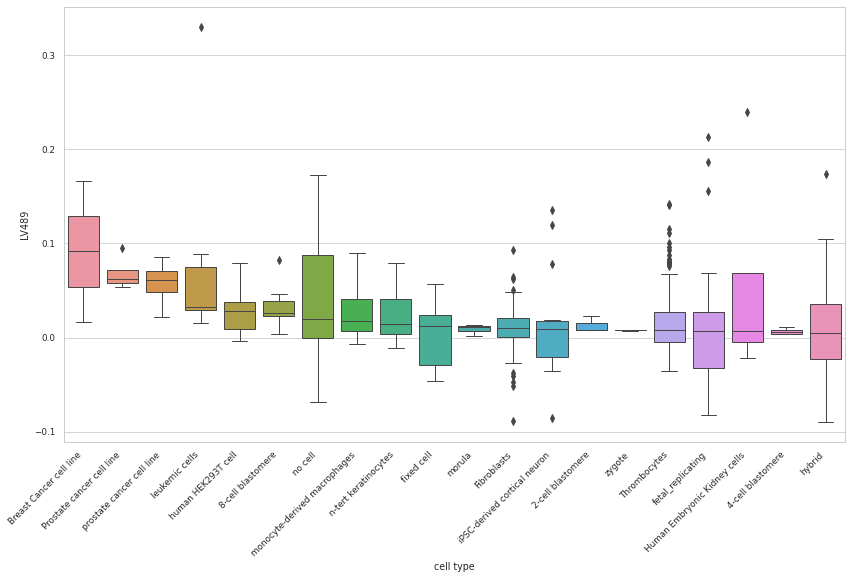

array(['SRP057196', 'SRP005279', 'SRP066834', 'SRP002326', 'SRP003726',
       'SRP057500', 'SRP029889', 'SRP032279', 'SRP059170', 'SRP055513',
       'SRP066729'], dtype=object)

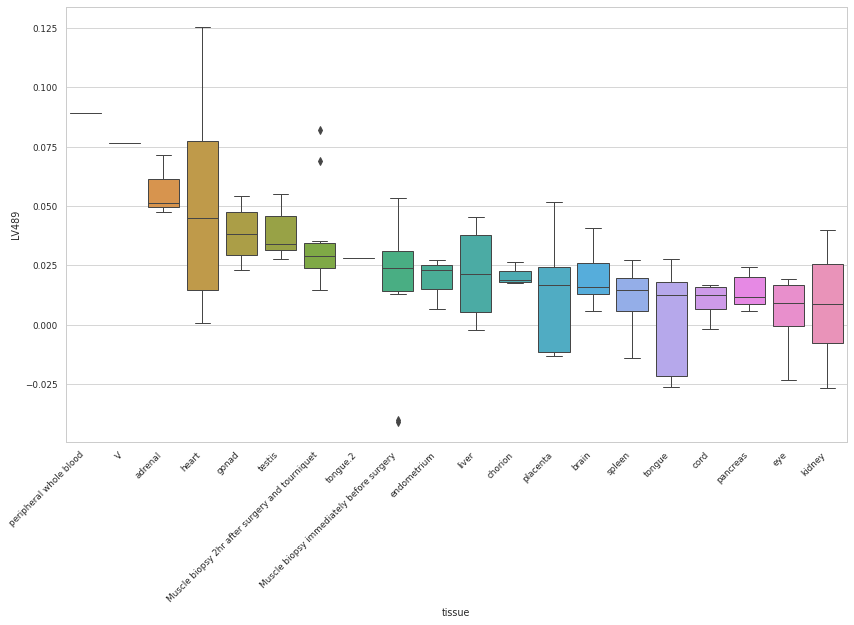

array(['SRP058667'], dtype=object)

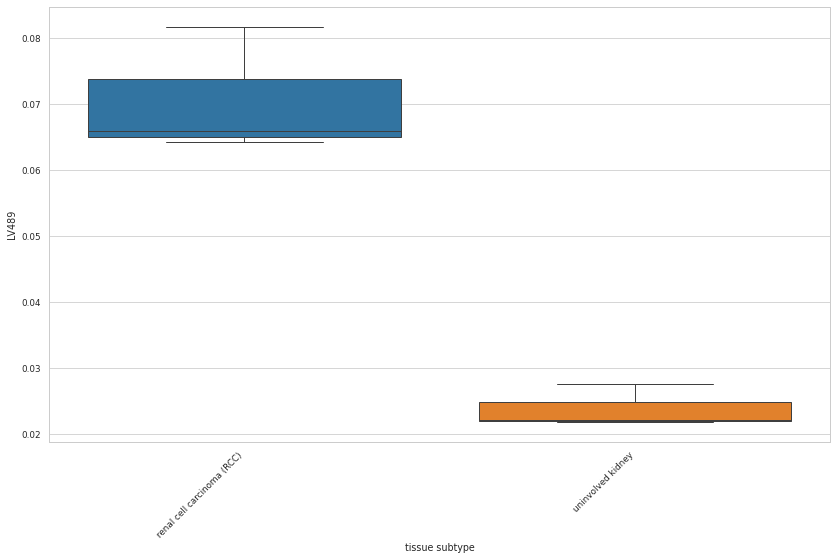

array(['SRP058667'], dtype=object)

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:430: UserWarning: Single value for tissue type: 0.045879158209866426
  warnings.warn(f"Single value for {imp_f}: {cat_order}")


Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP006717, SRP055569, SRP060416, SRP024268, SRP065219, SRP066834, SRP056733, SRP058237, SRP026620, SRP002487, SRP048759, SRP012461, SRP066729, SRP057196, SRP042161, SRP033369, SRP031507, SRP059695, SRP045352, SRP007359, SRP058773, SRP009266, SRP058667, SRP068523, SRP045500, SRP063059, SRP050499, SRP059775, SRP033135, SRP017138, SRP056295, SRP055513, SRP051170, SRP014867, SRP005177, SRP058856, SRP038101, SRP006474, SRP057745, SRP018838, SRP056074, SRP063840, SRP023270, SRP057852, SRP026052, SRP028594, SRP055153, SRP013363, SRP057244, SRP018717, SRP059531, SRP018719, SRP018718, SRP026315, SRP018716, SRP045441, SRP018571, SRP007498, SRP040278, SRP022925, SRP028301, SRP050954, SRP064458, SRP056197, SRP045711, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (64 != 65)
  warnings.warn(


''

4100_raw-Ankle_spacing_width_left                                                                                 6.109098
4119_raw-Ankle_spacing_width_right                                                                                6.089153
3143_raw-Ankle_spacing_width                                                                                      5.651824
6153_2-Medication_for_cholesterol_blood_pressure_diabetes_or_take_exogenous_hormones_Blood_pressure_medication    5.011297
20003_1141194794-Treatmentmedication_code_bendroflumethiazide                                                     4.619194
3147_raw-Heel_quantitative_ultrasound_index_QUI_direct_entry                                                      4.414986
78_raw-Heel_bone_mineral_density_BMD_Tscore_automated                                                             4.414598
3144_raw-Heel_Broadband_ultrasound_attenuation_direct_entry                                                       4.392482
3148_raw-Heel_bo

''

gene_name     LV515 gene_band
0     ABCB7  8.403314       NaN
1    HOXA10  8.382503    7p15.2
2       AK2  6.575439    1p35.1
3     PTGS2  2.292719    1q31.1
4     RPS21  1.848029  20q13.33
5      TP53  1.435811   17p13.1
6      RHOA  1.071688   3p21.31
7   RPS6KA3  1.061970       NaN
8     HOXA5  1.034511    7p15.2
9     HOXA7  0.845820    7p15.2

cell type         0.020192
tissue            0.000516
tissue subtype    0.000437
tissue type       0.000437
dtype: float64

array(['SRP006717', 'SRP055569', 'SRP060416', 'SRP058237', 'SRP026620',
       'SRP048759', 'SRP012461', 'SRP057196', 'SRP042161', 'SRP031507',
       'SRP059695', 'SRP045352', 'SRP068523', 'SRP063059', 'SRP033135',
       'SRP056295', 'SRP063840', 'SRP057852', 'SRP055153', 'SRP059531',
       'SRP026315', 'SRP045441', 'SRP040278', 'SRP022925', 'SRP050954',
       'SRP056197', 'SRP045711'], dtype=object)

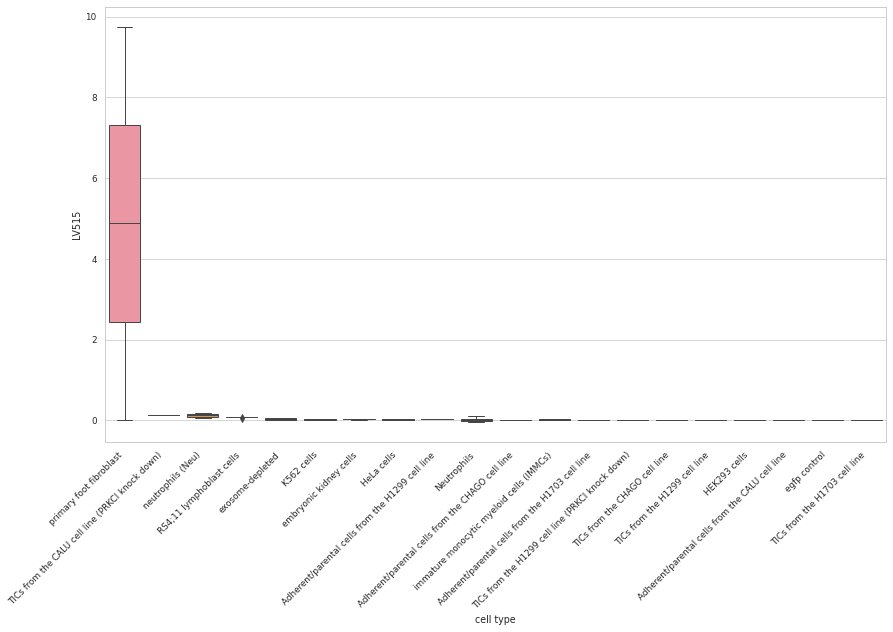

array(['SRP024268', 'SRP065219', 'SRP066834', 'SRP058237', 'SRP048759',
       'SRP066729', 'SRP057196', 'SRP007359', 'SRP056295', 'SRP055513',
       'SRP028594', 'SRP056197'], dtype=object)

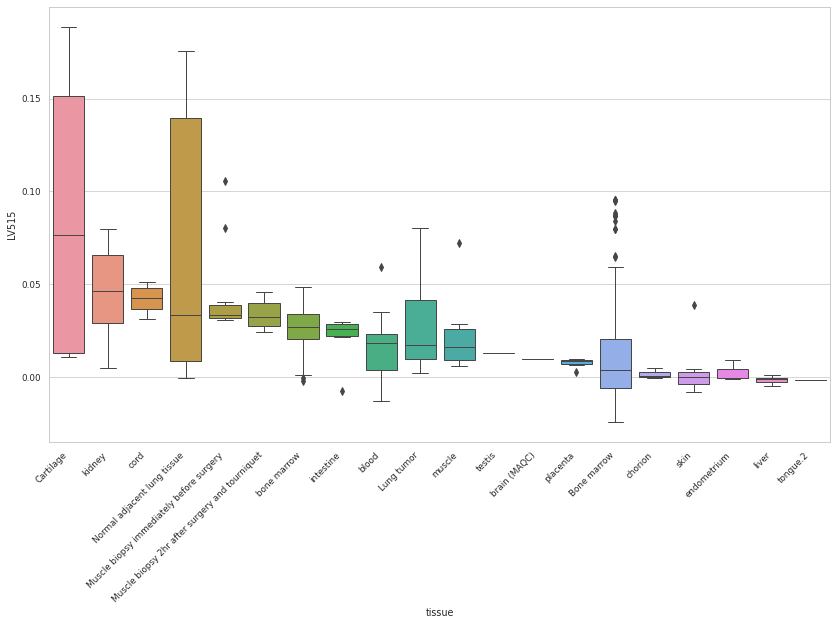

array(['SRP058667'], dtype=object)

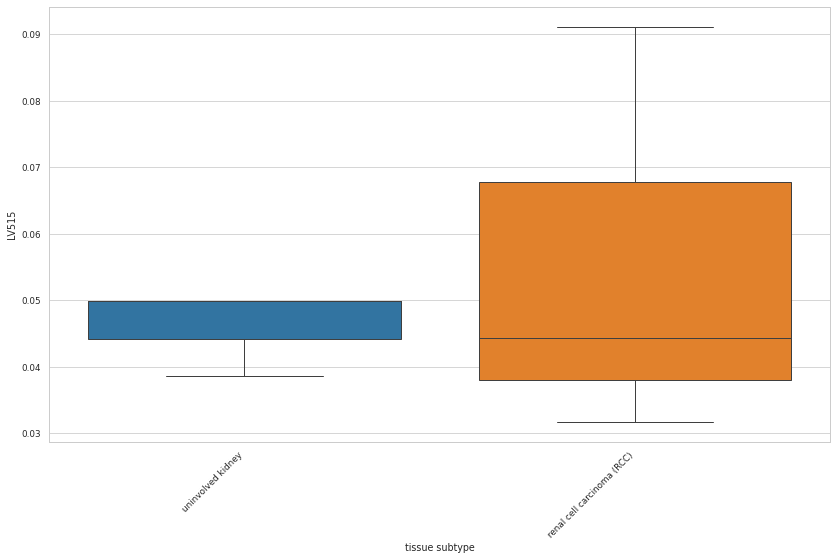

array(['SRP058667'], dtype=object)

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:430: UserWarning: Single value for tissue type: 0.04709790434632514
  warnings.warn(f"Single value for {imp_f}: {cat_order}")


Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP057196, SRP066834, SRP015013, SRP050892, SRP060416, SRP050499, SRP042161, SRP058773, SRP009862, SRP033135, SRP059379, SRP066729, SRP002184, SRP006575, SRP033276, SRP017411, SRP015449, SRP059775, SRP007947, SRP063840, SRP065202, SRP024268, SRP055153, SRP019994, SRP018838, SRP050992, SRP032165, SRP040998, SRP010166, SRP059170, SRP013402, SRP062177, SRP044925, SRP018853, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (33 != 35)
  warnings.warn(


''

2877_1-Type_of_tobacco_previously_smoked_Manufactured_cigarettes                           3.765250
3581_raw-Age_at_menopause_last_menstrual_period                                            3.667146
20003_1140879464-Treatmentmedication_code_loperamide                                       3.457969
adenomatous colon polyp                                                                    3.278068
M13_SOFTOVERUSE-Soft_tissue_disorders_related_to_use_overuse_and_pressure                  3.254143
20003_1140909788-Treatmentmedication_code_sodium_cromoglicate                              3.216120
uterine prolapse                                                                           3.166054
22617_3567-Job_SOC_coding_Occupational_hygienists_and_safety_officers_health_and_safety    3.136557
40001_C159-Underlying_primary_cause_of_death_ICD10_C159_Oesophagus_unspecified             3.060515
burn                                                                                       3.060162


''

gene_name     LV783 gene_band
0   RAP1GDS1  5.584923      4q23
1      RRAGC  5.506768    1p34.3
2      MGRN1  3.009022   16p13.3
3      G6PC3  2.746351  17q21.31
4     S100A2  2.377933    1q21.3
5     MRPS30  1.925284      5p12
6      AZIN1  1.590938    8q22.3
7     TROVE2  1.471956    1q31.2
8      VPS28  1.451518    8q24.3
9  HNRNPA2B1  1.427294    7p15.2

cell type    0.015234
tissue       0.005101
dtype: float64

array(['SRP055569', 'SRP057196', 'SRP060416', 'SRP042161', 'SRP033135',
       'SRP059379', 'SRP002184', 'SRP006575', 'SRP017411', 'SRP007947',
       'SRP063840', 'SRP065202', 'SRP055153', 'SRP050992', 'SRP010166',
       'SRP059170', 'SRP013402', 'SRP062177', 'SRP044925'], dtype=object)

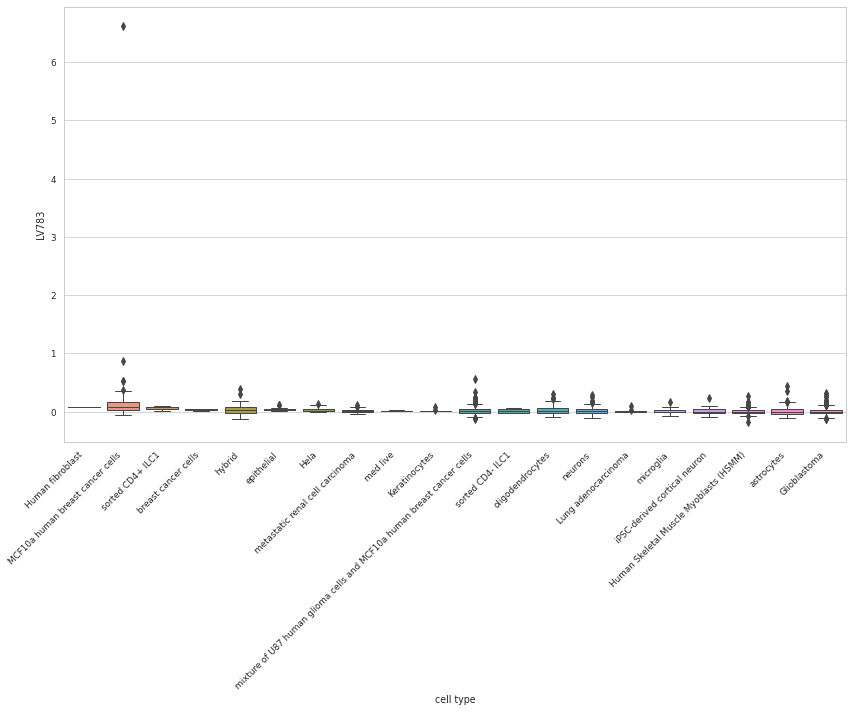

array(['SRP057196', 'SRP066834', 'SRP066729', 'SRP006575', 'SRP033276',
       'SRP024268', 'SRP019994', 'SRP032165', 'SRP059170'], dtype=object)

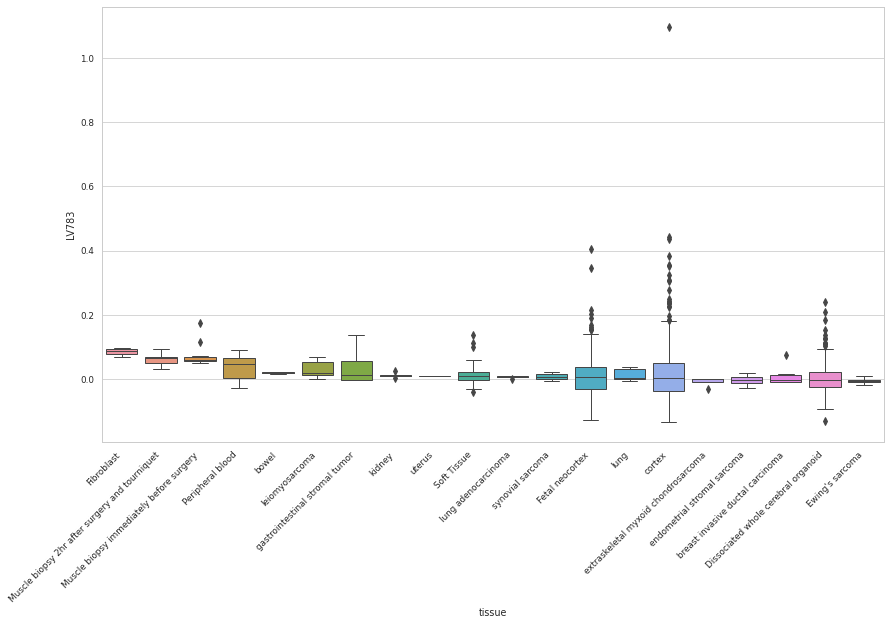

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP012461, SRP057196, SRP055569, SRP060416, SRP066834, SRP019994, SRP042161, SRP003901, SRP043388, SRP050499, SRP033135, SRP044956, SRP063840, SRP058773, SRP024244, SRP002326, SRP055153, SRP059775, SRP029334, SRP065763, SRP009266, SRP042218, SRP013239, SRP064464, SRP007947, SRP030617, SRP014542, SRP033116, SRP003754, SRP018838, SRP059035, SRP046749, SRP008145, SRP050992, SRP009862, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (31 != 35)
  warnings.warn(


''

104450-Apple_intake                                                               4.227946
20003_1140910512-Treatmentmedication_code_ismo_isosorbide_mononitrate             3.488819
bacterial pneumonia                                                               3.475437
C_LYMPHOID_LEUKAEMIA-Lymphoid_leukaemia                                           3.291831
22601_42123299-Job_coding_legal_secretary                                         3.240334
1090-Time_spent_driving                                                           3.222114
20090_386-Type_of_fatoil_used_in_cooking_Normal_fat_soya_margarine                3.192964
20546_1-Substances_taken_for_depression_Unprescribed_medication_more_than_once    3.184841
M13_RHEUMATISM-Rheumatism_unspecified                                             3.179450
lateral epicondylitis                                                             3.162600
20003_1140888172-Treatmentmedication_code_mometasone                              3.122533

''

gene_name     LV768 gene_band
0       PIGP  6.594609  21q22.13
1     ZNF611  6.003346  19q13.41
2      MGST3  4.679373    1q24.1
3     ZNF432  4.442268  19q13.41
4       HES1  4.309140      3q29
5  C1GALT1C1  3.663035       NaN
6     TOMM34  3.391977  20q13.12
7     CHMP2B  3.355990    3p11.2
8       UMPS  3.150378    3q21.2
9      PSMB3  2.784365     17q12

cell type      0.027855
tissue         0.002318
tissue type    0.001195
dtype: float64

array(['SRP012461', 'SRP057196', 'SRP055569', 'SRP060416', 'SRP042161',
       'SRP033135', 'SRP063840', 'SRP024244', 'SRP055153', 'SRP042218',
       'SRP007947', 'SRP059035', 'SRP046749', 'SRP050992'], dtype=object)

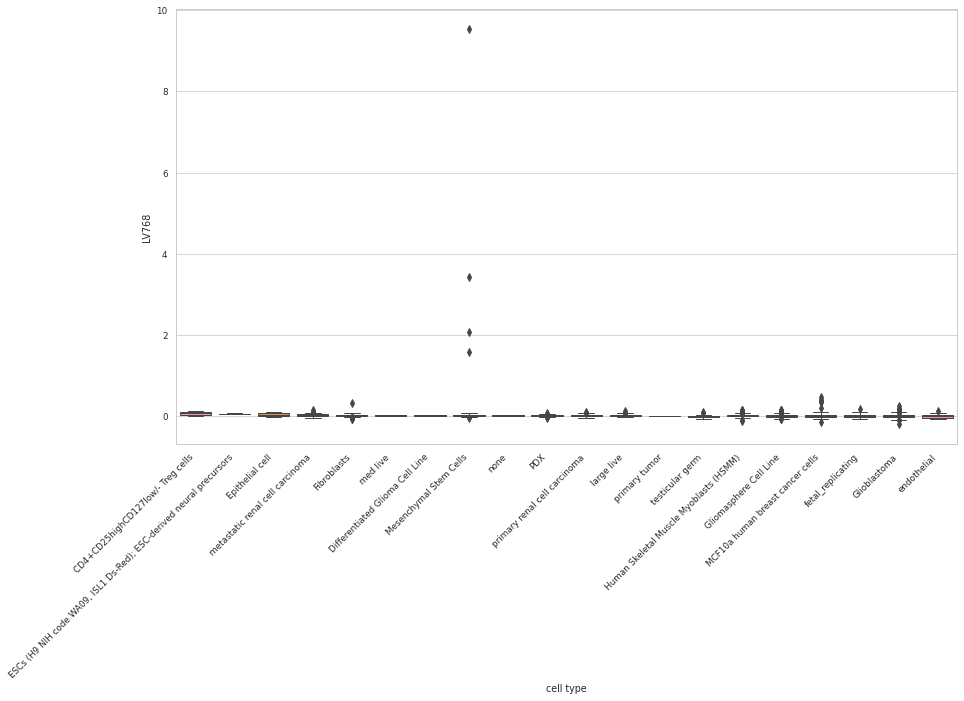

array(['SRP057196', 'SRP066834', 'SRP019994', 'SRP003901', 'SRP044956',
       'SRP002326', 'SRP042218'], dtype=object)

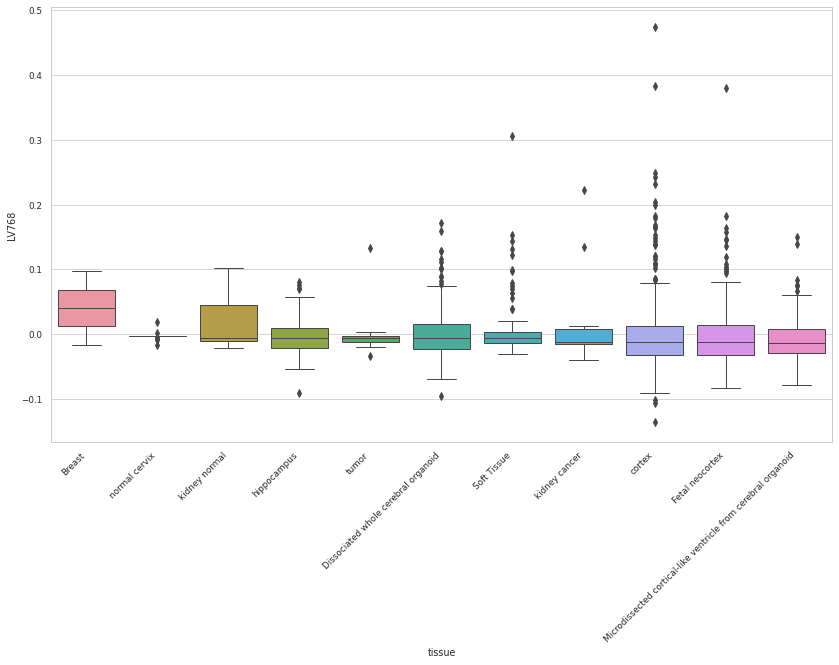

array(['SRP044956'], dtype=object)

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:430: UserWarning: Single value for tissue type: 0.09813300357754141
  warnings.warn(f"Single value for {imp_f}: {cat_order}")


Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP012461, SRP055569, SRP057196, SRP007947, SRP042161, SRP015976, SRP064464, SRP060416, SRP014428, SRP008145, SRP066834, SRP033135, SRP055153, SRP019994, SRP045869, SRP050499, SRP009276, SRP059170, SRP034953, SRP058773, SRP036053, SRP002326, SRP005279, SRP050374, SRP007481, SRP010350, SRP038863, SRP003754, SRP063840, SRP018838, SRP007596, SRP018218, SRP052740, SRP047082, SRP057244, SRP056049, SRP006575, SRP057205, SRP047363, SRP002184, SRP026537, SRP041718, SRP026315, SRP011578, SRP007498, SRP056295, SRP009266, SRP045154, SRP023262, SRP059775, SRP015853, SRP041846, SRP042597, SRP017411, SRP015013, SRP014624, SRP045611, SRP007461, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (55 != 58)
  warnings.warn(


''

eosinophil count                                                                                        6.067290
30150-Eosinophill_count                                                                                 6.062289
sum of eosinophil and basophil counts                                                                   5.487467
30210_raw-Eosinophill_percentage                                                                        4.604803
psoriasis                                                                                               4.024086
20003_1141184726-Treatmentmedication_code_xalacom_000505_eye_drops                                      4.018105
46_raw-Hand_grip_strength_left                                                                          3.986128
47_raw-Hand_grip_strength_right                                                                         3.769532
23129_raw-Trunk_fatfree_mass                                                                    

''

gene_name     LV577 gene_band
0    NUDT11  6.017512       NaN
1     PSMB3  4.651480     17q12
2      CDK5  4.414022    7q36.1
3     P4HA2  4.390712    5q31.1
4    ZNF432  4.149635  19q13.41
5      PIGP  3.669282  21q22.13
6    POLR2L  3.264016   11p15.5
7     LTBP1  3.258060    2p22.3
8      DAP3  2.949226      1q22
9     MGST3  2.939647    1q24.1

cell type       0.021931
tissue          0.001389
cell subtype    0.000151
dtype: float64

array(['SRP012461', 'SRP055569', 'SRP057196', 'SRP007947', 'SRP042161',
       'SRP015976', 'SRP060416', 'SRP014428', 'SRP033135', 'SRP055153',
       'SRP009276', 'SRP059170', 'SRP005279', 'SRP050374', 'SRP063840',
       'SRP007596', 'SRP018218', 'SRP052740', 'SRP047082', 'SRP006575',
       'SRP047363', 'SRP002184', 'SRP026537', 'SRP026315', 'SRP011578',
       'SRP056295', 'SRP045154', 'SRP015853', 'SRP041846', 'SRP042597',
       'SRP017411', 'SRP045611'], dtype=object)

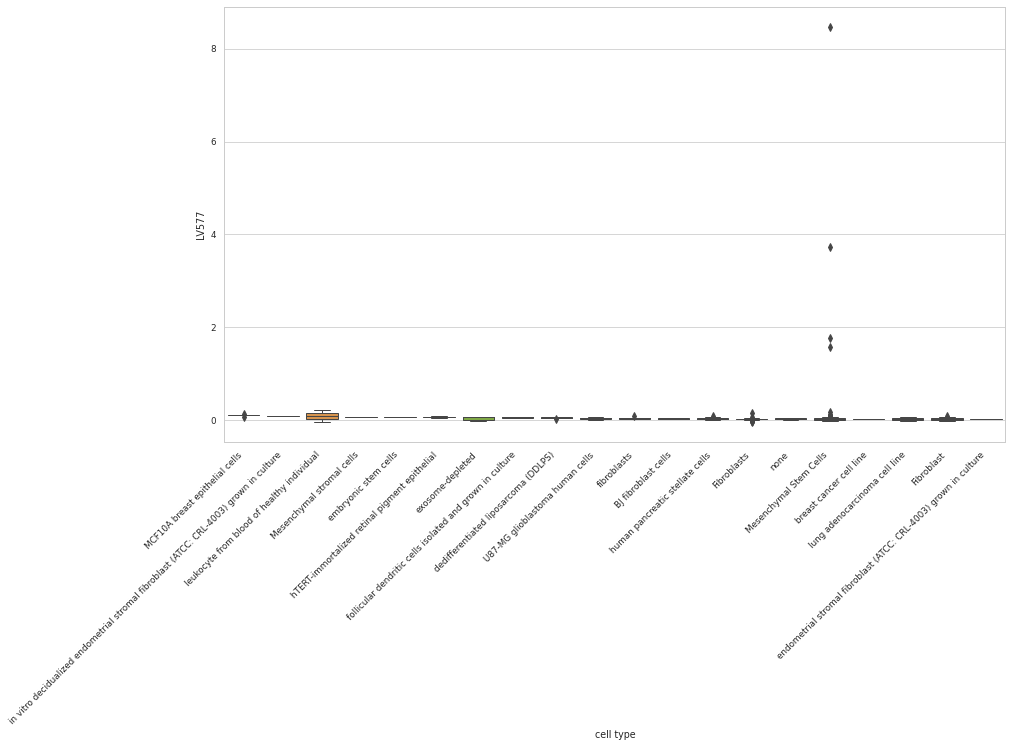

array(['SRP057196', 'SRP014428', 'SRP066834', 'SRP019994', 'SRP045869',
       'SRP059170', 'SRP034953', 'SRP036053', 'SRP002326', 'SRP005279',
       'SRP007481', 'SRP006575', 'SRP047363', 'SRP056295', 'SRP023262'],
      dtype=object)

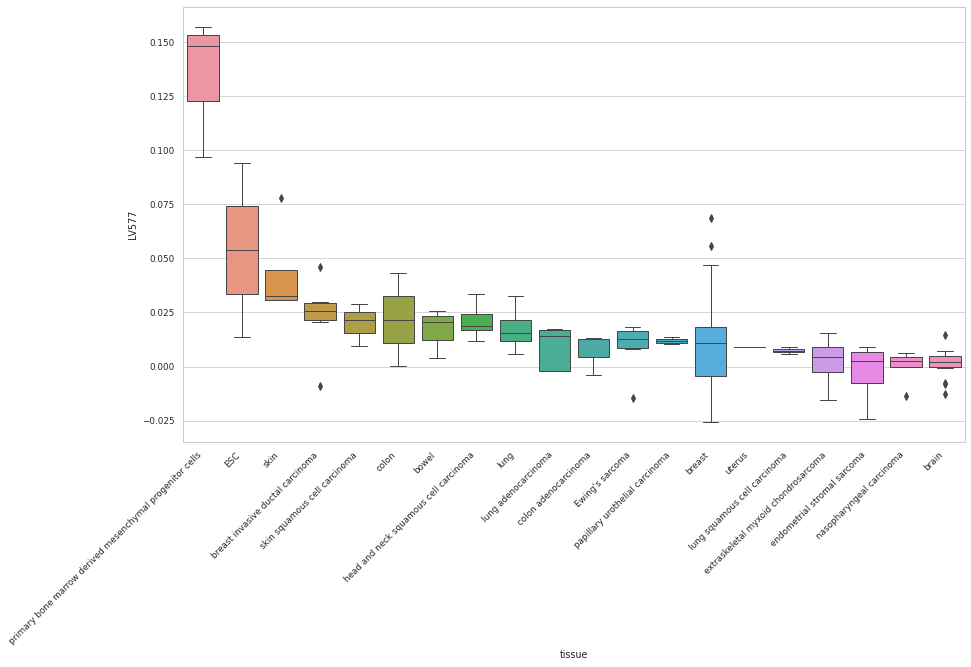

array(['SRP042597'], dtype=object)

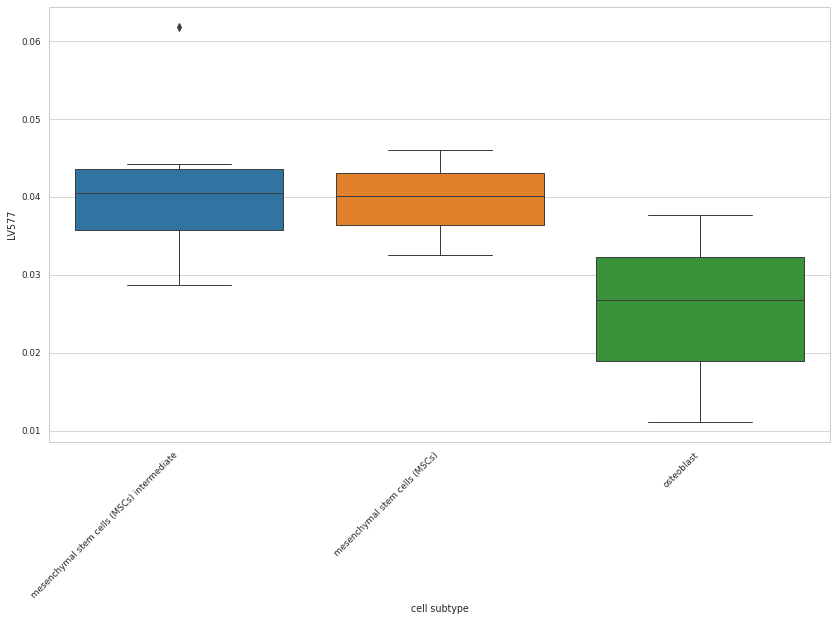

In [27]:
for lv_name in important_lvs:
    display(HTML(f"<h2>{lv_name}</h2>"))

    #     lv_name = lv_info["name"]
    lv_obj = lv_exp = LVAnalysis(lv_name, data)

    # show lv prior knowledge match (pathways)
    lv_pathways = multiplier_model_summary[
        multiplier_model_summary["LV index"].isin((lv_name[2:],))
        & (
            (multiplier_model_summary["FDR"] < 0.05)
            | (multiplier_model_summary["AUC"] >= 0.75)
        )
    ]
    display(lv_pathways)

    lv_data = lv_obj.get_experiments_data()

    display("")
    display(lv_obj.lv_traits.head(20))
    display("")
    display(lv_obj.lv_genes.head(10))

    lv_attrs = lv_obj.get_attributes_variation_score()
    _tmp = pd.Series(lv_attrs.index)
    lv_attrs = lv_attrs[
        _tmp.str.match(
            "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
            case=False,
            flags=re.IGNORECASE,
        ).values
    ].sort_values(ascending=False)
    display(lv_attrs)

    for _lva in lv_attrs.index:
        display(HTML(f"<h3>{_lva}</h3>"))
        display(lv_data[_lva].dropna().reset_index()["project"].unique())

        with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
            fig, ax = plt.subplots(figsize=(14, 8))
            ax = lv_obj.plot_attribute(_lva, top_x_values=20)
            if ax is None:
                plt.close(fig)
                continue
            display(fig)
            plt.close(fig)